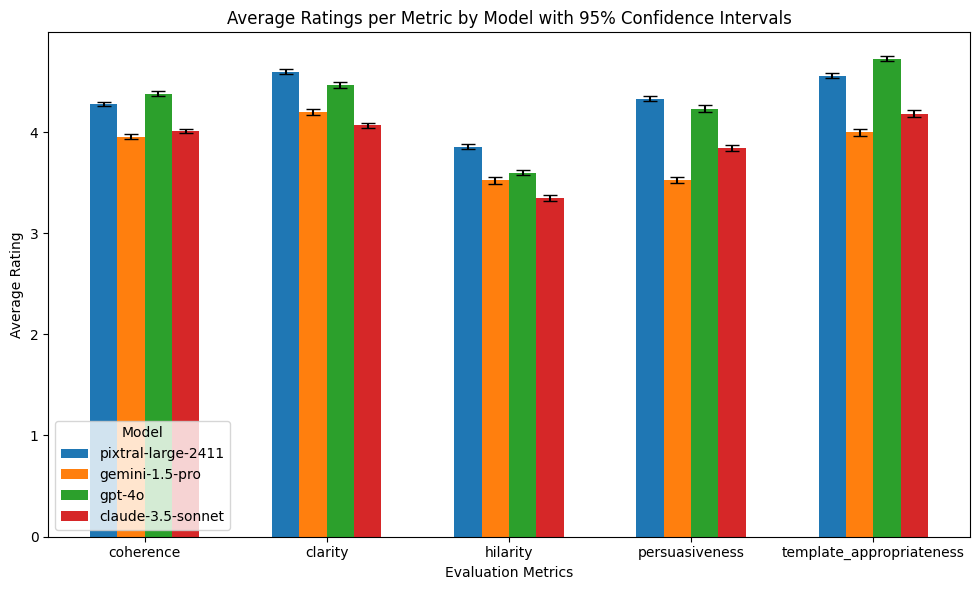

In [3]:
# Import necessary libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Ensure the output directory exists
output_dir = "../new_results"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Read the dataset
df = pd.read_csv("../plots/2025_02_21_23_04_10.csv")

# Define the metrics to analyze
metrics = ["coherence", "clarity", "hilarity", "persuasiveness", "template_appropriateness"]

# Convert the metric columns from strings like "4/5" to numeric ratings (extract the part before "/")
for col in metrics:
    # Split the string by "/" and convert the first part to float
    df[col] = df[col].str.split('/').str[0].astype(float)

# Define the desired order of models
desired_order = ["pixtral-large-2411", "gemini-1.5-pro", "gpt-4o", "claude-3.5-sonnet"]

# Group the data by model name and calculate statistics for each metric
model_stats = {}
grouped = df.groupby("model_name_judge")

for model, group in grouped:
    if model in desired_order:
        model_stats[model] = {}
        for metric in metrics:
            # Extract ratings and compute summary statistics
            data = group[metric].dropna()
            mean_val = data.mean()
            std_val = data.std()
            n = len(data)
            # Compute standard error and 95% confidence interval (using normal approximation)
            se = std_val / np.sqrt(n) if n > 0 else 0
            ci = 1.96 * se
            model_stats[model][metric] = {"mean": mean_val, "ci": ci}

# Ensure models are in the specified order
model_names = [model for model in desired_order if model in model_stats]
n_models = len(model_names)
n_metrics = len(metrics)

# Prepare arrays to store means and confidence intervals
means = np.zeros((n_metrics, n_models))
cis = np.zeros((n_metrics, n_models))

for i, metric in enumerate(metrics):
    for j, model in enumerate(model_names):
        means[i, j] = model_stats[model][metric]["mean"]
        cis[i, j] = model_stats[model][metric]["ci"]

# Create the grouped bar plot
x = np.arange(n_metrics)  # group positions (one per metric)
bar_width = 0.15  # width of each bar

fig, ax = plt.subplots(figsize=(10, 6))

# Plot each model's data with appropriate horizontal offset
for j in range(n_models):
    offsets = x + j * bar_width - ((n_models - 1) * bar_width) / 2
    ax.bar(offsets, means[:, j],
           width=bar_width,
           yerr=cis[:, j],
           capsize=5,
           label=model_names[j])

# Add labels, title, and legend
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.set_xlabel("Evaluation Metrics")
ax.set_ylabel("Average Rating")
ax.set_title("Average Ratings per Metric by Model with 95% Confidence Intervals")
ax.legend(title="Model")

plt.tight_layout()

# Save the plot to the new_results directory
plot_path = os.path.join(output_dir, "ratings_bar_graph.png")
plt.savefig(plot_path)
plt.show()

# Statistical signifance in the average of the metrics for all models

In [4]:
# Import necessary libraries
import os
import pandas as pd
import numpy as np
from scipy import stats

# Read the dataset
df = pd.read_csv("../plots/2025_02_21_23_04_10.csv")

# Define the evaluation metrics
metrics = ["coherence", "clarity", "hilarity", "persuasiveness", "template_appropriateness"]

# Convert the metric columns from strings like "4/5" to numeric values by taking the number before the "/"
for metric in metrics:
    df[metric] = df[metric].str.split('/').str[0].astype(float)

# Define the order (and names) of the models to be analyzed
desired_order = ["pixtral-large-2411", "gemini-1.5-pro", "gpt-4o", "claude-3.5-sonnet"]

# Create an output directory (if needed for other plots)
output_dir = "../new_results"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# For each metric, compute the average rating, sample size, and the 95% confidence interval per model.
# Also, perform a one-way ANOVA test across the four models for each metric.
for metric in metrics:
    print(f"\n=== Metric: {metric} ===")
    summary_data = []  # list to hold summary tuples (model, n, mean, confidence interval)
    
    # Iterate over each model in the desired order
    for model in desired_order:
        # Get the data for the current model and metric
        model_data = df[df['model_name_judge'] == model][metric].dropna()
        n = len(model_data)
        mean_val = model_data.mean()
        std_val = model_data.std()
        # Standard error; guard division by zero
        se = std_val / np.sqrt(n) if n > 0 else 0
        # 95% confidence interval using the normal approximation (1.96 standard errors)
        ci = 1.96 * se
        summary_data.append((model, n, mean_val, ci))
        print(f"Model: {model}\n  Sample size (n): {n}\n  Mean: {mean_val:.2f}\n  95% CI: ± {ci:.2f}")
    
    # Prepare the data for one-way ANOVA: a list of arrays, one per model.
    groups = [df[df['model_name_judge'] == model][metric].dropna() for model in desired_order]
    # Run one-way ANOVA across the models for the current metric
    f_stat, p_val = stats.f_oneway(*groups)
    print(f"One-way ANOVA result: F-statistic = {f_stat:.3f}, p-value = {p_val:.3f}\n")


=== Metric: coherence ===
Model: pixtral-large-2411
  Sample size (n): 1920
  Mean: 4.28
  95% CI: ± 0.02
Model: gemini-1.5-pro
  Sample size (n): 1920
  Mean: 3.95
  95% CI: ± 0.03
Model: gpt-4o
  Sample size (n): 1920
  Mean: 4.38
  95% CI: ± 0.03
Model: claude-3.5-sonnet
  Sample size (n): 1920
  Mean: 4.01
  95% CI: ± 0.02
One-way ANOVA result: F-statistic = 288.735, p-value = 0.000


=== Metric: clarity ===
Model: pixtral-large-2411
  Sample size (n): 1920
  Mean: 4.60
  95% CI: ± 0.02
Model: gemini-1.5-pro
  Sample size (n): 1920
  Mean: 4.20
  95% CI: ± 0.03
Model: gpt-4o
  Sample size (n): 1920
  Mean: 4.46
  95% CI: ± 0.03
Model: claude-3.5-sonnet
  Sample size (n): 1920
  Mean: 4.07
  95% CI: ± 0.02
One-way ANOVA result: F-statistic = 351.179, p-value = 0.000


=== Metric: hilarity ===
Model: pixtral-large-2411
  Sample size (n): 1920
  Mean: 3.85
  95% CI: ± 0.02
Model: gemini-1.5-pro
  Sample size (n): 1920
  Mean: 3.52
  95% CI: ± 0.03
Model: gpt-4o
  Sample size (n): 192

In [102]:
import pandas as pd
import numpy as np
from scipy.stats import t, f_oneway

# Load the AI evaluation data
ai_path = "../plots/2025_02_21_23_04_10.csv"
df = pd.read_csv(ai_path)

# Ensure model names are lowercase for consistency
df["model_name_judge"] = df["model_name_judge"].str.lower()

# Define the five evaluation metrics
metrics = ["coherence", "clarity", "hilarity", "persuasiveness", "template_appropriateness"]

# Convert each metric from string "x/5" format to numeric by extracting the numerator
for col in metrics:
    df[col] = df[col].str.split('/').str[0].astype(float)

# Compute the overall rating per evaluation as the mean of the five metrics
df["overall_rating"] = df[metrics].mean(axis=1)

# Group the data by model
grouped = df.groupby("model_name_judge")["overall_rating"]

# Prepare a dictionary to store plots per model
results = {}

for model, ratings in grouped:
    n = ratings.count()  # number of evaluations for this model
    mean_rating = ratings.mean()
    std_rating = ratings.std(ddof=1)
    se = std_rating / np.sqrt(n)
    # 95% CI: using the t critical value with n-1 degrees of freedom (two-tailed)
    t_crit = t.ppf(1 - 0.025, df=n-1)
    ci = t_crit * se
    results[model] = {"n": n, "mean": mean_rating, "std": std_rating, "se": se, "CI": ci}

# Print per-model summary statistics
print("Per-model Aggregated Overall Ratings (average of 5 metrics):\n")
for model, res in results.items():
    print(f"Model: {model}")
    print(f"  Sample Size (n): {res['n']}")
    print(f"  Mean Overall Rating: {res['mean']:.3f}")
    print(f"  Standard Deviation: {res['std']:.3f}")
    print(f"  Standard Error: {res['se']:.3f}")
    print(f"  95% Confidence Interval: ± {res['CI']:.3f}\n")

# Prepare data for one-way ANOVA: collect overall_rating values for each model in a list.
groups = [ratings.values for name, ratings in grouped]

# Perform one-way ANOVA
f_stat, p_val = f_oneway(*groups)
print("One-way ANOVA comparing Overall Ratings across AI Models:")
print(f"  F-statistic: {f_stat:.3f}")
print(f"  p-value: {p_val:.3e}")

Per-model Aggregated Overall Ratings (average of 5 metrics):

Model: claude-3.5-sonnet
  Sample Size (n): 1920
  Mean Overall Rating: 3.891
  Standard Deviation: 0.549
  Standard Error: 0.013
  95% Confidence Interval: ± 0.025

Model: gemini-1.5-pro
  Sample Size (n): 1920
  Mean Overall Rating: 3.840
  Standard Deviation: 0.578
  Standard Error: 0.013
  95% Confidence Interval: ± 0.026

Model: gpt-4o
  Sample Size (n): 1920
  Mean Overall Rating: 4.280
  Standard Deviation: 0.516
  Standard Error: 0.012
  95% Confidence Interval: ± 0.023

Model: pixtral-large-2411
  Sample Size (n): 1920
  Mean Overall Rating: 4.323
  Standard Deviation: 0.376
  Standard Error: 0.009
  95% Confidence Interval: ± 0.017

One-way ANOVA comparing Overall Ratings across AI Models:
  F-statistic: 472.335
  p-value: 1.176e-281


# Plot of the averages of metrics per mode for all models

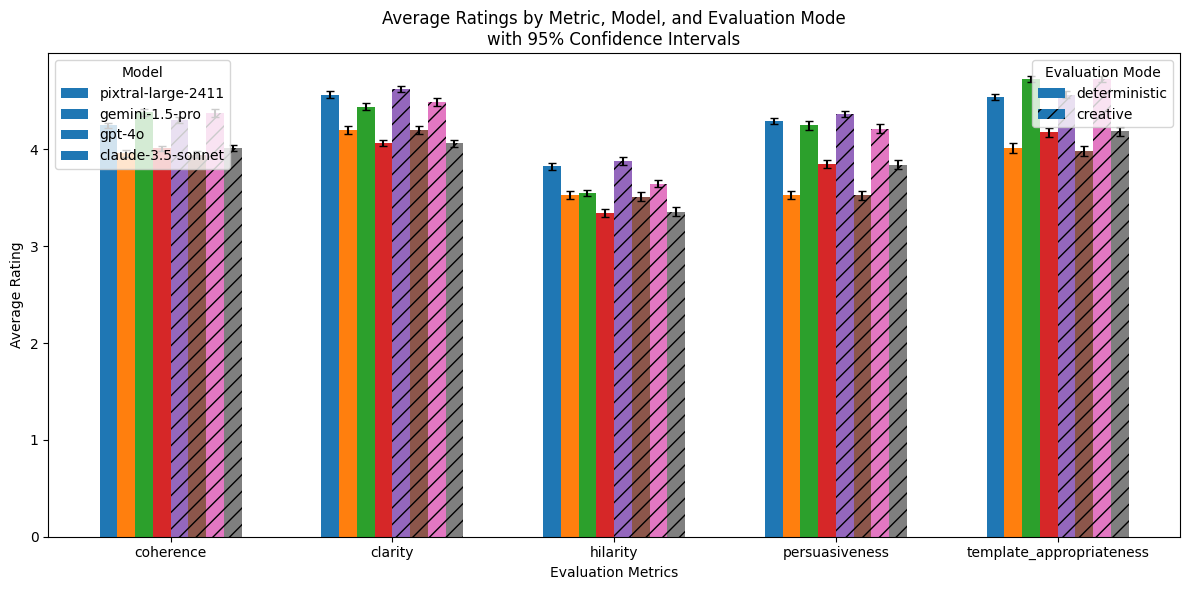

In [37]:
# Import necessary libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Set the output directory and dataset file path
output_dir = "../new_results"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

data_path = "../plots/2025_02_21_23_04_10.csv"
df = pd.read_csv(data_path)

# Convert the "model_name_judge" column to lowercase for consistency
df['model_name_judge'] = df['model_name_judge'].str.lower()

# Define the evaluation metrics
metrics = ["coherence", "clarity", "hilarity", "persuasiveness", "template_appropriateness"]

# Convert the metric columns from strings like "4/5" to numeric (extract the first number before "/")
for metric in metrics:
    df[metric] = df[metric].str.split('/').str[0].astype(float)

# Define evaluation modes and the models in the desired order (all in lowercase)
evaluation_modes = ['deterministic', 'creative']
desired_order = ["pixtral-large-2411", "gemini-1.5-pro", "gpt-4o", "claude-3.5-sonnet"]

# Compute summary statistics (n, mean, 95% CI) for each metric, evaluation mode, and model.
# Store the plots in a nested dictionary:
# summary_stats[metric][evaluation_mode][model] = (n, mean, CI)
summary_stats = {}
for metric in metrics:
    summary_stats[metric] = {}
    for mode in evaluation_modes:
        summary_stats[metric][mode] = {}
        for model in desired_order:
            subset = df[(df['model_name_judge'] == model) & (df['evaluation_mode'] == mode)]
            n = len(subset)
            if n > 0:
                data = subset[metric].dropna()
                mean_val = data.mean()
                std_val = data.std()
                se = std_val / np.sqrt(n)
                ci = 1.96 * se  # 95% confidence interval (approximation)
            else:
                mean_val = np.nan
                ci = np.nan
            summary_stats[metric][mode][model] = (n, mean_val, ci)

# Plotting parameters
# For each metric, we'll plot bars for 2 evaluation modes x 4 models = 8 bars per metric group.
num_modes = len(evaluation_modes)     # 2
num_models = len(desired_order)         # 4
total_bars = num_modes * num_models     # 8 bars per metric group
bar_width = 0.08                        # width for each individual bar

# To center the bars around each metric tick:
base_offset = - (total_bars - 1) / 2 * bar_width

# Define colors for models (reused for each evaluation mode) and hatch patterns to distinguish the modes.
colors = ['blue', 'orange', 'green', 'red']
hatches = {'deterministic': '', 'creative': '//'}

# Prepare x positions for metric groups
x = np.arange(len(metrics))

# Create the figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Loop over evaluation modes and models to plot bars for each combination
for mode_idx, mode in enumerate(evaluation_modes):
    for model_idx, model in enumerate(desired_order):
        # Compute the offset for each combination within the metric group
        offset = base_offset + (mode_idx * num_models + model_idx) * bar_width
        means = []
        cis = []
        # Get the summary statistic for each metric for the current combination
        for metric in metrics:
            n, mean_val, ci = summary_stats[metric][mode][model]
            means.append(mean_val)
            cis.append(ci)
        means = np.array(means)
        cis = np.array(cis)
        # Plot the bar with error bars
        ax.bar(x + offset, means, width=bar_width, yerr=cis, capsize=3,
               color=colors[model_idx], hatch=hatches[mode], edgecolor='black',
               label=f"{model} ({mode})")

# Customize the x-axis and overall plot appearance
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.set_xlabel("Evaluation Metrics")
ax.set_ylabel("Average Rating")
ax.set_title("Average Ratings by Metric, Model, and Evaluation Mode\nwith 95% Confidence Intervals")

# Create custom legends to avoid duplicate labels:
from matplotlib.patches import Patch
# Legend for models (colors)
model_handles = [Patch(facecolor=colors[i], edgecolor='black', label=desired_order[i])
                 for i in range(num_models)]
# Legend for evaluation modes (hatches)
mode_handles = [Patch(facecolor='white', hatch=hatches[mode], edgecolor='black', label=mode)
                for mode in evaluation_modes]

legend1 = ax.legend(handles=model_handles, title="Model", loc="upper left")
legend2 = ax.legend(handles=mode_handles, title="Evaluation Mode", loc="upper right")
ax.add_artist(legend1)

plt.tight_layout()
# Save the figure to the updated output directory
plot_path = os.path.join(output_dir, "ratings_by_mode_bar_graph.png")
plt.savefig(plot_path)
plt.show()

# Statistical significance between modes for each model

In [6]:
# Import necessary libraries
import os
import pandas as pd
import numpy as np
from scipy import stats

# Set the dataset file path and load the data
data_path = "../plots/2025_02_21_23_04_10.csv"
df = pd.read_csv(data_path)

# Convert the "model_name_judge" column to lowercase for consistency
df['model_name_judge'] = df['model_name_judge'].str.lower()

# Define the evaluation metrics
metrics = ["coherence", "clarity", "hilarity", "persuasiveness", "template_appropriateness"]

# Convert the metric columns from strings like "4/5" to numeric values by taking the part before the "/"
for metric in metrics:
    df[metric] = df[metric].str.split('/').str[0].astype(float)

# Define evaluation modes and desired models in lowercase
evaluation_modes = ['deterministic', 'creative']
desired_order = ["pixtral-large-2411", "gemini-1.5-pro", "gpt-4o", "claude-3.5-sonnet"]

# Loop over each evaluation mode and each metric to compute statistics and test for significance
for mode in evaluation_modes:
    print(f"\n============ Evaluation Mode: {mode.upper()} ============\n")
    for metric in metrics:
        print(f"--- Metric: {metric} ---")
        # For storing per-model stats for later reporting or further tests
        model_stats = {}
        
        # Loop through each model in desired_order and compute stats
        for model in desired_order:
            subset = df[(df['model_name_judge'] == model) & (df['evaluation_mode'] == mode)]
            n = len(subset)
            if n > 0:
                data = subset[metric].dropna()
                mean_val = data.mean()
                std_val = data.std()
                se = std_val / np.sqrt(n)
                ci = 1.96 * se  # Approximate 95% CI using the normal approximation
            else:
                mean_val = np.nan
                ci = np.nan
            model_stats[model] = {"n": n, "mean": mean_val, "ci": ci}
            print(f"Model: {model}")
            print(f"  Sample size (n): {n}")
            print(f"  Mean: {mean_val:.2f}")
            print(f"  95% CI: ± {ci:.2f}")
        
        # Prepare the groups for one-way ANOVA
        groups = []
        valid_models = []  # Track models with non-empty data
        for model in desired_order:
            group_data = df[(df['model_name_judge'] == model) & (df['evaluation_mode'] == mode)][metric].dropna()
            if len(group_data) > 0:
                groups.append(group_data)
                valid_models.append(model)
        
        # Ensure that there are at least two groups with data to perform ANOVA
        if len(groups) >= 2:
            try:
                f_stat, p_val = stats.f_oneway(*groups)
                print(f"One-way ANOVA: F-statistic = {f_stat:.3f}, p-value = {p_val:.3f}\n")
            except Exception as e:
                print(f"ANOVA could not be performed: {e}\n")
        else:
            print("Not enough groups with data to perform ANOVA.\n")


============ Evaluation Mode: DETERMINISTIC ============

--- Metric: coherence ---
Model: pixtral-large-2411
  Sample size (n): 960
  Mean: 4.25
  95% CI: ± 0.03
Model: gemini-1.5-pro
  Sample size (n): 960
  Mean: 3.96
  95% CI: ± 0.04
Model: gpt-4o
  Sample size (n): 960
  Mean: 4.38
  95% CI: ± 0.04
Model: claude-3.5-sonnet
  Sample size (n): 960
  Mean: 4.01
  95% CI: ± 0.03
One-way ANOVA: F-statistic = 148.009, p-value = 0.000

--- Metric: clarity ---
Model: pixtral-large-2411
  Sample size (n): 960
  Mean: 4.57
  95% CI: ± 0.03
Model: gemini-1.5-pro
  Sample size (n): 960
  Mean: 4.20
  95% CI: ± 0.04
Model: gpt-4o
  Sample size (n): 960
  Mean: 4.44
  95% CI: ± 0.04
Model: claude-3.5-sonnet
  Sample size (n): 960
  Mean: 4.07
  95% CI: ± 0.03
One-way ANOVA: F-statistic = 160.264, p-value = 0.000

--- Metric: hilarity ---
Model: pixtral-large-2411
  Sample size (n): 960
  Mean: 3.83
  95% CI: ± 0.03
Model: gemini-1.5-pro
  Sample size (n): 960
  Mean: 3.53
  95% CI: ± 0.04
Mode

# Statistical signifances per mode for each model

In [7]:
# Import necessary libraries
import os
import pandas as pd
import numpy as np
from scipy import stats

# Set the dataset file path and load the data
data_path = "../plots/2025_02_21_23_04_10.csv"
df = pd.read_csv(data_path)

# Convert model names to lowercase
df['model_name_judge'] = df['model_name_judge'].str.lower()

# Define evaluation metrics and convert their string values (e.g., "4/5") to numeric by extracting the part before the "/"
metrics = ["coherence", "clarity", "hilarity", "persuasiveness", "template_appropriateness"]
for metric in metrics:
    df[metric] = df[metric].str.split('/').str[0].astype(float)

# Create a unique identifier for each meme (using claim_number and meme_number)
df['meme_id'] = df['claim_number'].astype(str) + "_" + df['meme_number'].astype(str)

# Define evaluation modes and desired models (all in lowercase)
evaluation_modes = ['deterministic', 'creative']
desired_order = ["pixtral-large-2411", "gemini-1.5-pro", "gpt-4o", "claude-3.5-sonnet"]

# Loop over each model and for each metric, compare the average ratings between the two evaluation modes.
# For each model, we first average the ratings for each meme per mode, then perform a paired t-test.
for model in desired_order:
    print("\n============ Model: {} ============".format(model))
    # Filter data for the current model
    df_model = df[df['model_name_judge'] == model]
    
    for metric in metrics:
        # Group by meme_id and evaluation_mode; compute average rating per meme for the metric
        grouped = df_model.groupby(['meme_id', 'evaluation_mode'])[metric].mean().reset_index()
        # Pivot the grouped plots so that each row is a meme and columns are the evaluation modes
        pivoted = grouped.pivot(index='meme_id', columns='evaluation_mode', values=metric)
        # Keep only those memes that have ratings for both evaluation modes
        pivoted = pivoted.dropna(subset=evaluation_modes)
        
        # Count of paired memes (sample size)
        n = pivoted.shape[0]
        if n < 2:
            print(f"\nMetric: {metric}")
            print("Not enough paired data to perform a t-test.")
            continue
        
        # Compute the overall average for each mode across memes
        det_mean = pivoted['deterministic'].mean()
        cre_mean = pivoted['creative'].mean()
        
        # Perform a paired t-test comparing deterministic vs. creative ratings
        t_stat, p_val = stats.ttest_rel(pivoted['deterministic'], pivoted['creative'])
        
        # Print the plots
        print(f"\nMetric: {metric}")
        print(f"Number of memes (paired samples): {n}")
        print(f"Deterministic Mode Average: {det_mean:.2f}")
        print(f"Creative Mode Average: {cre_mean:.2f}")
        print(f"Paired t-test: t-statistic = {t_stat:.3f}, p-value = {p_val:.3f}")



============ Model: pixtral-large-2411 ============

Metric: coherence
Number of memes (paired samples): 96
Deterministic Mode Average: 4.25
Creative Mode Average: 4.30
Paired t-test: t-statistic = -2.361, p-value = 0.020

Metric: clarity
Number of memes (paired samples): 96
Deterministic Mode Average: 4.57
Creative Mode Average: 4.63
Paired t-test: t-statistic = -2.518, p-value = 0.013

Metric: hilarity
Number of memes (paired samples): 96
Deterministic Mode Average: 3.83
Creative Mode Average: 3.88
Paired t-test: t-statistic = -2.750, p-value = 0.007

Metric: persuasiveness
Number of memes (paired samples): 96
Deterministic Mode Average: 4.29
Creative Mode Average: 4.37
Paired t-test: t-statistic = -3.495, p-value = 0.001

Metric: template_appropriateness
Number of memes (paired samples): 96
Deterministic Mode Average: 4.55
Creative Mode Average: 4.57
Paired t-test: t-statistic = -0.858, p-value = 0.393

============ Model: gemini-1.5-pro ============

Metric: coherence
Number of me

# Plot juding own and not own content per model

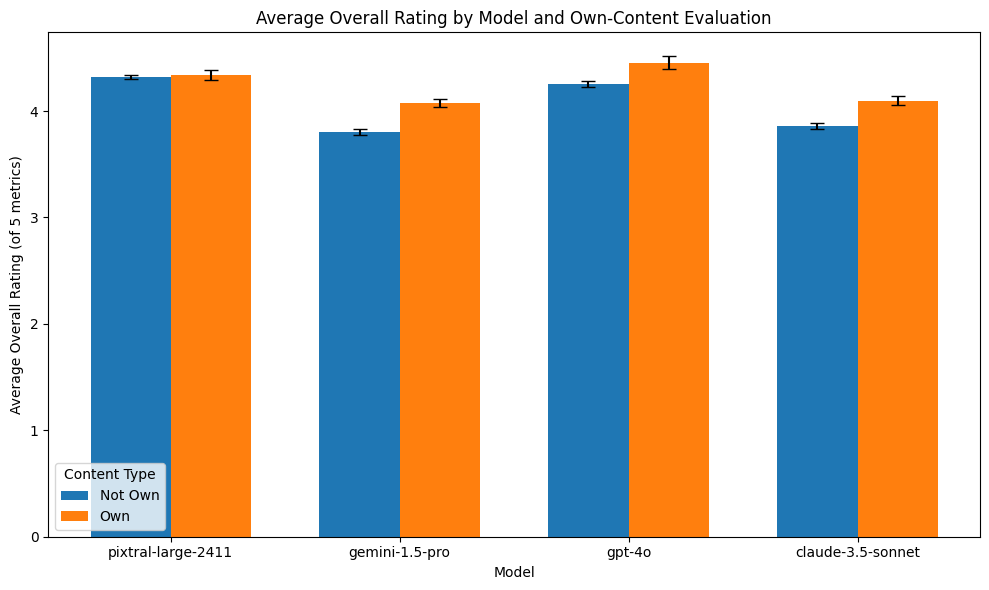

In [41]:
# Import necessary libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Set paths for dataset and output directory
data_path = "../plots/2025_02_21_23_04_10.csv"
output_dir = "../new_results"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Load the dataset
df = pd.read_csv(data_path)

# Convert the model names to lowercase for consistency
df['model_name_judge'] = df['model_name_judge'].str.lower()

# Define the five metrics
metrics = ["coherence", "clarity", "hilarity", "persuasiveness", "template_appropriateness"]

# Convert each metric column from strings like "4/5" to numeric (extracting the first number)
for metric in metrics:
    df[metric] = df[metric].str.split('/').str[0].astype(float)

# Compute an overall average rating per row as the average of the five metrics
df['overall_rating'] = df[metrics].mean(axis=1)

# Group the data by model and by whether the model is evaluating its own meme (is_own_meme)
grouped = df.groupby(['model_name_judge', 'is_own_meme'])['overall_rating'] \
            .agg(['mean', 'std', 'count']).reset_index()

# Calculate the standard error and a 95% confidence interval for the overall rating in each group.
grouped['se'] = grouped['std'] / np.sqrt(grouped['count'])
grouped['ci'] = 1.96 * grouped['se']

# Define the desired models (all in lowercase) and the order of the is_own_meme categories.
desired_order = ["pixtral-large-2411", "gemini-1.5-pro", "gpt-4o", "claude-3.5-sonnet"]
own_categories = [False, True]  # False: Evaluating others' content, True: Evaluating own content

# For the bar plot, we will create one group per model (x-axis) with two bars per model.
# Prepare lists to hold the mean overall rating and CI for each model for each own category.
means_not_own = []
cis_not_own = []
means_own = []
cis_own = []

for model in desired_order:
    # Get statistics for evaluations where the model is NOT evaluating its own content (is_own_meme == False)
    df_not_own = grouped[(grouped['model_name_judge'] == model) & (grouped['is_own_meme'] == False)]
    if not df_not_own.empty:
        means_not_own.append(df_not_own['mean'].values[0])
        cis_not_own.append(df_not_own['ci'].values[0])
    else:
        means_not_own.append(np.nan)
        cis_not_own.append(np.nan)
    
    # Get statistics for evaluations where the model IS evaluating its own content (is_own_meme == True)
    df_own = grouped[(grouped['model_name_judge'] == model) & (grouped['is_own_meme'] == True)]
    if not df_own.empty:
        means_own.append(df_own['mean'].values[0])
        cis_own.append(df_own['ci'].values[0])
    else:
        means_own.append(np.nan)
        cis_own.append(np.nan)

# Create a grouped bar chart
x = np.arange(len(desired_order))  # one tick per model
bar_width = 0.35  # width of each bar

fig, ax = plt.subplots(figsize=(10, 6))

# Plot bars:
# - Left bar: evaluations where the model is not evaluating its own content (False)
# - Right bar: evaluations where the model is evaluating its own content (True)
bars1 = ax.bar(x - bar_width/2, means_not_own, yerr=cis_not_own, width=bar_width,
               capsize=5, label="Not Own",)
bars2 = ax.bar(x + bar_width/2, means_own, yerr=cis_own, width=bar_width,
               capsize=5, label="Own")

# Customize the plot appearance
ax.set_xticks(x)
ax.set_xticklabels(desired_order)
ax.set_xlabel("Model")
ax.set_ylabel("Average Overall Rating (of 5 metrics)")
ax.set_title("Average Overall Rating by Model and Own-Content Evaluation")
ax.legend(title="Content Type")

plt.tight_layout()
# Save the plot to the output directory
plot_path = os.path.join(output_dir, "avg_metrics_by_own_status.png")
plt.savefig(plot_path)
plt.show()

# Plot own vs not own content for all metrics per model

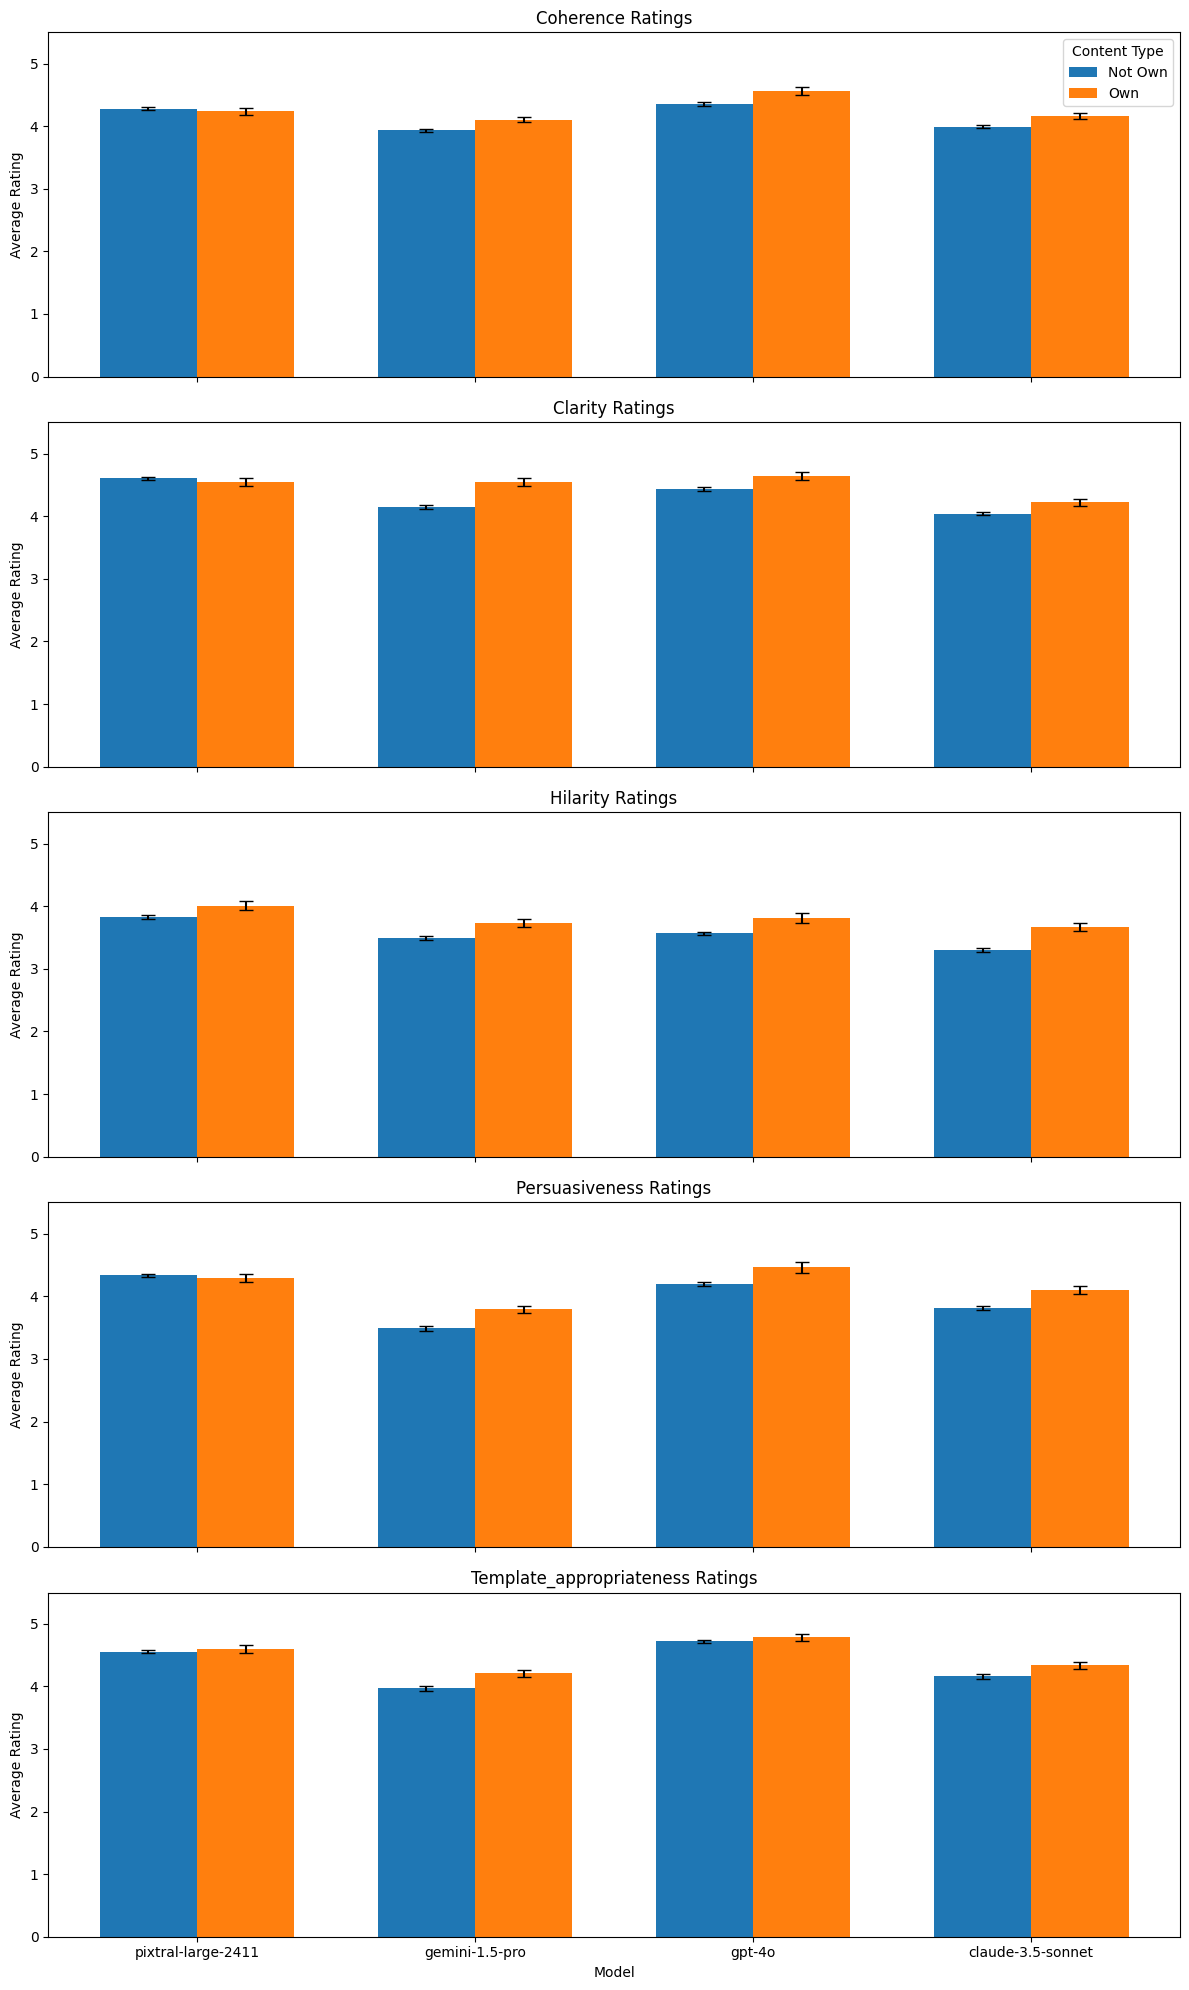

In [43]:
# Import necessary libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Set paths for dataset and output directory
data_path = "../plots/2025_02_21_23_04_10.csv"
output_dir = "../new_results"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Load the dataset
df = pd.read_csv(data_path)

# Convert model names to lowercase for consistency
df['model_name_judge'] = df['model_name_judge'].str.lower()

# Define the five metrics
metrics = ["coherence", "clarity", "hilarity", "persuasiveness", "template_appropriateness"]

# Convert metric columns from strings (e.g., "4/5") to numeric by extracting the first number
for metric in metrics:
    df[metric] = df[metric].str.split('/').str[0].astype(float)

# Define the desired models (all in lowercase) and the two own-content categories
desired_order = ["pixtral-large-2411", "gemini-1.5-pro", "gpt-4o", "claude-3.5-sonnet"]
own_categories = [False, True]  # False: Evaluating non-own content; True: Evaluating own content

# Prepare the figure with one subplot per metric (vertically arranged)
n_metrics = len(metrics)
fig, axs = plt.subplots(n_metrics, 1, figsize=(12, 4 * n_metrics), sharex=True)

# Set bar plot parameters
bar_width = 0.35

# Iterate over metrics to compute group statistics and plot for each metric
for i, metric in enumerate(metrics):
    # Lists to store means and confidence intervals for each model for the two categories
    means_not_own = []
    cis_not_own = []
    means_own = []
    cis_own = []
    
    for model in desired_order:
        # Get stats for evaluations where the model is NOT evaluating its own content (is_own_meme == False)
        subset_not_own = df[(df['model_name_judge'] == model) & (df['is_own_meme'] == False)]
        n_not = len(subset_not_own)
        if n_not > 0:
            mean_not = subset_not_own[metric].mean()
            std_not = subset_not_own[metric].std()
            se_not = std_not / np.sqrt(n_not)
            ci_not = 1.96 * se_not
        else:
            mean_not = np.nan
            ci_not = np.nan
        means_not_own.append(mean_not)
        cis_not_own.append(ci_not)
        
        # Get stats for evaluations where the model IS evaluating its own content (is_own_meme == True)
        subset_own = df[(df['model_name_judge'] == model) & (df['is_own_meme'] == True)]
        n_own = len(subset_own)
        if n_own > 0:
            mean_own = subset_own[metric].mean()
            std_own = subset_own[metric].std()
            se_own = std_own / np.sqrt(n_own)
            ci_own = 1.96 * se_own
        else:
            mean_own = np.nan
            ci_own = np.nan
        means_own.append(mean_own)
        cis_own.append(ci_own)
    
    # Set the current axis (if only one subplot, axs may not be an array)
    ax = axs[i] if n_metrics > 1 else axs
    
    x = np.arange(len(desired_order))  # one x position per model
    
    # Plot the bars: one for 'not own' and one for 'own'
    ax.bar(x - bar_width/2, means_not_own, yerr=cis_not_own, 
           width=bar_width, capsize=5, label="Not Own")
    ax.bar(x + bar_width/2, means_own, yerr=cis_own, 
           width=bar_width, capsize=5, label="Own")
    
    # Customize this subplot
    ax.set_title(f"{metric.capitalize()} Ratings")
    ax.set_ylabel("Average Rating")
    ax.set_xticks(x)
    ax.set_xticklabels(desired_order)
    ax.set_ylim(0, 5.5)
    if i == 0:
        ax.legend(title="Content Type")

# Set a common X-axis label
plt.xlabel("Model")
plt.tight_layout()

# Save the figure
plot_path = os.path.join(output_dir, "avg_metrics_by_own_status_by_metric.png")
plt.savefig(plot_path)
plt.show()

In [10]:
# Import necessary libraries
import os
import pandas as pd
import numpy as np
from scipy import stats

# Set dataset path and load the data
data_path = "../plots/2025_02_21_23_04_10.csv"
df = pd.read_csv(data_path)

# Convert the model names to lowercase for consistency
df['model_name_judge'] = df['model_name_judge'].str.lower()

# Define the five metrics
metrics = ["coherence", "clarity", "hilarity", "persuasiveness", "template_appropriateness"]

# Convert metric columns from strings like "4/5" to numeric values by extracting the value before "/"
for metric in metrics:
    df[metric] = df[metric].str.split('/').str[0].astype(float)

# Compute the overall rating for each evaluation as the mean of the five metrics
df['overall_rating'] = df[metrics].mean(axis=1)

# Define the desired models in lowercase
desired_order = ["pixtral-large-2411", "gemini-1.5-pro", "gpt-4o", "claude-3.5-sonnet"]

# Loop over each model and perform the statistical significance check for overall ratings:
for model in desired_order:
    print(f"==================== Model: {model} ====================")
    
    # Filter data for the current model
    df_model = df[df['model_name_judge'] == model]
    
    # Separate overall ratings by whether the model evaluated its own meme or not
    group_not_own = df_model[df_model['is_own_meme'] == False]['overall_rating']
    group_own = df_model[df_model['is_own_meme'] == True]['overall_rating']
    
    n_not = len(group_not_own)
    n_own = len(group_own)
    
    # Check if both groups have sufficient data
    if n_not == 0 or n_own == 0:
        print("Not enough data in one or both groups to perform a t-test.\n")
        continue
    
    # Calculate mean, standard deviation, and standard error for both groups
    mean_not = group_not_own.mean()
    mean_own = group_own.mean()
    
    std_not = group_not_own.std()
    std_own = group_own.std()
    
    se_not = std_not / np.sqrt(n_not)
    se_own = std_own / np.sqrt(n_own)
    
    # 95% confidence intervals (using 1.96*SE)
    ci_not = 1.96 * se_not
    ci_own = 1.96 * se_own
    
    # Perform an independent two-sample t-test comparing not-own vs. own groups
    t_stat, p_val = stats.ttest_ind(group_not_own, group_own, equal_var=True)
    
    # Output the plots for this model
    print("Evaluating NOT Own Content:")
    print(f"   Sample Size: {n_not}")
    print(f"   Mean Overall Rating: {mean_not:.2f}")
    print(f"   95% Confidence Interval: ± {ci_not:.2f}")
    print("\nEvaluating Own Content:")
    print(f"   Sample Size: {n_own}")
    print(f"   Mean Overall Rating: {mean_own:.2f}")
    print(f"   95% Confidence Interval: ± {ci_own:.2f}")
    print("\nT-Test Results (Not Own vs. Own):")
    print(f"   t-statistic = {t_stat:.3f}")
    print(f"   p-value     = {p_val:.3f}\n")

==================== Model: pixtral-large-2411 ====================
Evaluating NOT Own Content:
   Sample Size: 1680
   Mean Overall Rating: 4.32
   95% Confidence Interval: ± 0.02

Evaluating Own Content:
   Sample Size: 240
   Mean Overall Rating: 4.34
   95% Confidence Interval: ± 0.05

T-Test Results (Not Own vs. Own):
   t-statistic = -0.634
   p-value     = 0.526

==================== Model: gemini-1.5-pro ====================
Evaluating NOT Own Content:
   Sample Size: 1680
   Mean Overall Rating: 3.81
   95% Confidence Interval: ± 0.03

Evaluating Own Content:
   Sample Size: 240
   Mean Overall Rating: 4.08
   95% Confidence Interval: ± 0.04

T-Test Results (Not Own vs. Own):
   t-statistic = -6.856
   p-value     = 0.000

==================== Model: gpt-4o ====================
Evaluating NOT Own Content:
   Sample Size: 1680
   Mean Overall Rating: 4.26
   95% Confidence Interval: ± 0.02

Evaluating Own Content:
   Sample Size: 240
   Mean Overall Rating: 4.46
   95% Confiden

# Plot self report confidence per model

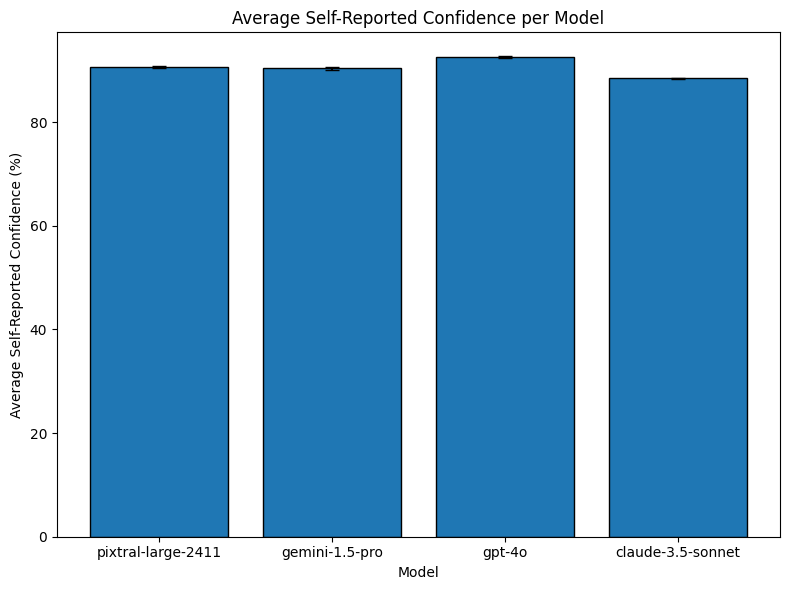

In [39]:
# Import necessary libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Set paths for the dataset and output directory
data_path = "../plots/2025_02_21_23_04_10.csv"
output_dir = "../new_results"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Load the dataset
df = pd.read_csv(data_path)

# Convert the model names to lowercase for consistency
df['model_name_judge'] = df['model_name_judge'].str.lower()

# Convert self_reported_confidence from a string like "85%" to a numeric value (85.0)
df['self_reported_confidence'] = df['self_reported_confidence'].str.strip('%').astype(float)

# Define the desired models in lowercase
desired_order = ["pixtral-large-2411", "gemini-1.5-pro", "gpt-4o", "claude-3.5-sonnet"]

# Group by model and aggregate statistics for the self_reported_confidence column
grouped = df.groupby("model_name_judge")["self_reported_confidence"].agg(['mean', 'std', 'count']).reset_index()

# Filter the groups to include only the desired models and order them accordingly
filtered = grouped[grouped["model_name_judge"].isin(desired_order)].copy()
filtered['model_name_judge'] = pd.Categorical(filtered['model_name_judge'], categories=desired_order, ordered=True)
filtered = filtered.sort_values("model_name_judge")

# Calculate the standard error and a 95% confidence interval for each model.
filtered['se'] = filtered['std'] / np.sqrt(filtered['count'])
filtered['ci'] = 1.96 * filtered['se']

# Create the bar plot
fig, ax = plt.subplots(figsize=(8, 6))

x = np.arange(len(filtered))  # positions for each model
ax.bar(x, filtered['mean'], yerr=filtered['ci'], capsize=5, edgecolor='black')

ax.set_xticks(x)
ax.set_xticklabels(filtered['model_name_judge'])
ax.set_xlabel("Model")
ax.set_ylabel("Average Self-Reported Confidence (%)")
ax.set_title("Average Self-Reported Confidence per Model")

plt.tight_layout()

# Save the plot to the output directory
plot_path = os.path.join(output_dir, "avg_self_reported_confidence.png")
plt.savefig(plot_path)
plt.show()

# stat significance self reported confidence for the two modes per model

In [13]:
# Import necessary libraries
import os
import pandas as pd
import numpy as np
from scipy import stats

# Set dataset path and load the data
data_path = "../plots/2025_02_21_23_04_10.csv"
df = pd.read_csv(data_path)

# Convert the model names to lowercase for consistency
df['model_name_judge'] = df['model_name_judge'].str.lower()

# Convert self_reported_confidence from a string like "85%" to a numeric value (e.g., 85.0)
df['self_reported_confidence'] = df['self_reported_confidence'].str.strip('%').astype(float)

# Create a unique identifier for each meme using claim_number and meme_number
df['meme_id'] = df['claim_number'].astype(str) + "_" + df['meme_number'].astype(str)

# Define desired models (all in lowercase)
desired_order = ["pixtral-large-2411", "gemini-1.5-pro", "gpt-4o", "claude-3.5-sonnet"]

# Loop over each model and perform a paired t-test comparing self-reported confidence 
# between deterministic and creative modes.
print("Statistical Significance Tests for Self-Reported Confidence (Deterministic vs. Creative):\n")
for model in desired_order:
    # Filter data for the current model
    df_model = df[df['model_name_judge'] == model]
    
    # For each meme, compute the average self_reported_confidence per evaluation_mode.
    # Since each meme is evaluated 10 times per mode, we average over those evaluations.
    grouped = df_model.groupby(['meme_id', 'evaluation_mode'])['self_reported_confidence'].mean().reset_index()
    
    # Pivot the table so that each row corresponds to a meme with separate columns for each mode.
    pivot = grouped.pivot(index='meme_id', columns='evaluation_mode', values='self_reported_confidence')
    
    # To perform a paired test, keep only those memes that have ratings for both evaluation modes.
    # The column names are expected to be "deterministic" and "creative".
    if 'deterministic' not in pivot.columns or 'creative' not in pivot.columns:
        print(f"Model {model}: One or both evaluation modes are missing. Skipping.\n")
        continue
    pivot = pivot.dropna(subset=['deterministic', 'creative'])
    
    n_pairs = pivot.shape[0]
    if n_pairs < 2:
        print(f"Model {model}: Not enough paired data (n = {n_pairs}) to perform a t-test.\n")
        continue
    
    # Compute means over all memes for each mode
    mean_det = pivot['deterministic'].mean()
    mean_cre = pivot['creative'].mean()
    
    # Perform a paired t-test on the per-meme averaged self-reported confidence values
    t_stat, p_val = stats.ttest_rel(pivot['deterministic'], pivot['creative'])
    
    # Print plots
    print(f"Model: {model}")
    print(f"  Paired Samples (memes): {n_pairs}")
    print(f"  Deterministic Mode Average Confidence: {mean_det:.2f}%")
    print(f"  Creative Mode Average Confidence: {mean_cre:.2f}%")
    print(f"  Paired t-test: t-statistic = {t_stat:.3f}, p-value = {p_val:.3f}\n")

Statistical Significance Tests for Self-Reported Confidence (Deterministic vs. Creative):

Model: pixtral-large-2411
  Paired Samples (memes): 96
  Deterministic Mode Average Confidence: 90.60%
  Creative Mode Average Confidence: 90.59%
  Paired t-test: t-statistic = 0.077, p-value = 0.939

Model: gemini-1.5-pro
  Paired Samples (memes): 96
  Deterministic Mode Average Confidence: 90.35%
  Creative Mode Average Confidence: 90.45%
  Paired t-test: t-statistic = -0.605, p-value = 0.546

Model: gpt-4o
  Paired Samples (memes): 96
  Deterministic Mode Average Confidence: 92.43%
  Creative Mode Average Confidence: 92.70%
  Paired t-test: t-statistic = -2.224, p-value = 0.029

Model: claude-3.5-sonnet
  Paired Samples (memes): 96
  Deterministic Mode Average Confidence: 88.30%
  Creative Mode Average Confidence: 88.57%
  Paired t-test: t-statistic = -3.187, p-value = 0.002



# stat sign Self reported confidence own vs not own content per model

In [14]:
# Import necessary libraries
import os
import pandas as pd
import numpy as np
from scipy import stats

# Set the dataset path and load the data
data_path = "../plots/2025_02_21_23_04_10.csv"
df = pd.read_csv(data_path)

# Convert the model names to lowercase for consistency
df['model_name_judge'] = df['model_name_judge'].str.lower()

# Convert self_reported_confidence from a string like "85%" into a numeric value (e.g., 85.0)
df['self_reported_confidence'] = df['self_reported_confidence'].str.strip('%').astype(float)

# Define the desired models (all in lowercase)
desired_order = ["pixtral-large-2411", "gemini-1.5-pro", "gpt-4o", "claude-3.5-sonnet"]

print("Statistical significance tests for Self-Reported Confidence (Own vs. Not Own Content):\n")

# For each model, perform an independent t-test comparing self-reported confidence between the two content types.
for model in desired_order:
    # Filter data for the current model
    df_model = df[df['model_name_judge'] == model]
    
    # Separate evaluations into two groups: one where 'is_own_meme' is True and one where it is False
    group_own = df_model[df_model['is_own_meme'] == True]['self_reported_confidence']
    group_not_own = df_model[df_model['is_own_meme'] == False]['self_reported_confidence']
    
    n_own = len(group_own)
    n_not_own = len(group_not_own)
    
    # Check whether there is sufficient data in both groups to perform the test
    if n_own < 2 or n_not_own < 2:
        print(f"Model {model}: Not enough data in one or both groups to perform a t-test (Own: {n_own}, Not Own: {n_not_own}).\n")
        continue

    # Compute the means for each group
    mean_own = group_own.mean()
    mean_not_own = group_not_own.mean()
    
    # Compute standard deviations and standard errors
    std_own = group_own.std()
    std_not_own = group_not_own.std()
    se_own = std_own / np.sqrt(n_own)
    se_not_own = std_not_own / np.sqrt(n_not_own)
    
    # Compute approximate 95% confidence intervals using 1.96*SE
    ci_own = 1.96 * se_own
    ci_not_own = 1.96 * se_not_own

    # Perform an independent two-sample t-test comparing the two groups
    t_stat, p_val = stats.ttest_ind(group_own, group_not_own, equal_var=True)
    
    # Print the plots
    print(f"Model: {model}")
    print("Evaluating Own Content:")
    print(f"   Sample Size: {n_own}")
    print(f"   Mean Self-Reported Confidence: {mean_own:.2f}%")
    print(f"   95% CI: ± {ci_own:.2f}")
    print("Evaluating Not Own Content:")
    print(f"   Sample Size: {n_not_own}")
    print(f"   Mean Self-Reported Confidence: {mean_not_own:.2f}%")
    print(f"   95% CI: ± {ci_not_own:.2f}")
    print("T-Test Results (Own vs. Not Own):")
    print(f"   t-statistic = {t_stat:.3f}")
    print(f"   p-value     = {p_val:.3f}\n")

Statistical significance tests for Self-Reported Confidence (Own vs. Not Own Content):

Model: pixtral-large-2411
Evaluating Own Content:
   Sample Size: 240
   Mean Self-Reported Confidence: 90.42%
   95% CI: ± 0.41
Evaluating Not Own Content:
   Sample Size: 1680
   Mean Self-Reported Confidence: 90.62%
   95% CI: ± 0.16
T-Test Results (Own vs. Not Own):
   t-statistic = -0.918
   p-value     = 0.359

Model: gemini-1.5-pro
Evaluating Own Content:
   Sample Size: 240
   Mean Self-Reported Confidence: 92.06%
   95% CI: ± 0.53
Evaluating Not Own Content:
   Sample Size: 1680
   Mean Self-Reported Confidence: 90.17%
   95% CI: ± 0.27
T-Test Results (Own vs. Not Own):
   t-statistic = 5.095
   p-value     = 0.000

Model: gpt-4o
Evaluating Own Content:
   Sample Size: 240
   Mean Self-Reported Confidence: 93.52%
   95% CI: ± 0.34
Evaluating Not Own Content:
   Sample Size: 1680
   Mean Self-Reported Confidence: 92.42%
   95% CI: ± 0.15
T-Test Results (Own vs. Not Own):
   t-statistic = 5.1

# Stat sign true confidence own vs not own gpt-4o

In [103]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind, t

# Load the AI evaluation dataset
df = pd.read_csv("../plots/2025_02_21_23_04_10.csv")

# Filter for GPT-4o evaluations (assuming model names are case-insensitive)
df_gpt4o = df[df["model_name_judge"].str.lower() == "gpt-4o"].copy()

# Convert true confidence ("real_confidence") from percentage strings (e.g. "85%") to numeric values (e.g. 85.0)
df_gpt4o["real_confidence"] = df_gpt4o["real_confidence"].str.strip("%").astype(float)

# Drop any rows with missing true confidence
df_gpt4o = df_gpt4o.dropna(subset=["real_confidence"])

# Split the GPT-4o data based on whether the evaluated meme is the model's own content or not.
group_own = df_gpt4o[df_gpt4o["is_own_meme"] == True]["real_confidence"]
group_not_own = df_gpt4o[df_gpt4o["is_own_meme"] == False]["real_confidence"]

# Compute descriptive statistics for each group.
n_own = group_own.count()
n_not_own = group_not_own.count()
mean_own = group_own.mean()
mean_not_own = group_not_own.mean()
std_own = group_own.std(ddof=1)
std_not_own = group_not_own.std(ddof=1)
se_own = std_own / np.sqrt(n_own)
se_not_own = std_not_own / np.sqrt(n_not_own)

# Calculate 95% confidence intervals using the t-distribution (two-tailed).
# Use degrees of freedom = n - 1 for each group.
t_crit_own = t.ppf(1 - 0.025, df=n_own - 1)
t_crit_not_own = t.ppf(1 - 0.025, df=n_not_own - 1)
ci_own = t_crit_own * se_own
ci_not_own = t_crit_not_own * se_not_own

# Perform an independent two-sample t-test (Welch's t-test to allow for unequal variances)
t_stat, p_val = ttest_ind(group_own, group_not_own, equal_var=False)

# Print the plots.
print("Statistical Comparison for True Confidence (GPT-4o): Own vs. Not Own Content")
print("---------------------------------------------------------------------------")
print(f"Own Content: n = {n_own}, Mean = {mean_own:.2f}%, 95% CI ± {ci_own:.2f}")
print(f"Not Own Content: n = {n_not_own}, Mean = {mean_not_own:.2f}%, 95% CI ± {ci_not_own:.2f}")
print(f"t-statistic = {t_stat:.3f}, p-value = {p_val:.3e}")


Statistical Comparison for True Confidence (GPT-4o): Own vs. Not Own Content
---------------------------------------------------------------------------
Own Content: n = 240, Mean = 80.88%, 95% CI ± 1.47
Not Own Content: n = 1680, Mean = 78.31%, 95% CI ± 0.52
t-statistic = 3.240, p-value = 1.326e-03


# Plot self reported confidence per model own vs not own content

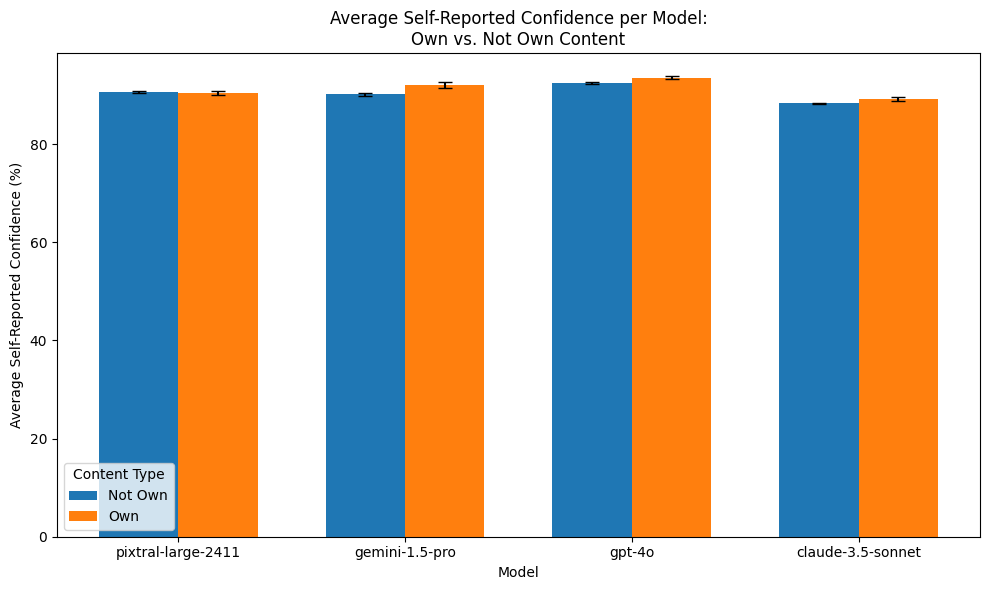

In [38]:
# Import necessary libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Set paths for the dataset and output directory
data_path = "../plots/2025_02_21_23_04_10.csv"
output_dir = "../new_results"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Load the dataset
df = pd.read_csv(data_path)

# Convert model names to lowercase for consistency
df['model_name_judge'] = df['model_name_judge'].str.lower()

# Convert self_reported_confidence (e.g., "85%") into numeric values (e.g., 85.0)
df['self_reported_confidence'] = df['self_reported_confidence'].str.strip('%').astype(float)

# Define desired models (all lowercase)
desired_order = ["pixtral-large-2411", "gemini-1.5-pro", "gpt-4o", "claude-3.5-sonnet"]

# Group the data by model and whether the content is own (is_own_meme) and compute summary statistics
grouped = df.groupby(['model_name_judge', 'is_own_meme'])["self_reported_confidence"] \
            .agg(['mean', 'std', 'count']).reset_index()

# Filter to the desired models
grouped = grouped[grouped['model_name_judge'].isin(desired_order)].copy()

# Calculate the standard error (SE) and the approximate 95% confidence interval (CI = 1.96 * SE)
grouped['se'] = grouped['std'] / np.sqrt(grouped['count'])
grouped['ci'] = 1.96 * grouped['se']

# Prepare lists for the two groups ("Not Own" and "Own") for plotting
means_not_own = []
cis_not_own = []
means_own = []
cis_own = []

for model in desired_order:
    # Group for evaluations that are not the model's own content (is_own_meme == False)
    row_not = grouped[(grouped['model_name_judge'] == model) & (grouped['is_own_meme'] == False)]
    if not row_not.empty:
        means_not_own.append(row_not['mean'].values[0])
        cis_not_own.append(row_not['ci'].values[0])
    else:
        means_not_own.append(np.nan)
        cis_not_own.append(np.nan)
        
    # Group for evaluations that are the model's own content (is_own_meme == True)
    row_own = grouped[(grouped['model_name_judge'] == model) & (grouped['is_own_meme'] == True)]
    if not row_own.empty:
        means_own.append(row_own['mean'].values[0])
        cis_own.append(row_own['ci'].values[0])
    else:
        means_own.append(np.nan)
        cis_own.append(np.nan)

# Plotting the grouped bar chart: two bars per model, one per content type
x = np.arange(len(desired_order))  # one tick per model
bar_width = 0.35  # width of each bar

fig, ax = plt.subplots(figsize=(10, 6))

# Plot the "Not Own" bars to the left and the "Own" bars to the right of the tick
ax.bar(x - bar_width/2, means_not_own, width=bar_width, yerr=cis_not_own,
       capsize=5, label='Not Own')
ax.bar(x + bar_width/2, means_own, width=bar_width, yerr=cis_own,
       capsize=5, label='Own')

# Customize the plot
ax.set_xticks(x)
ax.set_xticklabels(desired_order)
ax.set_xlabel("Model")
ax.set_ylabel("Average Self-Reported Confidence (%)")
ax.set_title("Average Self-Reported Confidence per Model:\nOwn vs. Not Own Content")
ax.legend(title="Content Type")

plt.tight_layout()

# Save and display the plot
plot_path = os.path.join(output_dir, "avg_self_reported_confidence_own_vs_not.png")
plt.savefig(plot_path)
plt.show()


# Stat significance self reported vs real confidence gpt-4o

In [16]:
# Import necessary libraries
import os
import pandas as pd
import numpy as np
from scipy import stats

# Set the dataset path and load the data
data_path = "../plots/2025_02_21_23_04_10.csv"
df = pd.read_csv(data_path)

# Convert the model names to lowercase for consistency
df['model_name_judge'] = df['model_name_judge'].str.lower()

# Filter the dataset to only include GPT-4o evaluations (the only model with real confidence)
df_gpt4o = df[df['model_name_judge'] == 'gpt-4o'].copy()

# Convert self_reported_confidence from strings like "85%" to numeric values (e.g., 85.0)
df_gpt4o['self_reported_confidence'] = df_gpt4o['self_reported_confidence'].str.strip('%').astype(float)

# If necessary, convert real_confidence to numeric. 
# (Assumes that real_confidence is either already numeric or in the same "85%" string format.)
if df_gpt4o['real_confidence'].dtype == object:
    df_gpt4o['real_confidence'] = df_gpt4o['real_confidence'].str.strip('%').astype(float)

# Drop any rows with missing values in either column
df_gpt4o = df_gpt4o.dropna(subset=['self_reported_confidence', 'real_confidence'])

# Determine the number of paired evaluations
n = df_gpt4o.shape[0]

# Compute the means of self_reported_confidence and real_confidence
mean_self = df_gpt4o['self_reported_confidence'].mean()
mean_real = df_gpt4o['real_confidence'].mean()

# Compute standard deviations and then standard errors for each measure
std_self = df_gpt4o['self_reported_confidence'].std()
std_real = df_gpt4o['real_confidence'].std()

se_self = std_self / np.sqrt(n)
se_real = std_real / np.sqrt(n)

# Calculate approximate 95% confidence intervals (using 1.96 * standard error)
ci_self = 1.96 * se_self
ci_real = 1.96 * se_real

# Perform a paired t-test comparing self_reported_confidence and real_confidence
t_stat, p_val = stats.ttest_rel(df_gpt4o['self_reported_confidence'], df_gpt4o['real_confidence'])

# Print the summary statistics and t-test plots
print("Statistical Comparison for GPT-4o Evaluations:")
print(f"Number of Paired Evaluations: {n}")
print(f"Self-Reported Confidence: Mean = {mean_self:.2f}%, 95% CI ± {ci_self:.2f}")
print(f"Real Confidence:         Mean = {mean_real:.2f}%, 95% CI ± {ci_real:.2f}")
print(f"Paired t-test:           t-statistic = {t_stat:.3f}, p-value = {p_val:.3f}")


Statistical Comparison for GPT-4o Evaluations:
Number of Paired Evaluations: 1920
Self-Reported Confidence: Mean = 92.56%, 95% CI ± 0.14
Real Confidence:         Mean = 78.63%, 95% CI ± 0.50
Paired t-test:           t-statistic = 59.616, p-value = 0.000


# stat significance confidences for the modes

In [19]:
# Import necessary libraries
import os
import pandas as pd
import numpy as np
from scipy import stats

# Set dataset path and load the data
data_path = "../plots/2025_02_21_23_04_10.csv"
df = pd.read_csv(data_path)

# Convert model names to lowercase for consistency
df['model_name_judge'] = df['model_name_judge'].str.lower()

# Filter for GPT-4o evaluations (the only model with real confidence)
df_gpt4o = df[df['model_name_judge'] == 'gpt-4o'].copy()

# Convert self_reported_confidence from strings (e.g., "85%") to numeric values (e.g., 85.0)
df_gpt4o['self_reported_confidence'] = df_gpt4o['self_reported_confidence'].str.strip('%').astype(float)

# Convert real_confidence to numeric if necessary (assuming similar percentage string format)
if df_gpt4o['real_confidence'].dtype == object:
    df_gpt4o['real_confidence'] = df_gpt4o['real_confidence'].str.strip('%').astype(float)

# Create a new column "gap" which is the difference between self-reported and real confidence
df_gpt4o['gap'] = df_gpt4o['self_reported_confidence'] - df_gpt4o['real_confidence']

# Create a unique identifier for each meme (if not already present)
df_gpt4o['meme_id'] = df_gpt4o['claim_number'].astype(str) + "_" + df_gpt4o['meme_number'].astype(str)

# For each meme and each evaluation mode, compute the average gap
grouped_gap = df_gpt4o.groupby(['meme_id', 'evaluation_mode'])['gap'].mean().reset_index()

# Pivot the table to obtain one row per meme, with separate columns for each evaluation mode's gap
gap_pivot = grouped_gap.pivot(index='meme_id', columns='evaluation_mode', values='gap')

# Keep only those memes that have evaluations in both modes
gap_pivot = gap_pivot.dropna(subset=['deterministic', 'creative'])

# Number of paired memes available for the comparison
n_pairs = gap_pivot.shape[0]

# Compute the average gap per mode across paired memes
mean_gap_det = gap_pivot['deterministic'].mean()
mean_gap_cre = gap_pivot['creative'].mean()

# Perform a paired t-test comparing the gap in deterministic vs. creative modes
t_stat, p_val = stats.ttest_rel(gap_pivot['deterministic'], gap_pivot['creative'])

# Print the plots
print("Statistical Comparison of the Gap (Self-Reported Confidence − Real Confidence) Between Modes for GPT-4o")
print(f"Number of paired memes: {n_pairs}")
print(f"Mean Gap (Deterministic Mode): {mean_gap_det:.2f}%")
print(f"Mean Gap (Creative Mode):    {mean_gap_cre:.2f}%")
print(f"Paired t-test: t-statistic = {t_stat:.3f}, p-value = {p_val:.3f}")

Statistical Comparison of the Gap (Self-Reported Confidence − Real Confidence) Between Modes for GPT-4o
Number of paired memes: 96
Mean Gap (Deterministic Mode): 11.85%
Mean Gap (Creative Mode):    16.02%
Paired t-test: t-statistic = -10.202, p-value = 0.000


# stat significance confidences own vs not own content

In [21]:
# Import necessary libraries
import os
import pandas as pd
import numpy as np
from scipy import stats

# Set the dataset path and load the data
data_path = "../plots/2025_02_21_23_04_10.csv"
df = pd.read_csv(data_path)

# Convert model names to lowercase for consistency
df['model_name_judge'] = df['model_name_judge'].str.lower()

# Filter to only include GPT-4o evaluations (the only model with real_confidence)
df_gpt4o = df[df['model_name_judge'] == 'gpt-4o'].copy()

# Convert self_reported_confidence from a string like "85%" to numeric (e.g., 85.0)
df_gpt4o['self_reported_confidence'] = df_gpt4o['self_reported_confidence'].str.strip('%').astype(float)

# Convert real_confidence to numeric if necessary (assuming it is in a similar "85%" format)
if df_gpt4o['real_confidence'].dtype == object:
    df_gpt4o['real_confidence'] = df_gpt4o['real_confidence'].str.strip('%').astype(float)

# Compute the gap between self-reported confidence and real confidence
df_gpt4o['gap'] = df_gpt4o['self_reported_confidence'] - df_gpt4o['real_confidence']

# Instead of pairing by meme (which yielded 0 pairs), we compare gap values for independent groups:
# Group evaluations by 'is_own_meme'
gap_own = df_gpt4o[df_gpt4o['is_own_meme'] == True]['gap']
gap_not_own = df_gpt4o[df_gpt4o['is_own_meme'] == False]['gap']

# Compute summary statistics for each group
n_own = gap_own.count()
n_not_own = gap_not_own.count()

mean_gap_own = gap_own.mean()
mean_gap_not_own = gap_not_own.mean()

std_gap_own = gap_own.std()
std_gap_not_own = gap_not_own.std()

se_gap_own = std_gap_own / np.sqrt(n_own) if n_own > 0 else np.nan
se_gap_not_own = std_gap_not_own / np.sqrt(n_not_own) if n_not_own > 0 else np.nan

ci_gap_own = 1.96 * se_gap_own
ci_gap_not_own = 1.96 * se_gap_not_own

# Perform an independent t-test comparing the gap for own vs. not own content
t_stat, p_val = stats.ttest_ind(gap_own, gap_not_own, equal_var=True)

# Print the summary plots
print("Statistical Comparison of the Gap (Self-Reported Confidence - Real Confidence) for GPT-4o")
print("Comparing Own Content vs. Not Own Content (independent groups)")
print(f"Number of evaluations (Own): {n_own}")
print(f"Number of evaluations (Not Own): {n_not_own}")
print(f"Mean Gap (Own): {mean_gap_own:.2f}% ± {ci_gap_own:.2f}")
print(f"Mean Gap (Not Own): {mean_gap_not_own:.2f}% ± {ci_gap_not_own:.2f}")
print(f"Independent t-test: t-statistic = {t_stat:.3f}, p-value = {p_val:.3f}")

Statistical Comparison of the Gap (Self-Reported Confidence - Real Confidence) for GPT-4o
Comparing Own Content vs. Not Own Content (independent groups)
Number of evaluations (Own): 240
Number of evaluations (Not Own): 1680
Mean Gap (Own): 12.64% ± 1.37
Mean Gap (Not Own): 14.12% ± 0.49
Independent t-test: t-statistic = -2.089, p-value = 0.037


# realiability cronbachs alpha

In [22]:
# Import necessary libraries
import os
import pandas as pd
import numpy as np

# Set dataset path and load the data
data_path = "../plots/2025_02_21_23_04_10.csv"
df = pd.read_csv(data_path)

# Define the five evaluation metrics
metrics = ["coherence", "clarity", "hilarity", "persuasiveness", "template_appropriateness"]

# Convert each metric column from a string like "4/5" to a numeric value (extracting the first part)
for col in metrics:
    df[col] = df[col].str.split('/').str[0].astype(float)

# Define a function to compute Cronbach's alpha.
# The formula is:
#   α = (k / (k-1)) * [1 - (sum(item variances) / variance(total score))]
# where k is the number of items.
def cronbach_alpha(df_items):
    # Convert the DataFrame (with items as columns) to a NumPy array.
    items = df_items.to_numpy()
    k = items.shape[1]
    
    # Calculate the variance for each item (using ddof=1 for sample variance)
    item_variances = np.var(items, axis=0, ddof=1)
    
    # Compute the total score for each observation and its variance
    total_scores = np.sum(items, axis=1)
    total_variance = np.var(total_scores, ddof=1)
    
    # Compute Cronbach's alpha using the formula.
    alpha = (k / (k - 1)) * (1 - np.sum(item_variances) / total_variance)
    return alpha

# Calculate and print the overall Cronbach's alpha across all evaluations.
overall_alpha = cronbach_alpha(df[metrics])
print("Overall Cronbach's alpha (all evaluations):", round(overall_alpha, 3))

# Define the desired models (all names in lowercase)
desired_order = ["pixtral-large-2411", "gemini-1.5-pro", "gpt-4o", "claude-3.5-sonnet"]

# Make sure the model names are in lowercase for consistency
df['model_name_judge'] = df['model_name_judge'].str.lower()

# Calculate and print Cronbach's alpha for each model separately.
for model in desired_order:
    df_model = df[df['model_name_judge'] == model]
    alpha_model = cronbach_alpha(df_model[metrics])
    print(f"Cronbach's alpha for model {model}: {alpha_model:.3f}")


Overall Cronbach's alpha (all evaluations): 0.904
Cronbach's alpha for model pixtral-large-2411: 0.815
Cronbach's alpha for model gemini-1.5-pro: 0.895
Cronbach's alpha for model gpt-4o: 0.902
Cronbach's alpha for model claude-3.5-sonnet: 0.932


# ICC for ai models

In [29]:
# Import necessary libraries
import os
import pandas as pd
import numpy as np
import pingouin as pg

#######################################
# Phase 1: Data Loading and Preparation
#######################################
data_path = "../plots/2025_02_21_23_04_10.csv"
df = pd.read_csv(data_path)
print("DEBUG: Data loaded.")
print(f"DEBUG: Data shape: {df.shape}\n")

# Convert model names to lowercase for consistency
df['model_name_judge'] = df['model_name_judge'].str.lower()

# Define the five evaluation metrics and convert them from strings like "4/5" to numeric.
metrics = ["coherence", "clarity", "hilarity", "persuasiveness", "template_appropriateness"]
for col in metrics:
    print(f"DEBUG: Sample of '{col}' before conversion: {df[col].head().tolist()}")
    df[col] = df[col].str.split('/').str[0].astype(float)
    print(f"DEBUG: Sample of '{col}' after conversion: {df[col].head().tolist()}\n")

# Compute an overall rating for each evaluation as the average of the five metrics.
df['overall_rating'] = df[metrics].mean(axis=1)
print("DEBUG: Overall rating (sample):")
print(df[['overall_rating']].head(), "\n")

# Create a unique identifier for each meme from claim_number and meme_number.
df['meme_id'] = df['claim_number'].astype(str) + "_" + df['meme_number'].astype(str)
print("DEBUG: Unique meme_id created. Sample:")
print(df[['meme_id']].drop_duplicates().head(), "\n")

#######################################
# Phase 2: Aggregate Evaluations per Model per Meme
#######################################
# Each model rates each meme 20 times.
# We collapse these 20 evaluations into a single average score per model per meme.
df_agg = df.groupby(['meme_id', 'model_name_judge'])['overall_rating'].mean().reset_index()
print("DEBUG: Aggregated ratings (averaging 20 evaluations per model per meme):")
print(df_agg.head(), "\n")

# Debug: Check how many evaluations each meme has
counts = df_agg.groupby('meme_id').size()
print("DEBUG: Distribution of number of model ratings per meme:")
print(counts.value_counts(), "\n")
# We expect that for each meme there should be 4 ratings (one per model).

#######################################
# Phase 3: Filter to Memes with All 4 Model Ratings
#######################################
# Retain only those memes for which we have ratings from all 4 models.
memes_full = df_agg.groupby('meme_id').filter(lambda g: g['model_name_judge'].nunique() == 4)
n_memes = memes_full['meme_id'].nunique()
print(f"DEBUG: Number of memes with ratings from all 4 models: {n_memes}\n")

#######################################
# Phase 4: Compute ICC Across AI Evaluations (Pooled Across All Models)
#######################################
# We now treat each meme as a target and each model as a rater.
# Create a DataFrame that has columns: meme_id, model_name_judge, overall_rating.
# This 'memes_full' dataframe already has that structure.
# Compute the intraclass correlation coefficient (ICC) using pingouin.
icc_df = pg.intraclass_corr(data=memes_full, targets='meme_id',
                            raters='model_name_judge', ratings='overall_rating')
print("DEBUG: ICC plots from pingouin:")
print(icc_df, "\n")

# We select the ICC2 value (two-way random effects, absolute agreement) similar to the human study.
try:
    icc_value = icc_df.loc[icc_df['Type'] == 'ICC2', 'ICC'].values[0]
    print(f"Final Result: Average ICC (ICC2) across memes (pooled across all AI evaluations): {icc_value:.3f}")
except IndexError:
    print("DEBUG: Could not extract ICC2 value from the computed plots.")

DEBUG: Data loaded.
DEBUG: Data shape: (7680, 20)

DEBUG: Sample of 'coherence' before conversion: ['4/5', '5/5', '4/5', '5/5', '4/5']
DEBUG: Sample of 'coherence' after conversion: [4.0, 5.0, 4.0, 5.0, 4.0]

DEBUG: Sample of 'clarity' before conversion: ['4/5', '5/5', '4/5', '5/5', '4/5']
DEBUG: Sample of 'clarity' after conversion: [4.0, 5.0, 4.0, 5.0, 4.0]

DEBUG: Sample of 'hilarity' before conversion: ['3/5', '4/5', '3/5', '4/5', '3/5']
DEBUG: Sample of 'hilarity' after conversion: [3.0, 4.0, 3.0, 4.0, 3.0]

DEBUG: Sample of 'persuasiveness' before conversion: ['4/5', '5/5', '4/5', '5/5', '4/5']
DEBUG: Sample of 'persuasiveness' after conversion: [4.0, 5.0, 4.0, 5.0, 4.0]

DEBUG: Sample of 'template_appropriateness' before conversion: ['4/5', '5/5', '4/5', '5/5', '4/5']
DEBUG: Sample of 'template_appropriateness' after conversion: [4.0, 5.0, 4.0, 5.0, 4.0]

DEBUG: Overall rating (sample):
   overall_rating
0             3.8
1             4.8
2             3.8
3             4.8
4  

# Intra model reliability

In [30]:
# Import necessary libraries
import os
import pandas as pd
import numpy as np
import pingouin as pg

##############################################
# Phase 1: Data Loading and Preparation
##############################################
data_path = "../plots/2025_02_21_23_04_10.csv"
df = pd.read_csv(data_path)
print("DEBUG: Data loaded.")
print(f"DEBUG: Data shape: {df.shape}\n")

# Convert model names to lowercase for consistency.
df['model_name_judge'] = df['model_name_judge'].str.lower()

# Define the five evaluation metrics and convert them from strings like "4/5" to numeric values.
metrics = ["coherence", "clarity", "hilarity", "persuasiveness", "template_appropriateness"]
for col in metrics:
    print(f"DEBUG: Sample of '{col}' before conversion: {df[col].head().tolist()}")
    df[col] = df[col].str.split('/').str[0].astype(float)
    print(f"DEBUG: Sample of '{col}' after conversion: {df[col].head().tolist()}\n")

# Compute an overall rating for each evaluation as the average of the five metrics.
df['overall_rating'] = df[metrics].mean(axis=1)
print("DEBUG: Overall rating computed. Sample:")
print(df[['overall_rating']].head(), "\n")

# Create a unique identifier for each meme using claim_number and meme_number.
df['meme_id'] = df['claim_number'].astype(str) + "_" + df['meme_number'].astype(str)
print("DEBUG: Unique meme_id created. Total unique memes:", df['meme_id'].nunique(), "\n")

##############################################
# Phase 2: Compute Within-Model Reliability for Each AI Model
##############################################
# Here, we treat each AI model as a rater that gives 20 repeated evaluations for each meme.
# For each model, we pivot the data so that rows are memes and columns are repetition numbers,
# then use pingouin's intraclass_corr to compute ICC2.
desired_models = ["pixtral-large-2411", "gemini-1.5-pro", "gpt-4o", "claude-3.5-sonnet"]

for model in desired_models:
    # Filter for the current model.
    df_model = df[df['model_name_judge'] == model].copy()
    print(f"DEBUG: Model '{model}' - number of evaluations: {df_model.shape[0]}")
    
    # Pivot the data:
    # Rows: each unique meme (meme_id)
    # Columns: repetition_number (the 20 repeated evaluations)
    # Values: overall_rating.
    df_wide = df_model.pivot(index='meme_id', columns='repetition_number', values='overall_rating')
    print(f"DEBUG: Model '{model}' - Pivoted data shape: {df_wide.shape}")
    
    # Optionally, filter memes that have at least a certain number of evaluations.
    # In our experiment, each meme should have 20 ratings; if some are missing, you might require at least 10.
    min_reps = 10
    df_wide_complete = df_wide.dropna(thresh=min_reps)
    print(f"DEBUG: Model '{model}' - Memes with at least {min_reps} ratings: {df_wide_complete.shape[0]}\n")
    
    # Reshape the complete wide-format data into long-format for ICC calculation.
    df_long = df_wide_complete.reset_index().melt(id_vars='meme_id', var_name='repetition', value_name='overall_rating')
    print(f"DEBUG: Model '{model}' - Long-format data shape: {df_long.shape}")
    print("DEBUG: Sample of long-format data:")
    print(df_long.head(), "\n")
    
    # Compute ICC using pingouin.
    # Here, each meme_id is a target and each repetition is treated as a 'rater'.
    try:
        icc_df = pg.intraclass_corr(data=df_long, targets='meme_id', raters='repetition', ratings='overall_rating')
        print(f"DEBUG: Model '{model}' - ICC computation plots:")
        print(icc_df, "\n")
        # Extract the ICC2 value (single-rating ICC, two-way random effects model for absolute agreement).
        icc_val = icc_df.loc[icc_df['Type'] == 'ICC2', 'ICC'].values[0]
        print(f"Within-model reliability for model '{model}' (ICC2 from repeated evaluations): {icc_val:.3f}\n")
    except Exception as e:
        print(f"Error computing ICC for model '{model}': {e}\n")

DEBUG: Data loaded.
DEBUG: Data shape: (7680, 20)

DEBUG: Sample of 'coherence' before conversion: ['4/5', '5/5', '4/5', '5/5', '4/5']
DEBUG: Sample of 'coherence' after conversion: [4.0, 5.0, 4.0, 5.0, 4.0]

DEBUG: Sample of 'clarity' before conversion: ['4/5', '5/5', '4/5', '5/5', '4/5']
DEBUG: Sample of 'clarity' after conversion: [4.0, 5.0, 4.0, 5.0, 4.0]

DEBUG: Sample of 'hilarity' before conversion: ['3/5', '4/5', '3/5', '4/5', '3/5']
DEBUG: Sample of 'hilarity' after conversion: [3.0, 4.0, 3.0, 4.0, 3.0]

DEBUG: Sample of 'persuasiveness' before conversion: ['4/5', '5/5', '4/5', '5/5', '4/5']
DEBUG: Sample of 'persuasiveness' after conversion: [4.0, 5.0, 4.0, 5.0, 4.0]

DEBUG: Sample of 'template_appropriateness' before conversion: ['4/5', '5/5', '4/5', '5/5', '4/5']
DEBUG: Sample of 'template_appropriateness' after conversion: [4.0, 5.0, 4.0, 5.0, 4.0]

DEBUG: Overall rating computed. Sample:
   overall_rating
0             3.8
1             4.8
2             3.8
3            

# EFA analysis

DEBUG: Data loaded. Data shape: (7680, 20)
DEBUG: Column 'coherence' conversion. Before: ['4/5', '5/5', '4/5', '5/5', '4/5'] | After: [4.0, 5.0, 4.0, 5.0, 4.0]
DEBUG: Column 'clarity' conversion. Before: ['4/5', '5/5', '4/5', '5/5', '4/5'] | After: [4.0, 5.0, 4.0, 5.0, 4.0]
DEBUG: Column 'hilarity' conversion. Before: ['3/5', '4/5', '3/5', '4/5', '3/5'] | After: [3.0, 4.0, 3.0, 4.0, 3.0]
DEBUG: Column 'persuasiveness' conversion. Before: ['4/5', '5/5', '4/5', '5/5', '4/5'] | After: [4.0, 5.0, 4.0, 5.0, 4.0]
DEBUG: Column 'template_appropriateness' conversion. Before: ['4/5', '5/5', '4/5', '5/5', '4/5'] | After: [4.0, 5.0, 4.0, 5.0, 4.0]
DEBUG: Using 7680 evaluations for EFA.

DEBUG: Eigenvalues: [3.66611064 0.57617593 0.34295652 0.23230376 0.18245314]


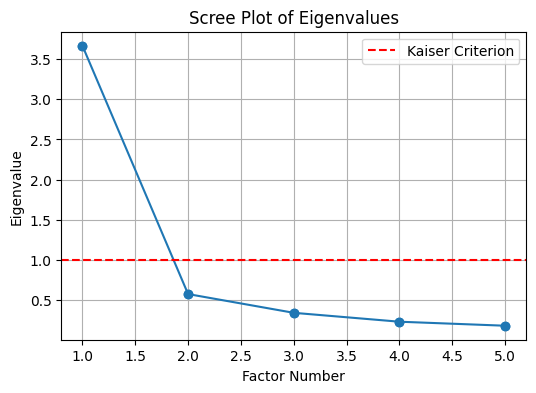


DEBUG: Factor Loadings (1-factor solution):
                           Factor1
coherence                -0.905092
clarity                  -0.820601
hilarity                 -0.631964
persuasiveness           -0.885348
template_appropriateness -0.831214

DEBUG: Variance Explained:
   Variance  Percentage  Cumulative
0  3.366713    0.673343    0.673343

Final Interpretation:
If the five AI evaluation metrics load strongly onto one factor (e.g., with high loadings all >0.6) and
the scree plot shows a large drop after the first eigenvalue (with the first eigenvalue well above 1),
this suggests that AI raters—like human raters—tend to form a global impression of meme quality.


/opt/anaconda3/envs/MemeFact/lib/python3.12/site-packages/factor_analyzer/factor_analyzer.py:663: UserWarning: No rotation will be performed when the number of factors equals 1.
  warnings.warn(


In [31]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from factor_analyzer import FactorAnalyzer

######################################
# Phase 1: Data Loading and Preparation
######################################
data_path = "../plots/2025_02_21_23_04_10.csv"
df = pd.read_csv(data_path)
print("DEBUG: Data loaded. Data shape:", df.shape)

# Define the five evaluation metrics
metrics = ["coherence", "clarity", "hilarity", "persuasiveness", "template_appropriateness"]

# Convert each metric column from strings like "4/5" to numeric values (taking the first part)
for col in metrics:
    sample_before = df[col].head(5).tolist()
    df[col] = df[col].str.split('/').str[0].astype(float)
    sample_after = df[col].head(5).tolist()
    print(f"DEBUG: Column '{col}' conversion. Before: {sample_before} | After: {sample_after}")

# Drop any rows with missing values in these metrics
df_metrics = df[metrics].dropna()
print("DEBUG: Using", df_metrics.shape[0], "evaluations for EFA.\n")

######################################
# Phase 2: Exploratory Factor Analysis (EFA)
######################################
# Step 2.1: Extract Eigenvalues (Scree Plot)
fa = FactorAnalyzer(n_factors=5, rotation=None)
fa.fit(df_metrics)
eigenvalues, _ = fa.get_eigenvalues()
print("DEBUG: Eigenvalues:", eigenvalues)

plt.figure(figsize=(6,4))
plt.scatter(range(1, len(eigenvalues)+1), eigenvalues)
plt.plot(range(1, len(eigenvalues)+1), eigenvalues, marker='o')
plt.title('Scree Plot of Eigenvalues')
plt.xlabel('Factor Number')
plt.ylabel('Eigenvalue')
plt.axhline(y=1.0, color='red', linestyle='--', label="Kaiser Criterion")
plt.legend()
plt.grid(True)
plt.show()

# Step 2.2: Decide the Number of Factors 
# (In the human study, the five metrics loaded strongly onto one factor with an eigenvalue around 4.)
# Here we will extract a single factor for comparison.
n_factors_to_extract = 1
fa = FactorAnalyzer(n_factors=n_factors_to_extract, rotation='varimax')
fa.fit(df_metrics)
loadings = fa.loadings_

print("\nDEBUG: Factor Loadings (1-factor solution):")
loadings_df = pd.DataFrame(loadings, index=metrics, columns=[f"Factor1"])
print(loadings_df)

# Step 2.3: Variance Explained
variance, perc_var, cum_var = fa.get_factor_variance()
print("\nDEBUG: Variance Explained:")
variance_explained = pd.DataFrame({"Variance": variance,
                                   "Percentage": perc_var,
                                   "Cumulative": cum_var})
print(variance_explained)

######################################
# Interpretation Output
######################################
print("\nFinal Interpretation:")
print("If the five AI evaluation metrics load strongly onto one factor (e.g., with high loadings all >0.6) and")
print("the scree plot shows a large drop after the first eigenvalue (with the first eigenvalue well above 1),")
print("this suggests that AI raters—like human raters—tend to form a global impression of meme quality.")


# Corr self confidence true confidence

DEBUG: Filtered data for GPT-4o. Shape: (1920, 20)
DEBUG: Sample self_reported_confidence: [95.0, 95.0, 95.0, 95.0, 95.0]
DEBUG: Sample real_confidence: [90.08, 91.36, 92.88, 90.93, 91.44]
DEBUG: Data shape after dropping missing values: (1920, 20)

Pearson correlation coefficient between self-reported confidence and true confidence for GPT-4o: 0.396
p-value: 0.000


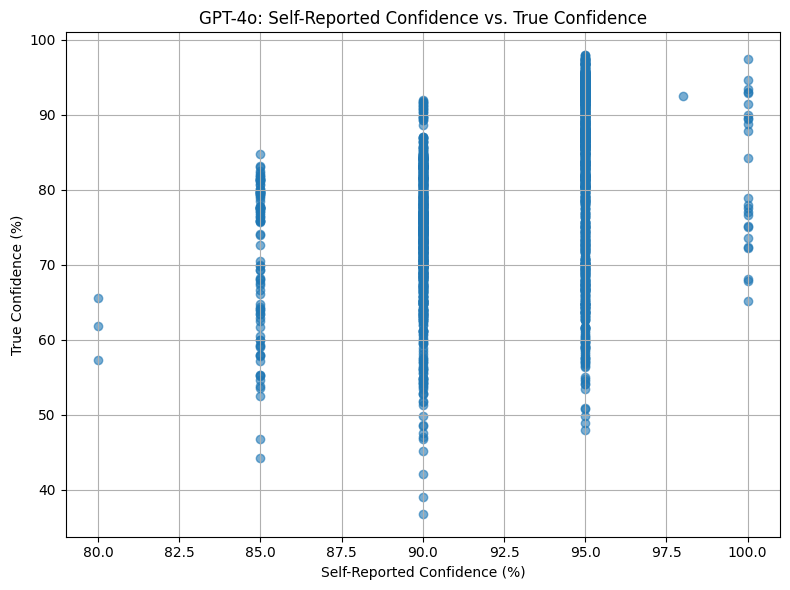

In [32]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Set dataset path and load the data
data_path = "../plots/2025_02_21_23_04_10.csv"
df = pd.read_csv(data_path)

# Filter the DataFrame to only include GPT-4o evaluations
df_gpt4o = df[df['model_name_judge'].str.lower() == 'gpt-4o'].copy()
print("DEBUG: Filtered data for GPT-4o. Shape:", df_gpt4o.shape)

# Convert self_reported_confidence from string format (e.g., "85%") to numeric (e.g., 85.0)
df_gpt4o['self_reported_confidence'] = df_gpt4o['self_reported_confidence'].str.strip('%').astype(float)
print("DEBUG: Sample self_reported_confidence:", df_gpt4o['self_reported_confidence'].head().tolist())

# Convert real_confidence to numeric if needed (assuming similar percentage string format)
if df_gpt4o['real_confidence'].dtype == object:
    df_gpt4o['real_confidence'] = df_gpt4o['real_confidence'].str.strip('%').astype(float)
print("DEBUG: Sample real_confidence:", df_gpt4o['real_confidence'].head().tolist())

# Drop rows with missing values in the confidence columns (if any)
df_gpt4o = df_gpt4o.dropna(subset=['self_reported_confidence', 'real_confidence'])
print("DEBUG: Data shape after dropping missing values:", df_gpt4o.shape)

# Calculate Pearson correlation between self_reported_confidence and real_confidence
r, p_value = pearsonr(df_gpt4o['self_reported_confidence'], df_gpt4o['real_confidence'])

print(f"\nPearson correlation coefficient between self-reported confidence and true confidence for GPT-4o: {r:.3f}")
print(f"p-value: {p_value:.3f}")

# Optional: Create a scatter plot to visualize the relationship
plt.figure(figsize=(8, 6))
plt.scatter(df_gpt4o['self_reported_confidence'], df_gpt4o['real_confidence'], alpha=0.6)
plt.xlabel('Self-Reported Confidence (%)')
plt.ylabel('True Confidence (%)')
plt.title('GPT-4o: Self-Reported Confidence vs. True Confidence')
plt.grid(True)
plt.tight_layout()
plt.show()

# Corr self confidence average metri s

DEBUG: Data loaded. Data shape: (7680, 20)
DEBUG: Column 'coherence' conversion. Before: ['4/5', '5/5', '4/5', '5/5', '4/5'] | After: [4.0, 5.0, 4.0, 5.0, 4.0]
DEBUG: Column 'clarity' conversion. Before: ['4/5', '5/5', '4/5', '5/5', '4/5'] | After: [4.0, 5.0, 4.0, 5.0, 4.0]
DEBUG: Column 'hilarity' conversion. Before: ['3/5', '4/5', '3/5', '4/5', '3/5'] | After: [3.0, 4.0, 3.0, 4.0, 3.0]
DEBUG: Column 'persuasiveness' conversion. Before: ['4/5', '5/5', '4/5', '5/5', '4/5'] | After: [4.0, 5.0, 4.0, 5.0, 4.0]
DEBUG: Column 'template_appropriateness' conversion. Before: ['4/5', '5/5', '4/5', '5/5', '4/5'] | After: [4.0, 5.0, 4.0, 5.0, 4.0]
DEBUG: Overall rating (sample): [3.8, 4.8, 3.8, 4.8, 3.8]
DEBUG: Self-reported confidence (sample): [85.0, 95.0, 85.0, 95.0, 85.0]
DEBUG: Data shape after dropping missing values: (7680, 21)

Pearson correlation between overall rating and self-reported confidence: r = 0.620, p = 0.000


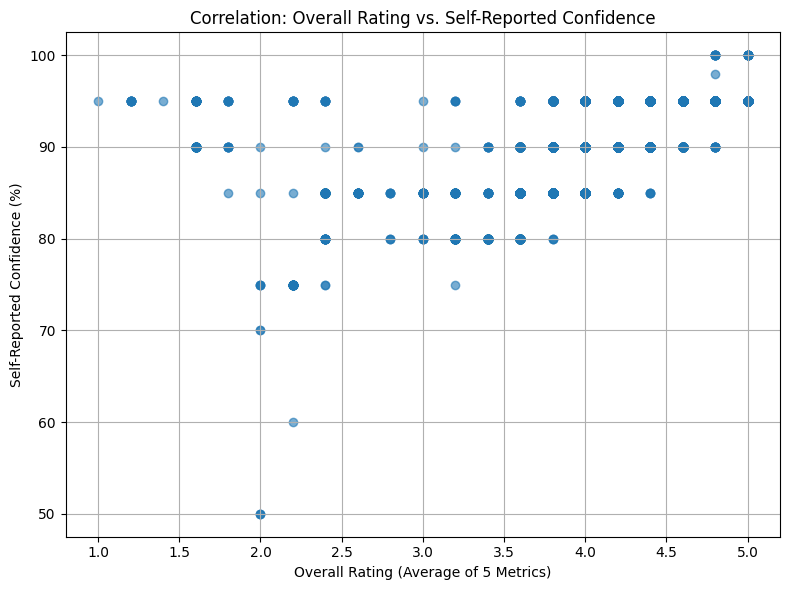

In [33]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

######################################
# Phase 1: Data Loading
######################################
data_path = "../plots/2025_02_21_23_04_10.csv"
df = pd.read_csv(data_path)
print("DEBUG: Data loaded. Data shape:", df.shape)

######################################
# Phase 2: Data Conversion for Evaluation Metrics
######################################
# Define the five evaluation metrics
metrics = ["coherence", "clarity", "hilarity", "persuasiveness", "template_appropriateness"]

# Convert each metric column from a string like "4/5" to a numeric value (extracting the first part)
for col in metrics:
    sample_before = df[col].head(5).tolist()
    df[col] = df[col].str.split('/').str[0].astype(float)
    sample_after = df[col].head(5).tolist()
    print(f"DEBUG: Column '{col}' conversion. Before: {sample_before} | After: {sample_after}")

######################################
# Phase 3: Calculate Overall Rating
######################################
# Compute an overall rating for each evaluation as the average of the five metrics.
df['overall_rating'] = df[metrics].mean(axis=1)
print("DEBUG: Overall rating (sample):", df['overall_rating'].head().tolist())

######################################
# Phase 4: Convert Self-Reported Confidence
######################################
# Convert self_reported_confidence from strings like "85%" to numeric (e.g., 85.0)
df['self_reported_confidence'] = df['self_reported_confidence'].str.strip('%').astype(float)
print("DEBUG: Self-reported confidence (sample):", df['self_reported_confidence'].head().tolist())

######################################
# Phase 5: Filter Complete Cases
######################################
df_complete = df.dropna(subset=['overall_rating', 'self_reported_confidence'])
print("DEBUG: Data shape after dropping missing values:", df_complete.shape)

######################################
# Phase 6: Calculate Pearson Correlation
######################################
r, p_value = pearsonr(df_complete['overall_rating'], df_complete['self_reported_confidence'])
print(f"\nPearson correlation between overall rating and self-reported confidence: r = {r:.3f}, p = {p_value:.3f}")

######################################
# Phase 7: Scatter Plot for Visualization
######################################
plt.figure(figsize=(8, 6))
plt.scatter(df_complete['overall_rating'], df_complete['self_reported_confidence'], alpha=0.6)
plt.xlabel('Overall Rating (Average of 5 Metrics)')
plt.ylabel('Self-Reported Confidence (%)')
plt.title('Correlation: Overall Rating vs. Self-Reported Confidence')
plt.grid(True)
plt.tight_layout()
plt.show()


# Corr true confidence average metrics

DEBUG: Data loaded. Data shape: (7680, 20)
DEBUG: Column 'coherence' conversion. Before: ['4/5', '5/5', '4/5', '5/5', '4/5'] | After: [4.0, 5.0, 4.0, 5.0, 4.0]
DEBUG: Column 'clarity' conversion. Before: ['4/5', '5/5', '4/5', '5/5', '4/5'] | After: [4.0, 5.0, 4.0, 5.0, 4.0]
DEBUG: Column 'hilarity' conversion. Before: ['3/5', '4/5', '3/5', '4/5', '3/5'] | After: [3.0, 4.0, 3.0, 4.0, 3.0]
DEBUG: Column 'persuasiveness' conversion. Before: ['4/5', '5/5', '4/5', '5/5', '4/5'] | After: [4.0, 5.0, 4.0, 5.0, 4.0]
DEBUG: Column 'template_appropriateness' conversion. Before: ['4/5', '5/5', '4/5', '5/5', '4/5'] | After: [4.0, 5.0, 4.0, 5.0, 4.0]
DEBUG: Overall rating computed. Sample: [3.8, 4.8, 3.8, 4.8, 3.8]
DEBUG: Real confidence (sample): [nan, nan, nan, nan, nan]
DEBUG: Data shape after dropping missing values: (1920, 21)

Pearson correlation between overall rating and true confidence: r = 0.530, p = 0.000


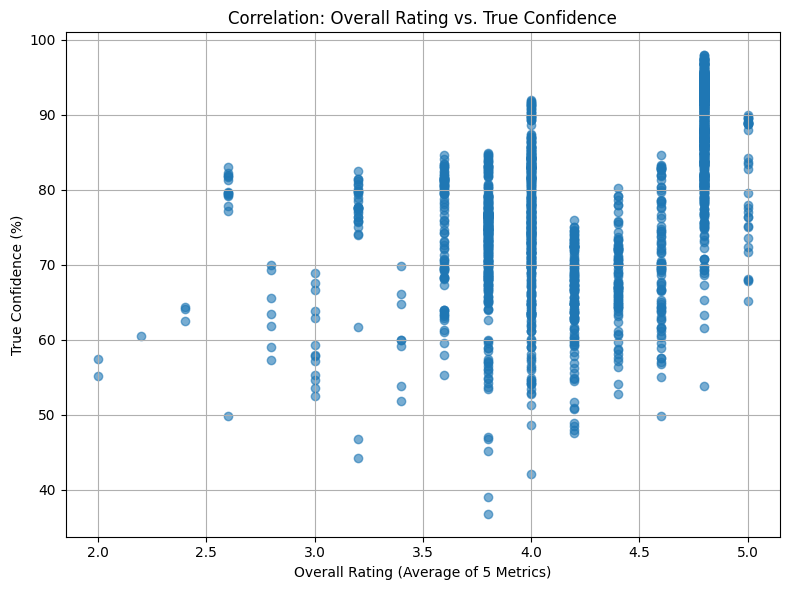

In [34]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

######################################
# Phase 1: Data Loading
######################################
data_path = "../plots/2025_02_21_23_04_10.csv"
df = pd.read_csv(data_path)
print("DEBUG: Data loaded. Data shape:", df.shape)

######################################
# Phase 2: Data Conversion for Evaluation Metrics
######################################
# Define the five evaluation metrics
metrics = ["coherence", "clarity", "hilarity", "persuasiveness", "template_appropriateness"]

# Convert each metric column from a string like "4/5" to a numeric value (extract the first part)
for col in metrics:
    sample_before = df[col].head(5).tolist()
    df[col] = df[col].str.split('/').str[0].astype(float)
    sample_after = df[col].head(5).tolist()
    print(f"DEBUG: Column '{col}' conversion. Before: {sample_before} | After: {sample_after}")

######################################
# Phase 3: Calculate Overall Rating
######################################
# Compute the overall rating as the average of the 5 metrics.
df['overall_rating'] = df[metrics].mean(axis=1)
print("DEBUG: Overall rating computed. Sample:", df['overall_rating'].head().tolist())

######################################
# Phase 4: Convert True Confidence
######################################
# Convert real_confidence from strings like "85%" to numeric (e.g., 85.0)
df['real_confidence'] = df['real_confidence'].str.strip('%').astype(float)
print("DEBUG: Real confidence (sample):", df['real_confidence'].head().tolist())

######################################
# Phase 5: Filter Complete Cases
######################################
df_complete = df.dropna(subset=['overall_rating', 'real_confidence'])
print("DEBUG: Data shape after dropping missing values:", df_complete.shape)

######################################
# Phase 6: Calculate Pearson Correlation between Overall Rating and True Confidence
######################################
r, p_value = pearsonr(df_complete['overall_rating'], df_complete['real_confidence'])
print(f"\nPearson correlation between overall rating and true confidence: r = {r:.3f}, p = {p_value:.3f}")

######################################
# Phase 7: Scatter Plot for Visualization
######################################
plt.figure(figsize=(8, 6))
plt.scatter(df_complete['overall_rating'], df_complete['real_confidence'], alpha=0.6)
plt.xlabel('Overall Rating (Average of 5 Metrics)')
plt.ylabel('True Confidence (%)')
plt.title('Correlation: Overall Rating vs. True Confidence')
plt.grid(True)
plt.tight_layout()
plt.show()


# Corr self confidence per metric

DEBUG: Data loaded. Shape: (7680, 20)
DEBUG: Sample of 'coherence' before conversion: ['4/5', '5/5', '4/5', '5/5', '4/5']
DEBUG: Sample of 'coherence' after conversion: [4.0, 5.0, 4.0, 5.0, 4.0]

DEBUG: Sample of 'clarity' before conversion: ['4/5', '5/5', '4/5', '5/5', '4/5']
DEBUG: Sample of 'clarity' after conversion: [4.0, 5.0, 4.0, 5.0, 4.0]

DEBUG: Sample of 'hilarity' before conversion: ['3/5', '4/5', '3/5', '4/5', '3/5']
DEBUG: Sample of 'hilarity' after conversion: [3.0, 4.0, 3.0, 4.0, 3.0]

DEBUG: Sample of 'persuasiveness' before conversion: ['4/5', '5/5', '4/5', '5/5', '4/5']
DEBUG: Sample of 'persuasiveness' after conversion: [4.0, 5.0, 4.0, 5.0, 4.0]

DEBUG: Sample of 'template_appropriateness' before conversion: ['4/5', '5/5', '4/5', '5/5', '4/5']
DEBUG: Sample of 'template_appropriateness' after conversion: [4.0, 5.0, 4.0, 5.0, 4.0]

DEBUG: Sample of 'self_reported_confidence' before conversion: ['85%', '95%', '85%', '95%', '85%']
DEBUG: Sample of 'self_reported_confide

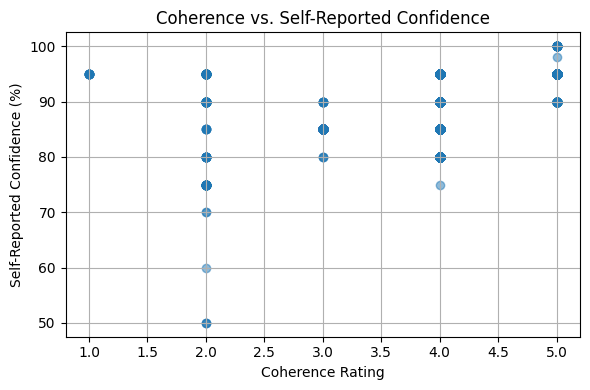

Pearson correlation between clarity and self-reported confidence: r = 0.585, p = 0.000


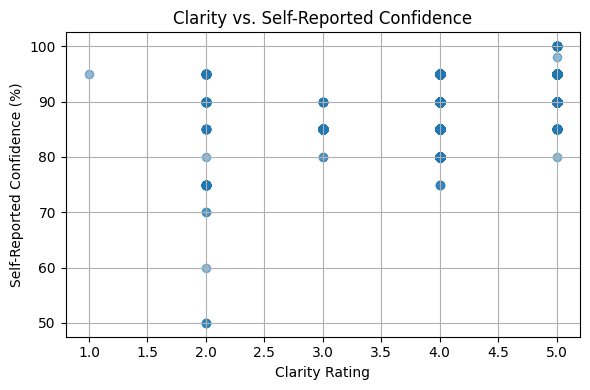

Pearson correlation between hilarity and self-reported confidence: r = 0.453, p = 0.000


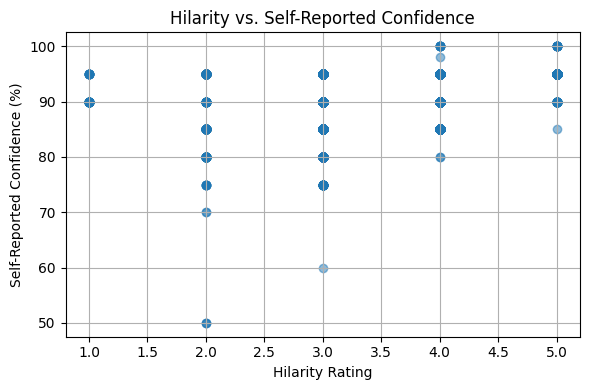

Pearson correlation between persuasiveness and self-reported confidence: r = 0.544, p = 0.000


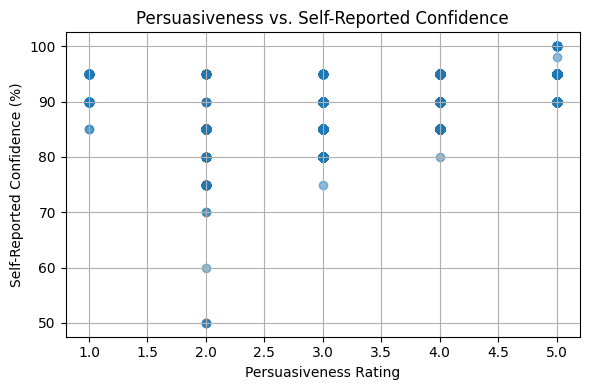

Pearson correlation between template_appropriateness and self-reported confidence: r = 0.531, p = 0.000


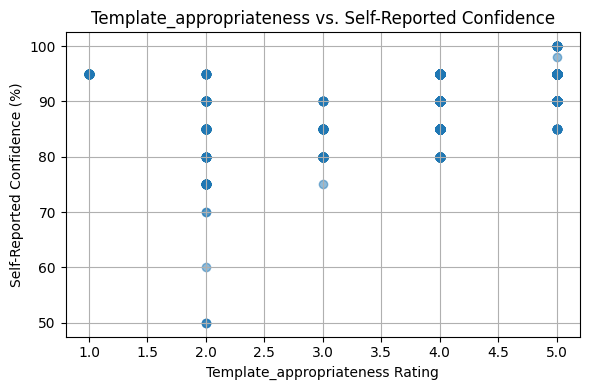

In [35]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

######################################
# Phase 1: Load and Prepare the Data
######################################
data_path = "../plots/2025_02_21_23_04_10.csv"
df = pd.read_csv(data_path)
print("DEBUG: Data loaded. Shape:", df.shape)

# Define the five evaluation metrics
metrics = ["coherence", "clarity", "hilarity", "persuasiveness", "template_appropriateness"]

# Convert each metric column from a string like "4/5" to a numeric value 
for col in metrics:
    print(f"DEBUG: Sample of '{col}' before conversion: {df[col].head().tolist()}")
    df[col] = df[col].str.split('/').str[0].astype(float)
    print(f"DEBUG: Sample of '{col}' after conversion: {df[col].head().tolist()}\n")

# Convert self_reported_confidence from a string like "85%" to a numeric value (e.g., 85.0)
print("DEBUG: Sample of 'self_reported_confidence' before conversion:", df['self_reported_confidence'].head().tolist())
df['self_reported_confidence'] = df['self_reported_confidence'].str.strip('%').astype(float)
print("DEBUG: Sample of 'self_reported_confidence' after conversion:", df['self_reported_confidence'].head().tolist(), "\n")

# Drop any rows with missing values in the metrics or self_reported_confidence columns
df_complete = df.dropna(subset=metrics + ['self_reported_confidence'])
print("DEBUG: Data shape after dropping missing values:", df_complete.shape, "\n")

######################################
# Phase 2: Compute Correlations for Each Metric
######################################
for metric in metrics:
    r, p_value = pearsonr(df_complete[metric], df_complete['self_reported_confidence'])
    print(f"Pearson correlation between {metric} and self-reported confidence: r = {r:.3f}, p = {p_value:.3f}")
    
    # Scatter plot for visualization
    plt.figure(figsize=(6, 4))
    plt.scatter(df_complete[metric], df_complete['self_reported_confidence'], alpha=0.5)
    plt.xlabel(f'{metric.capitalize()} Rating')
    plt.ylabel('Self-Reported Confidence (%)')
    plt.title(f'{metric.capitalize()} vs. Self-Reported Confidence')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


# Corr real confidence per metric

DEBUG: Data loaded. Data shape: (7680, 20)
DEBUG: Column 'coherence' conversion. Before: ['4/5', '5/5', '4/5', '5/5', '4/5'] | After: [4.0, 5.0, 4.0, 5.0, 4.0]
DEBUG: Column 'clarity' conversion. Before: ['4/5', '5/5', '4/5', '5/5', '4/5'] | After: [4.0, 5.0, 4.0, 5.0, 4.0]
DEBUG: Column 'hilarity' conversion. Before: ['3/5', '4/5', '3/5', '4/5', '3/5'] | After: [3.0, 4.0, 3.0, 4.0, 3.0]
DEBUG: Column 'persuasiveness' conversion. Before: ['4/5', '5/5', '4/5', '5/5', '4/5'] | After: [4.0, 5.0, 4.0, 5.0, 4.0]
DEBUG: Column 'template_appropriateness' conversion. Before: ['4/5', '5/5', '4/5', '5/5', '4/5'] | After: [4.0, 5.0, 4.0, 5.0, 4.0]
DEBUG: Sample of 'real_confidence' before conversion: [nan, nan, nan, nan, nan]
DEBUG: Sample of 'real_confidence' after conversion: [nan, nan, nan, nan, nan] 

DEBUG: Data shape after dropping missing values: (1920, 20) 

Pearson correlation between coherence and true confidence: r = 0.606, p = 0.000


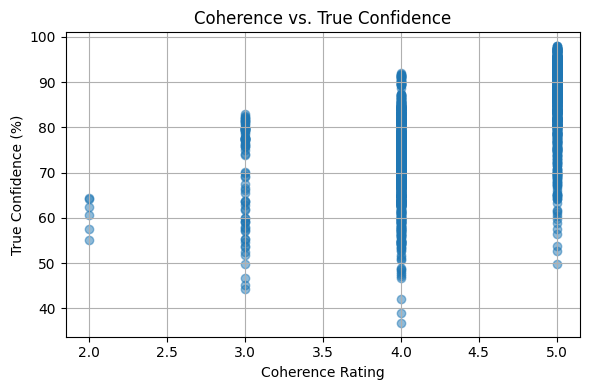

Pearson correlation between clarity and true confidence: r = 0.424, p = 0.000


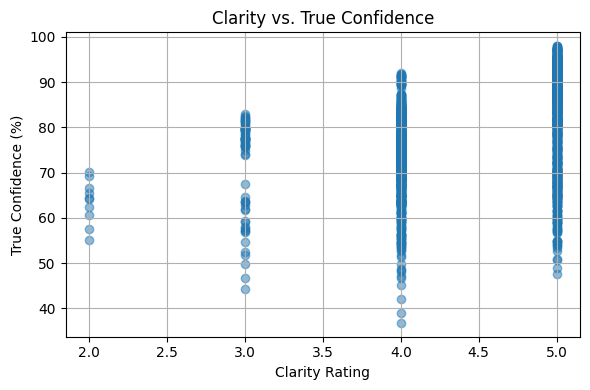

Pearson correlation between hilarity and true confidence: r = 0.283, p = 0.000


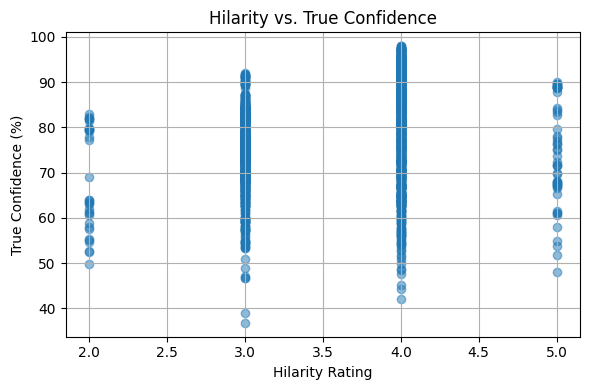

Pearson correlation between persuasiveness and true confidence: r = 0.555, p = 0.000


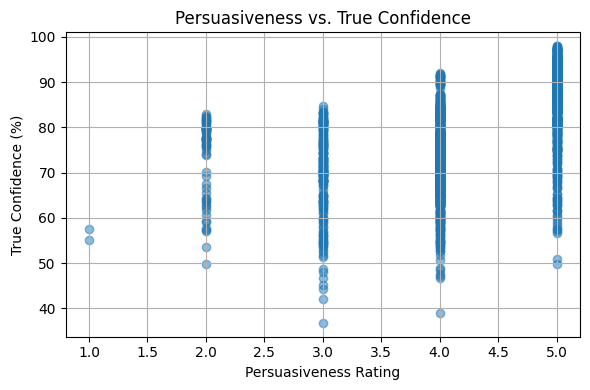

Pearson correlation between template_appropriateness and true confidence: r = 0.351, p = 0.000


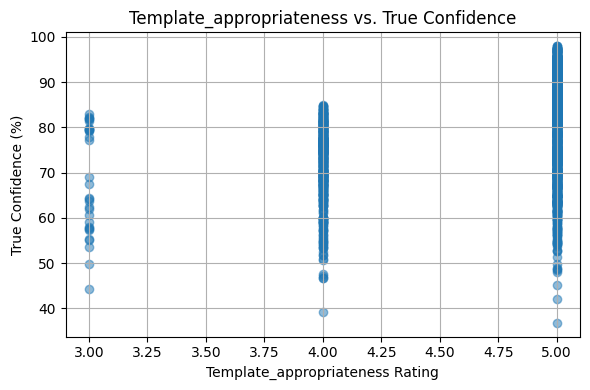

In [44]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

######################################
# Phase 1: Data Loading
######################################
data_path = "../plots/2025_02_21_23_04_10.csv"
df = pd.read_csv(data_path)
print("DEBUG: Data loaded. Data shape:", df.shape)

######################################
# Phase 2: Data Conversion for Evaluation Metrics
######################################
# Define the five evaluation metrics
metrics = ["coherence", "clarity", "hilarity", "persuasiveness", "template_appropriateness"]

# Convert each metric column from a string like "4/5" to a numeric value (extract the first part)
for col in metrics:
    sample_before = df[col].head(5).tolist()
    df[col] = df[col].str.split('/').str[0].astype(float)
    sample_after = df[col].head(5).tolist()
    print(f"DEBUG: Column '{col}' conversion. Before: {sample_before} | After: {sample_after}")

######################################
# Phase 3: Calculate Overall Rating (Optional - for inspection)
######################################
# If you need the overall rating, uncomment the following lines:
# df['overall_rating'] = df[metrics].mean(axis=1)
# print("DEBUG: Overall rating computed. Sample:", df['overall_rating'].head().tolist())

######################################
# Phase 4: Convert True Confidence
######################################
# Convert real_confidence from strings like "85%" to numeric (e.g., 85.0)
print("DEBUG: Sample of 'real_confidence' before conversion:", df['real_confidence'].head().tolist())
df['real_confidence'] = df['real_confidence'].str.strip('%').astype(float)
print("DEBUG: Sample of 'real_confidence' after conversion:", df['real_confidence'].head().tolist(), "\n")

######################################
# Phase 5: Filter Complete Cases
######################################
# Drop any rows with missing values in any of the metrics or in real_confidence.
df_complete = df.dropna(subset=metrics + ['real_confidence'])
print("DEBUG: Data shape after dropping missing values:", df_complete.shape, "\n")

######################################
# Phase 6: Calculate Pearson Correlation between Each Metric and True Confidence
######################################
for col in metrics:
    r, p_value = pearsonr(df_complete[col], df_complete['real_confidence'])
    print(f"Pearson correlation between {col} and true confidence: r = {r:.3f}, p = {p_value:.3f}")
    
    # Scatter plot for visualization
    plt.figure(figsize=(6, 4))
    plt.scatter(df_complete[col], df_complete['real_confidence'], alpha=0.5)
    plt.xlabel(f'{col.capitalize()} Rating')
    plt.ylabel('True Confidence (%)')
    plt.title(f'{col.capitalize()} vs. True Confidence')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


# Cor average metrics pro democrat vs pro republican claims per model

DEBUG: Data loaded. Data shape: (7680, 20)
DEBUG: Overall rating computed. Sample: [3.8, 4.8, 3.8, 4.8, 3.8]

=== Analyzing model: pixtral-large-2411 ===
DEBUG: Claim-level averages (unsorted):
    claim_num  overall_rating
0           1         4.43875
1           2         4.08875
2           3         4.28500
3           4         4.39000
4           5         4.44875
5           6         4.53000
6           7         4.20250
7           8         4.13875
8           9         4.15250
9          10         4.30375
10         11         4.24125
11         12         4.65750
DEBUG: Pro-Democrat claims:
    claim_num  overall_rating
0           1         4.43875
2           3         4.28500
4           5         4.44875
6           7         4.20250
8           9         4.15250
10         11         4.24125
DEBUG: Pro-Republican claims:
    claim_num  overall_rating
1           2         4.08875
3           4         4.39000
5           6         4.53000
7           8         4.1387

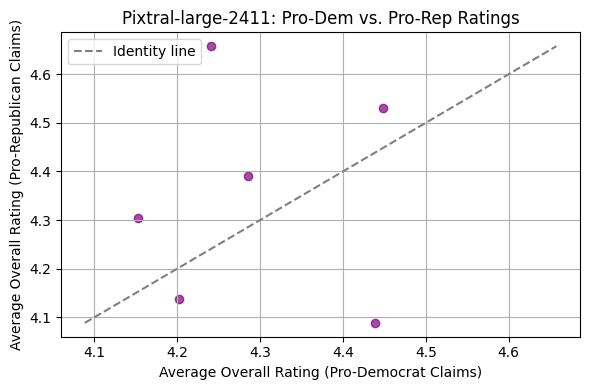


=== Analyzing model: gemini-1.5-pro ===
DEBUG: Claim-level averages (unsorted):
    claim_num  overall_rating
0           1         3.96250
1           2         3.14750
2           3         4.11750
3           4         3.93875
4           5         3.76375
5           6         4.19250
6           7         3.88125
7           8         4.01250
8           9         3.42000
9          10         4.14500
10         11         3.54875
11         12         3.95125
DEBUG: Pro-Democrat claims:
    claim_num  overall_rating
0           1         3.96250
2           3         4.11750
4           5         3.76375
6           7         3.88125
8           9         3.42000
10         11         3.54875
DEBUG: Pro-Republican claims:
    claim_num  overall_rating
1           2         3.14750
3           4         3.93875
5           6         4.19250
7           8         4.01250
9          10         4.14500
11         12         3.95125
Pair 1: Pro-Democrat = 3.962, Pro-Republican = 3.14

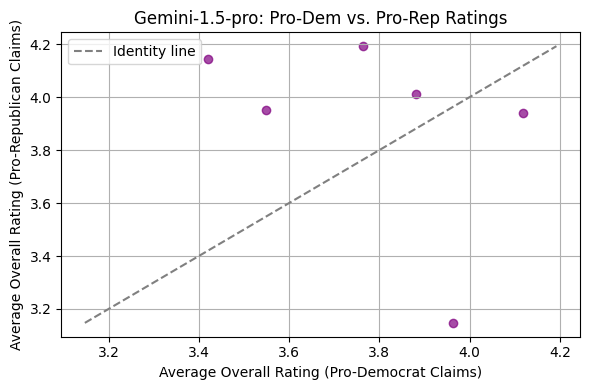


=== Analyzing model: gpt-4o ===
DEBUG: Claim-level averages (unsorted):
    claim_num  overall_rating
0           1         4.29250
1           2         3.82125
2           3         4.21500
3           4         4.12625
4           5         4.23250
5           6         4.44250
6           7         4.48250
7           8         4.32000
8           9         4.15250
9          10         4.74875
10         11         4.30125
11         12         4.23000
DEBUG: Pro-Democrat claims:
    claim_num  overall_rating
0           1         4.29250
2           3         4.21500
4           5         4.23250
6           7         4.48250
8           9         4.15250
10         11         4.30125
DEBUG: Pro-Republican claims:
    claim_num  overall_rating
1           2         3.82125
3           4         4.12625
5           6         4.44250
7           8         4.32000
9          10         4.74875
11         12         4.23000
Pair 1: Pro-Democrat = 4.292, Pro-Republican = 3.821
Pair 2

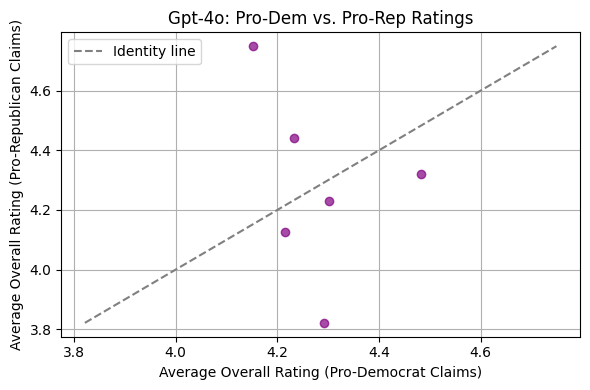


=== Analyzing model: claude-3.5-sonnet ===
DEBUG: Claim-level averages (unsorted):
    claim_num  overall_rating
0           1         4.18000
1           2         3.58375
2           3         3.86375
3           4         4.15625
4           5         3.75000
5           6         4.02750
6           7         4.06875
7           8         3.60125
8           9         3.89125
9          10         4.26750
10         11         3.19000
11         12         4.11750
DEBUG: Pro-Democrat claims:
    claim_num  overall_rating
0           1         4.18000
2           3         3.86375
4           5         3.75000
6           7         4.06875
8           9         3.89125
10         11         3.19000
DEBUG: Pro-Republican claims:
    claim_num  overall_rating
1           2         3.58375
3           4         4.15625
5           6         4.02750
7           8         3.60125
9          10         4.26750
11         12         4.11750
Pair 1: Pro-Democrat = 4.180, Pro-Republican = 3

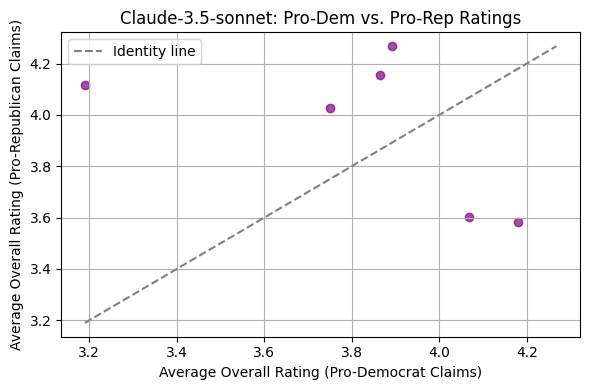

In [46]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

######################################
# Phase 1: Data Loading and Preparation
######################################
data_path = "../plots/2025_02_21_23_04_10.csv"
df = pd.read_csv(data_path)
print("DEBUG: Data loaded. Data shape:", df.shape)

# Convert model names to lowercase for consistency
df['model_name_judge'] = df['model_name_judge'].str.lower()

# Define the five evaluation metrics
metrics = ["coherence", "clarity", "hilarity", "persuasiveness", "template_appropriateness"]

# Convert each metric column from a string like "4/5" to a numeric value (extracting the first part)
for col in metrics:
    df[col] = df[col].str.split('/').str[0].astype(float)

# Compute an overall rating for each evaluation as the average of the 5 metrics.
df['overall_rating'] = df[metrics].mean(axis=1)
print("DEBUG: Overall rating computed. Sample:", df['overall_rating'].head().tolist())

######################################
# Phase 2: Per-Model Aggregation and Pairing by Claim Stance
######################################
# List of AI models to analyze
desired_models = ["pixtral-large-2411", "gemini-1.5-pro", "gpt-4o", "claude-3.5-sonnet"]

for model in desired_models:
    print(f"\n=== Analyzing model: {model} ===")
    # Filter for the current model.
    df_model = df[df['model_name_judge'] == model].copy()
    
    # Convert the "claim_number" column to string type first before extraction.
    df_model['claim_number'] = df_model['claim_number'].astype(str)
    
    # Extract numeric claim number from the "claim_number" column assuming the format "claim 1", "claim 2", etc.
    df_model['claim_num'] = df_model['claim_number'].str.extract(r'(\d+)').astype(int)
    
    # Aggregate overall ratings by claim (average across all evaluations for that claim)
    claim_avgs = df_model.groupby('claim_num')['overall_rating'].mean().reset_index()
    print("DEBUG: Claim-level averages (unsorted):")
    print(claim_avgs)
    
    # Sort by claim number
    claim_avgs = claim_avgs.sort_values('claim_num')
    
    # Separate into two groups: odd claim numbers = pro-democrat, even = pro-republican
    democrat_claims = claim_avgs[claim_avgs['claim_num'] % 2 == 1].copy()
    republican_claims = claim_avgs[claim_avgs['claim_num'] % 2 == 0].copy()
    
    print("DEBUG: Pro-Democrat claims:")
    print(democrat_claims)
    print("DEBUG: Pro-Republican claims:")
    print(republican_claims)
    
    if len(democrat_claims) != len(republican_claims):
        print(f"WARNING: Number of pro-democrat claims ({len(democrat_claims)}) does not match pro-republican claims ({len(republican_claims)}). Skipping model.")
        continue
    
    # Pair the groups in order
    democrat_values = democrat_claims.sort_values('claim_num')['overall_rating'].tolist()
    republican_values = republican_claims.sort_values('claim_num')['overall_rating'].tolist()
    
    # Display paired values for debugging
    for i, (dem_val, rep_val) in enumerate(zip(democrat_values, republican_values), 1):
        print(f"Pair {i}: Pro-Democrat = {dem_val:.3f}, Pro-Republican = {rep_val:.3f}")
    
    # Calculate Pearson correlation between the paired values
    r, p_value = pearsonr(democrat_values, republican_values)
    print(f"Model: {model} - Pearson correlation between pro-Democrat and pro-Republican claim ratings: r = {r:.3f}, p = {p_value:.3f}")
    
    # Optional: Scatter plot for visualization
    plt.figure(figsize=(6, 4))
    plt.scatter(democrat_values, republican_values, color='purple', alpha=0.7)
    plt.xlabel('Average Overall Rating (Pro-Democrat Claims)')
    plt.ylabel('Average Overall Rating (Pro-Republican Claims)')
    plt.title(f'{model.capitalize()}: Pro-Dem vs. Pro-Rep Ratings')
    min_val = min(min(democrat_values), min(republican_values))
    max_val = max(max(democrat_values), max(republican_values))
    plt.plot([min_val, max_val], [min_val, max_val], color='gray', linestyle='--', label="Identity line")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


# Plot average metrics claim stances per model

DEBUG: Data loaded. Data shape: (7680, 20)
DEBUG: Column 'coherence' conversion. Before: ['4/5', '5/5', '4/5', '5/5', '4/5'] | After: [4.0, 5.0, 4.0, 5.0, 4.0]
DEBUG: Column 'clarity' conversion. Before: ['4/5', '5/5', '4/5', '5/5', '4/5'] | After: [4.0, 5.0, 4.0, 5.0, 4.0]
DEBUG: Column 'hilarity' conversion. Before: ['3/5', '4/5', '3/5', '4/5', '3/5'] | After: [3.0, 4.0, 3.0, 4.0, 3.0]
DEBUG: Column 'persuasiveness' conversion. Before: ['4/5', '5/5', '4/5', '5/5', '4/5'] | After: [4.0, 5.0, 4.0, 5.0, 4.0]
DEBUG: Column 'template_appropriateness' conversion. Before: ['4/5', '5/5', '4/5', '5/5', '4/5'] | After: [4.0, 5.0, 4.0, 5.0, 4.0]
DEBUG: Overall rating computed. Sample: [3.8, 4.8, 3.8, 4.8, 3.8]
DEBUG: Claim stance created. Sample:
    claim_number  claim_num          stance
0              1          1    Pro Democrat
160            2          2  Pro Republican
320            3          3    Pro Democrat
480            4          4  Pro Republican
640            5          5    P

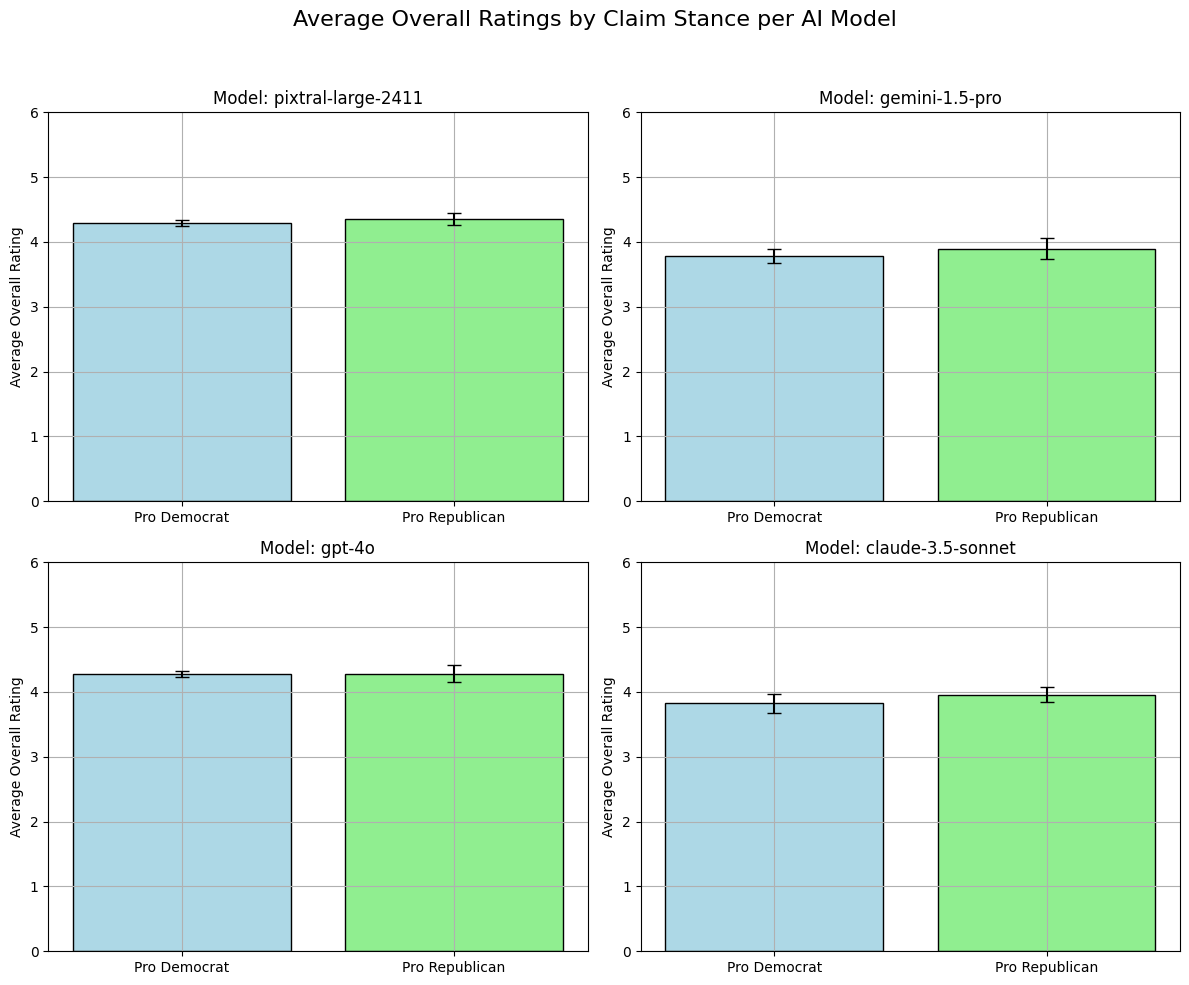

In [48]:
# Import necessary libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Set output directory (ensure it exists) and dataset path
output_dir = "../new_results"
os.makedirs(output_dir, exist_ok=True)

data_path = "../plots/2025_02_21_23_04_10.csv"
df = pd.read_csv(data_path)
print("DEBUG: Data loaded. Data shape:", df.shape)

# Convert model names to lowercase for consistency
df['model_name_judge'] = df['model_name_judge'].str.lower()

# Define the five evaluation metrics and convert from strings like "4/5" to numeric
metrics = ["coherence", "clarity", "hilarity", "persuasiveness", "template_appropriateness"]
for col in metrics:
    sample_before = df[col].head(5).tolist()
    df[col] = df[col].str.split('/').str[0].astype(float)
    sample_after = df[col].head(5).tolist()
    print(f"DEBUG: Column '{col}' conversion. Before: {sample_before} | After: {sample_after}")

# Compute an overall rating for each evaluation as the average of the 5 metrics.
df['overall_rating'] = df[metrics].mean(axis=1)
print("DEBUG: Overall rating computed. Sample:", df['overall_rating'].head().tolist())

# Create a unique claim number and assign political stances
# Convert claim_number to string so that extraction works
df['claim_number'] = df['claim_number'].astype(str)
# Extract numeric claim number (assuming format "claim 1", "claim 2", etc.)
df['claim_num'] = df['claim_number'].str.extract(r'(\d+)').astype(int)
# Create a new column 'stance': odd claim numbers are Pro Democrat, even are Pro Republican.
df['stance'] = np.where(df['claim_num'] % 2 == 1, 'Pro Democrat', 'Pro Republican')
print("DEBUG: Claim stance created. Sample:")
print(df[['claim_number', 'claim_num', 'stance']].drop_duplicates().head(), "\n")

######################################
# Phase 2: Aggregate Overall Ratings by Model and Stance
######################################
desired_models = ["pixtral-large-2411", "gemini-1.5-pro", "gpt-4o", "claude-3.5-sonnet"]

# Set up a subplot grid: here we use a 2x2 arrangement for the 4 models.
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.ravel()

for i, model in enumerate(desired_models):
    print(f"DEBUG: Processing model: {model}")
    df_model = df[df['model_name_judge'] == model].copy()
    
    # Aggregate ratings per claim: average overall_rating for each claim for this model.
    claim_avgs = df_model.groupby('claim_num')['overall_rating'].mean().reset_index()
    print("DEBUG: Claim-level averages (unsorted) for model", model)
    print(claim_avgs)
    
    # Ensure claim_avgs is sorted
    claim_avgs = claim_avgs.sort_values('claim_num')
    # Assign stance based on claim number
    claim_avgs['stance'] = np.where(claim_avgs['claim_num'] % 2 == 1, 'Pro Democrat', 'Pro Republican')
    
    # Aggregate by stance: compute mean overall_rating and standard deviation and count.
    agg_stats = claim_avgs.groupby('stance')['overall_rating'].agg(['mean', 'std', 'count']).reset_index()
    agg_stats['se'] = agg_stats['std'] / np.sqrt(agg_stats['count'])
    print(f"DEBUG: Aggregated stats by stance for model {model}:")
    print(agg_stats, "\n")
    
    # Plot a grouped bar chart for this model
    ax = axes[i]
    bars = ax.bar(agg_stats['stance'], agg_stats['mean'], yerr=agg_stats['se'], capsize=5,
                  color=['lightblue', 'lightgreen'], edgecolor='black')
    ax.set_title(f"Model: {model}")
    ax.set_ylabel("Average Overall Rating")
    ax.set_ylim(0, 6)  # assuming a scale from 1 to 5; adjust if needed
    ax.grid(True)

plt.suptitle("Average Overall Ratings by Claim Stance per AI Model", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Save the plot to the output directory
output_file = os.path.join(output_dir, "avg_ratings_claim_stance_per_model.png")
plt.savefig(output_file)
print(f"DEBUG: Plot saved to {output_file}")
plt.show()

# Corr metic for both stance types

DEBUG: Data loaded. Data shape: (7680, 20)
DEBUG: Column 'coherence' conversion. Before: ['4/5', '5/5', '4/5', '5/5', '4/5'] | After: [4.0, 5.0, 4.0, 5.0, 4.0]
DEBUG: Column 'clarity' conversion. Before: ['4/5', '5/5', '4/5', '5/5', '4/5'] | After: [4.0, 5.0, 4.0, 5.0, 4.0]
DEBUG: Column 'hilarity' conversion. Before: ['3/5', '4/5', '3/5', '4/5', '3/5'] | After: [3.0, 4.0, 3.0, 4.0, 3.0]
DEBUG: Column 'persuasiveness' conversion. Before: ['4/5', '5/5', '4/5', '5/5', '4/5'] | After: [4.0, 5.0, 4.0, 5.0, 4.0]
DEBUG: Column 'template_appropriateness' conversion. Before: ['4/5', '5/5', '4/5', '5/5', '4/5'] | After: [4.0, 5.0, 4.0, 5.0, 4.0]
DEBUG: Claim stance created. Sample:
    claim_number  claim_num          stance
0              1          1    Pro Democrat
160            2          2  Pro Republican
320            3          3    Pro Democrat
480            4          4  Pro Republican
640            5          5    Pro Democrat 


=== Analyzing Model: pixtral-large-2411 ===

DEBUG:

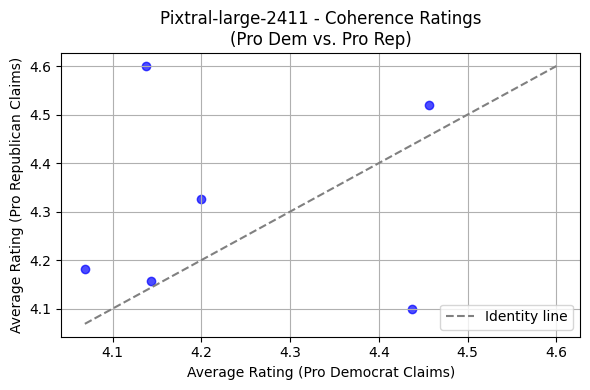


DEBUG: clarity - Aggregated ratings for model pixtral-large-2411
Pro Democrat claims:
    claim_num  clarity
0           1  4.55625
2           3  4.63125
4           5  4.68750
6           7  4.42500
8           9  4.40000
10         11  4.51875
Pro Republican claims:
    claim_num  clarity
1           2  4.43750
3           4  4.68750
5           6  4.79375
7           8  4.60000
9          10  4.56250
11         12  4.86875
Metric: clarity - Pearson correlation (Pro Democrat vs. Pro Republican): r = 0.390, p = 0.445


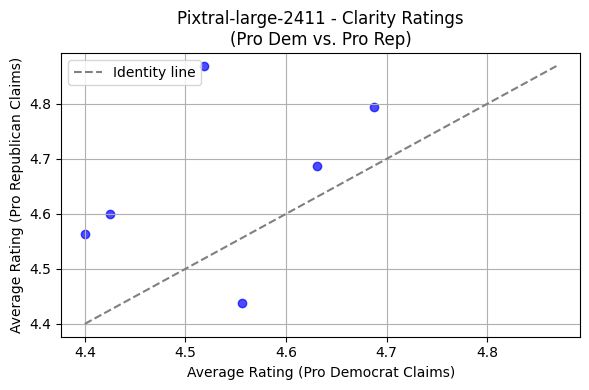


DEBUG: hilarity - Aggregated ratings for model pixtral-large-2411
Pro Democrat claims:
    claim_num  hilarity
0           1   3.94375
2           3   3.58125
4           5   3.93125
6           7   3.80000
8           9   3.86875
10         11   3.88750
Pro Republican claims:
    claim_num  hilarity
1           2   3.51875
3           4   3.78125
5           6   4.15625
7           8   3.36250
9          10   4.05625
11         12   4.35000
Metric: hilarity - Pearson correlation (Pro Democrat vs. Pro Republican): r = 0.237, p = 0.652


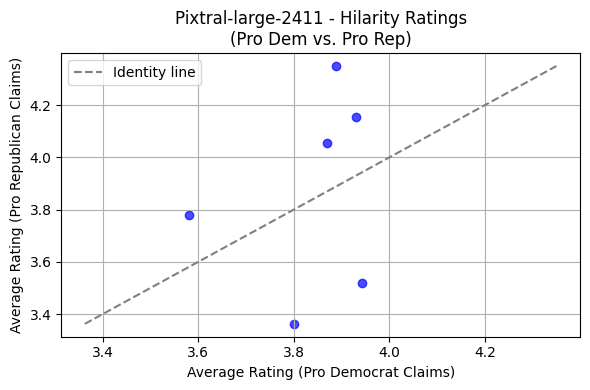


DEBUG: persuasiveness - Aggregated ratings for model pixtral-large-2411
Pro Democrat claims:
    claim_num  persuasiveness
0           1         4.45000
2           3         4.28750
4           5         4.51250
6           7         4.16875
8           9         4.00625
10         11         4.21875
Pro Republican claims:
    claim_num  persuasiveness
1           2         4.12500
3           4         4.43750
5           6         4.51250
7           8         4.31875
9          10         4.22500
11         12         4.71250
Metric: persuasiveness - Pearson correlation (Pro Democrat vs. Pro Republican): r = 0.087, p = 0.870


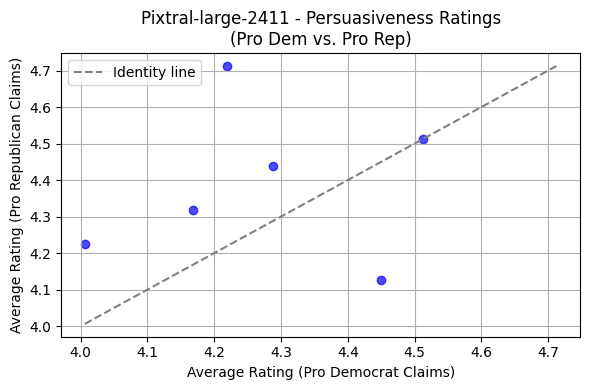


DEBUG: template_appropriateness - Aggregated ratings for model pixtral-large-2411
Pro Democrat claims:
    claim_num  template_appropriateness
0           1                   4.80625
2           3                   4.72500
4           5                   4.65625
6           7                   4.47500
8           9                   4.41875
10         11                   4.44375
Pro Republican claims:
    claim_num  template_appropriateness
1           2                   4.26250
3           4                   4.71875
5           6                   4.66875
7           8                   4.25625
9          10                   4.49375
11         12                   4.75625
Metric: template_appropriateness - Pearson correlation (Pro Democrat vs. Pro Republican): r = -0.101, p = 0.849


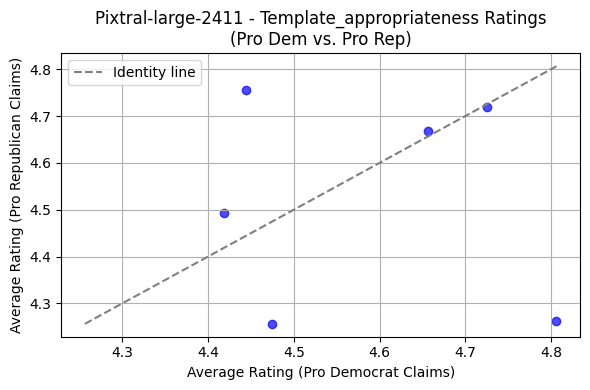


=== Analyzing Model: gemini-1.5-pro ===

DEBUG: coherence - Aggregated ratings for model gemini-1.5-pro
Pro Democrat claims:
    claim_num  coherence
0           1    4.00625
2           3    4.00625
4           5    4.00000
6           7    4.00000
8           9    3.52500
10         11    3.89375
Pro Republican claims:
    claim_num  coherence
1           2    3.33125
3           4    4.03750
5           6    4.30625
7           8    4.00000
9          10    4.21875
11         12    4.12500
Metric: coherence - Pearson correlation (Pro Democrat vs. Pro Republican): r = -0.358, p = 0.485


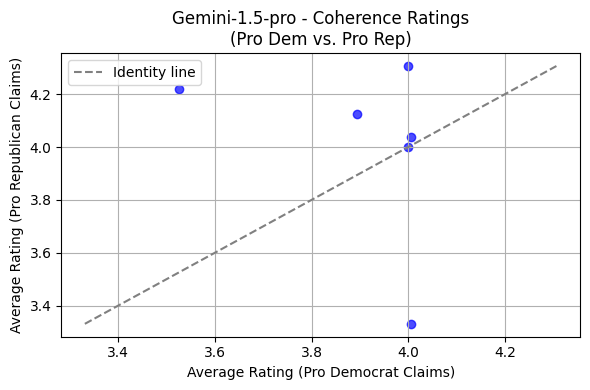


DEBUG: clarity - Aggregated ratings for model gemini-1.5-pro
Pro Democrat claims:
    claim_num  clarity
0           1  4.01250
2           3  4.50625
4           5  4.41875
6           7  4.00000
8           9  3.63125
10         11  4.02500
Pro Republican claims:
    claim_num  clarity
1           2  3.93125
3           4  4.18750
5           6  4.77500
7           8  4.41875
9          10  4.36875
11         12  4.12500
Metric: clarity - Pearson correlation (Pro Democrat vs. Pro Republican): r = 0.230, p = 0.661


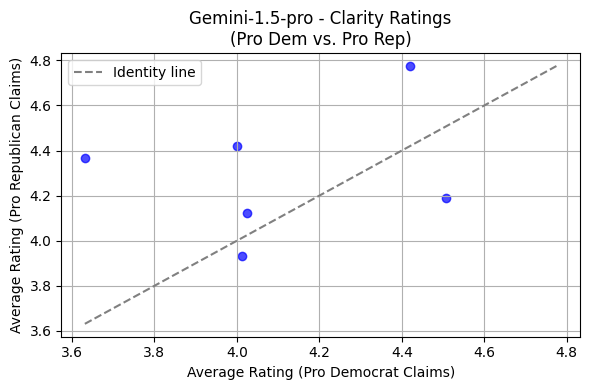


DEBUG: hilarity - Aggregated ratings for model gemini-1.5-pro
Pro Democrat claims:
    claim_num  hilarity
0           1   3.65000
2           3   3.60625
4           5   3.24375
6           7   3.74375
8           9   3.09375
10         11   3.10625
Pro Republican claims:
    claim_num  hilarity
1           2   2.72500
3           4   3.70625
5           6   3.72500
7           8   3.65000
9          10   4.00000
11         12   4.00000
Metric: hilarity - Pearson correlation (Pro Democrat vs. Pro Republican): r = -0.640, p = 0.171


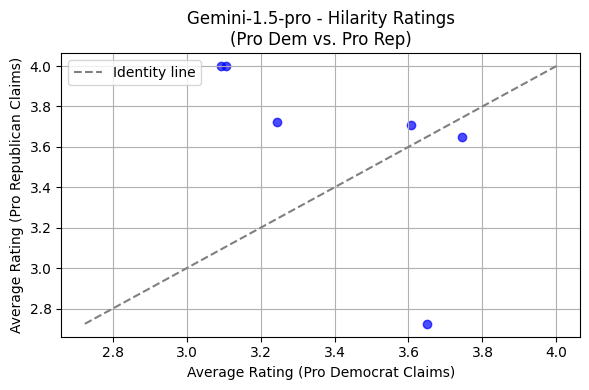


DEBUG: persuasiveness - Aggregated ratings for model gemini-1.5-pro
Pro Democrat claims:
    claim_num  persuasiveness
0           1         3.98750
2           3         3.90625
4           5         3.40000
6           7         3.56875
8           9         3.22500
10         11         3.03125
Pro Republican claims:
    claim_num  persuasiveness
1           2         2.68125
3           4         3.70000
5           6         3.78750
7           8         3.73750
9          10         3.91875
11         12         3.38125
Metric: persuasiveness - Pearson correlation (Pro Democrat vs. Pro Republican): r = -0.460, p = 0.359


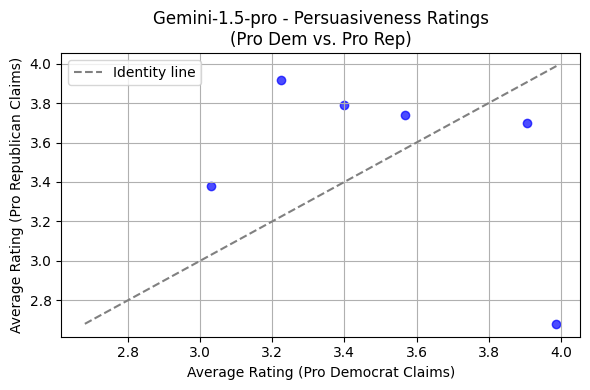


DEBUG: template_appropriateness - Aggregated ratings for model gemini-1.5-pro
Pro Democrat claims:
    claim_num  template_appropriateness
0           1                   4.15625
2           3                   4.56250
4           5                   3.75625
6           7                   4.09375
8           9                   3.62500
10         11                   3.68750
Pro Republican claims:
    claim_num  template_appropriateness
1           2                   3.06875
3           4                   4.06250
5           6                   4.36875
7           8                   4.25625
9          10                   4.21875
11         12                   4.12500
Metric: template_appropriateness - Pearson correlation (Pro Democrat vs. Pro Republican): r = -0.345, p = 0.503


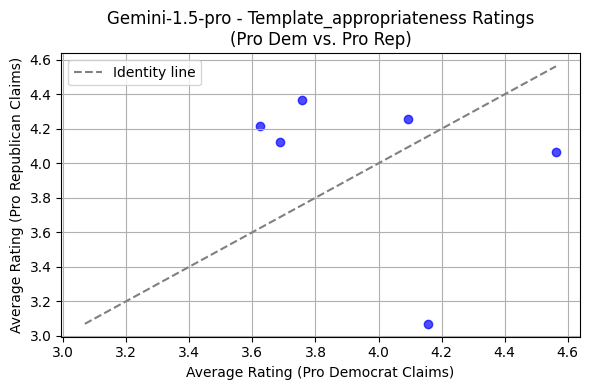


=== Analyzing Model: gpt-4o ===

DEBUG: coherence - Aggregated ratings for model gpt-4o
Pro Democrat claims:
    claim_num  coherence
0           1    4.36875
2           3    4.27500
4           5    4.36875
6           7    4.58125
8           9    4.26875
10         11    4.29375
Pro Republican claims:
    claim_num  coherence
1           2    3.96875
3           4    4.21250
5           6    4.56250
7           8    4.45000
9          10    4.87500
11         12    4.33750
Metric: coherence - Pearson correlation (Pro Democrat vs. Pro Republican): r = -0.080, p = 0.880


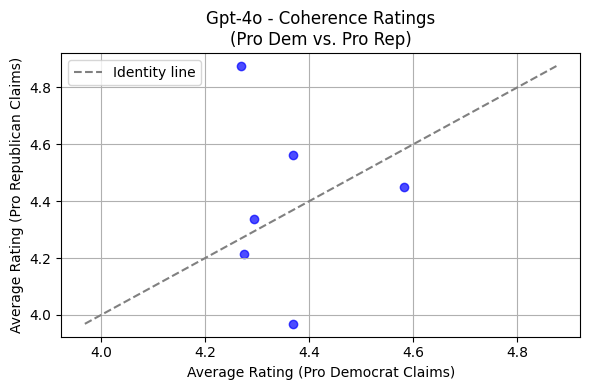


DEBUG: clarity - Aggregated ratings for model gpt-4o
Pro Democrat claims:
    claim_num  clarity
0           1  4.34375
2           3  4.36250
4           5  4.50625
6           7  4.67500
8           9  4.28750
10         11  4.51875
Pro Republican claims:
    claim_num  clarity
1           2  4.06250
3           4  4.26250
5           6  4.63125
7           8  4.60625
9          10  4.93750
11         12  4.38125
Metric: clarity - Pearson correlation (Pro Democrat vs. Pro Republican): r = 0.086, p = 0.871


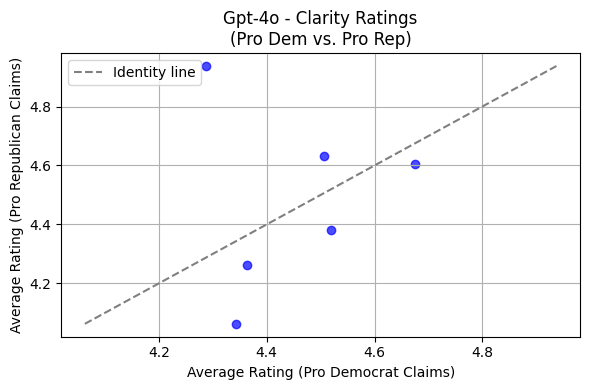


DEBUG: hilarity - Aggregated ratings for model gpt-4o
Pro Democrat claims:
    claim_num  hilarity
0           1   3.75000
2           3   3.38750
4           5   3.36250
6           7   3.77500
8           9   3.34375
10         11   3.51250
Pro Republican claims:
    claim_num  hilarity
1           2   3.28750
3           4   3.53750
5           6   3.78750
7           8   3.60000
9          10   4.03125
11         12   3.80625
Metric: hilarity - Pearson correlation (Pro Democrat vs. Pro Republican): r = -0.681, p = 0.136


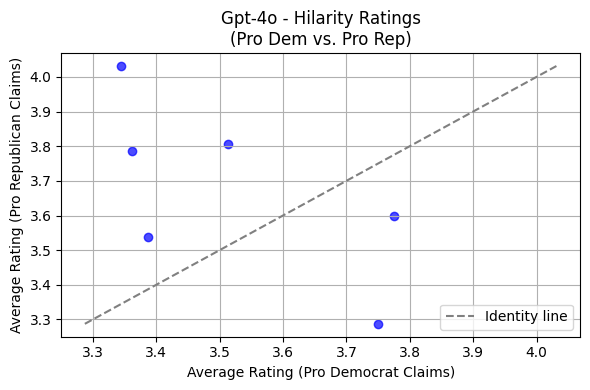


DEBUG: persuasiveness - Aggregated ratings for model gpt-4o
Pro Democrat claims:
    claim_num  persuasiveness
0           1         4.15000
2           3         4.13750
4           5         4.26875
6           7         4.56875
8           9         4.09375
10         11         4.32500
Pro Republican claims:
    claim_num  persuasiveness
1           2         3.46250
3           4         3.98750
5           6         4.43750
7           8         4.37500
9          10         4.90000
11         12         4.08125
Metric: persuasiveness - Pearson correlation (Pro Democrat vs. Pro Republican): r = 0.092, p = 0.862


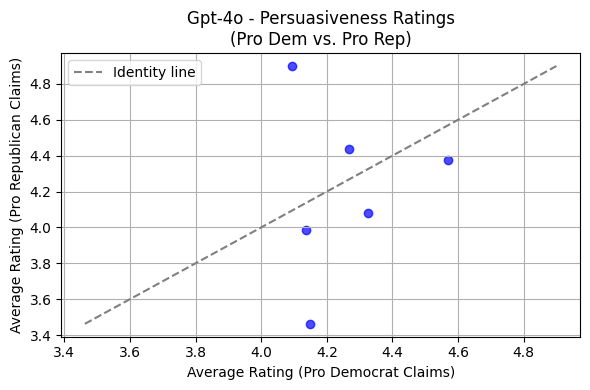


DEBUG: template_appropriateness - Aggregated ratings for model gpt-4o
Pro Democrat claims:
    claim_num  template_appropriateness
0           1                   4.85000
2           3                   4.91250
4           5                   4.65625
6           7                   4.81250
8           9                   4.76875
10         11                   4.85625
Pro Republican claims:
    claim_num  template_appropriateness
1           2                   4.32500
3           4                   4.63125
5           6                   4.79375
7           8                   4.56875
9          10                   5.00000
11         12                   4.54375
Metric: template_appropriateness - Pearson correlation (Pro Democrat vs. Pro Republican): r = -0.551, p = 0.257


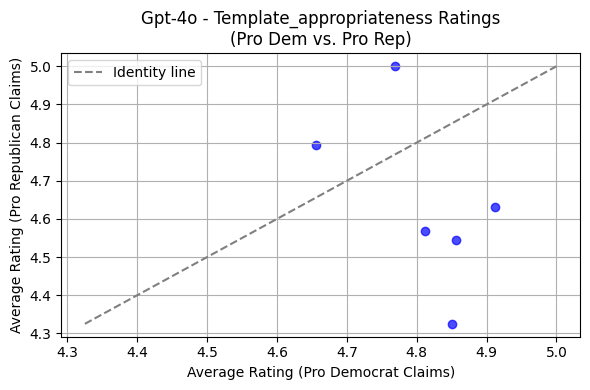


=== Analyzing Model: claude-3.5-sonnet ===

DEBUG: coherence - Aggregated ratings for model claude-3.5-sonnet
Pro Democrat claims:
    claim_num  coherence
0           1    4.38125
2           3    4.00000
4           5    3.93750
6           7    4.11875
8           9    4.00000
10         11    3.55625
Pro Republican claims:
    claim_num  coherence
1           2    3.75625
3           4    4.25625
5           6    4.01875
7           8    3.80625
9          10    4.17500
11         12    4.15000
Metric: coherence - Pearson correlation (Pro Democrat vs. Pro Republican): r = -0.664, p = 0.150


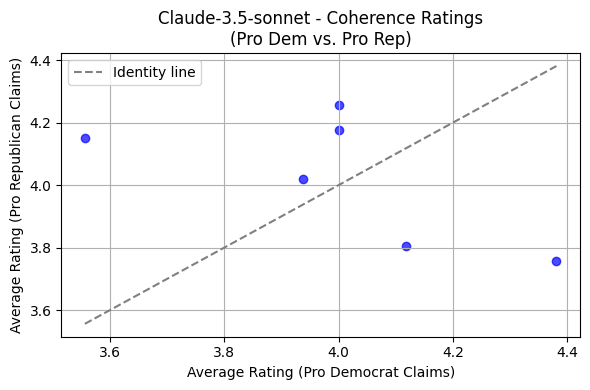


DEBUG: clarity - Aggregated ratings for model claude-3.5-sonnet
Pro Democrat claims:
    claim_num  clarity
0           1  4.38125
2           3  4.00000
4           5  4.03125
6           7  4.11875
8           9  4.00000
10         11  3.56250
Pro Republican claims:
    claim_num  clarity
1           2  3.75625
3           4  4.26875
5           6  4.13125
7           8  3.75000
9          10  4.63125
11         12  4.15000
Metric: clarity - Pearson correlation (Pro Democrat vs. Pro Republican): r = -0.443, p = 0.380


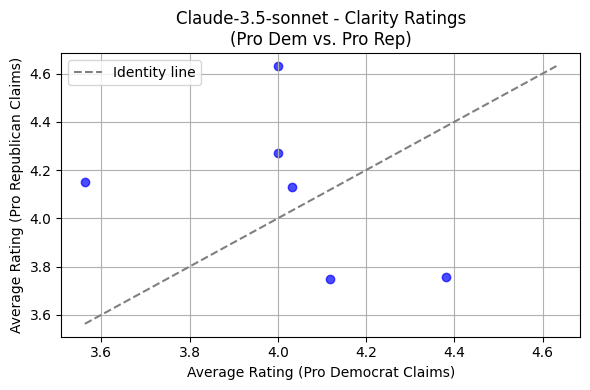


DEBUG: hilarity - Aggregated ratings for model claude-3.5-sonnet
Pro Democrat claims:
    claim_num  hilarity
0           1   3.46875
2           3   3.11875
4           5   3.09375
6           7   3.50625
8           9   3.42500
10         11   2.72500
Pro Republican claims:
    claim_num  hilarity
1           2   3.01875
3           4   3.55625
5           6   3.59375
7           8   2.95000
9          10   4.00000
11         12   3.76250
Metric: hilarity - Pearson correlation (Pro Democrat vs. Pro Republican): r = -0.512, p = 0.299


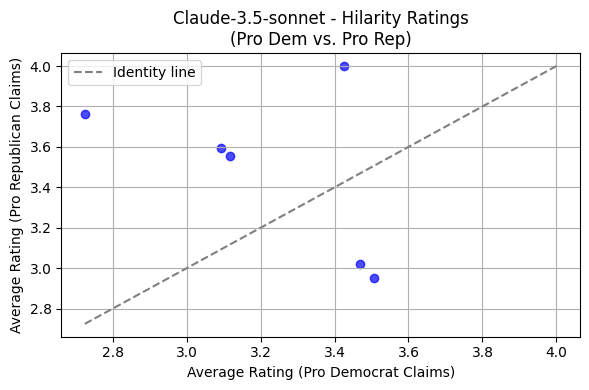


DEBUG: persuasiveness - Aggregated ratings for model claude-3.5-sonnet
Pro Democrat claims:
    claim_num  persuasiveness
0           1         4.15625
2           3         4.00000
4           5         3.81250
6           7         4.11875
8           9         4.00000
10         11         2.83750
Pro Republican claims:
    claim_num  persuasiveness
1           2         3.50625
3           4         4.15625
5           6         3.91250
7           8         3.62500
9          10         4.12500
11         12         3.89375
Metric: persuasiveness - Pearson correlation (Pro Democrat vs. Pro Republican): r = -0.188, p = 0.722


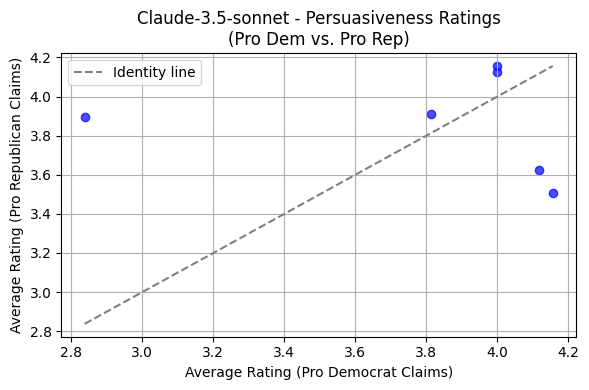


DEBUG: template_appropriateness - Aggregated ratings for model claude-3.5-sonnet
Pro Democrat claims:
    claim_num  template_appropriateness
0           1                   4.51250
2           3                   4.20000
4           5                   3.87500
6           7                   4.48125
8           9                   4.03125
10         11                   3.26875
Pro Republican claims:
    claim_num  template_appropriateness
1           2                   3.88125
3           4                   4.54375
5           6                   4.48125
7           8                   3.87500
9          10                   4.40625
11         12                   4.63125
Metric: template_appropriateness - Pearson correlation (Pro Democrat vs. Pro Republican): r = -0.814, p = 0.049


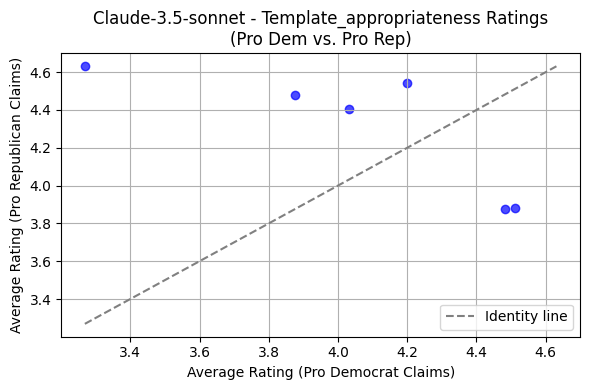

In [49]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

######################################
# Phase 1: Load and Prepare Data
######################################
data_path = "../plots/2025_02_21_23_04_10.csv"
df = pd.read_csv(data_path)
print("DEBUG: Data loaded. Data shape:", df.shape)

# Convert model names to lowercase for consistency
df['model_name_judge'] = df['model_name_judge'].str.lower()

# Define the five evaluation metrics and convert from strings like "4/5" to numeric values
metrics = ["coherence", "clarity", "hilarity", "persuasiveness", "template_appropriateness"]
for col in metrics:
    sample_before = df[col].head(5).tolist()
    df[col] = df[col].str.split('/').str[0].astype(float)
    sample_after = df[col].head(5).tolist()
    print(f"DEBUG: Column '{col}' conversion. Before: {sample_before} | After: {sample_after}")

# Compute an overall rating (if desired) as the average of the 5 metrics.
# df['overall_rating'] = df[metrics].mean(axis=1)

# Convert "claim_number" to string type (if not already) and extract numeric part.
df['claim_number'] = df['claim_number'].astype(str)
df['claim_num'] = df['claim_number'].str.extract(r'(\d+)').astype(int)

# Create a new column 'stance': odd claim numbers = Pro Democrat; even = Pro Republican.
df['stance'] = np.where(df['claim_num'] % 2 == 1, 'Pro Democrat', 'Pro Republican')
print("DEBUG: Claim stance created. Sample:")
print(df[['claim_number', 'claim_num', 'stance']].drop_duplicates().head(), "\n")

######################################
# Phase 2: Aggregate Ratings and Compute Per-Metric Correlations
######################################
# List of AI models to analyze
desired_models = ["pixtral-large-2411", "gemini-1.5-pro", "gpt-4o", "claude-3.5-sonnet"]

# Process each model separately.
for model in desired_models:
    print(f"\n=== Analyzing Model: {model} ===")
    df_model = df[df['model_name_judge'] == model].copy()
    
    # For each metric, aggregate ratings by claim (average over the 20 evaluations for a given claim).
    for metric in metrics:
        # Compute the average rating for each claim for the given metric.
        claim_avgs = df_model.groupby('claim_num')[metric].mean().reset_index()
        # Sort by claim number
        claim_avgs = claim_avgs.sort_values('claim_num')
        
        # Separate the averaged ratings by stance.
        pro_dem = claim_avgs[claim_avgs['claim_num'] % 2 == 1]
        pro_rep = claim_avgs[claim_avgs['claim_num'] % 2 == 0]
        
        # Debug: show the aggregated ratings
        print(f"\nDEBUG: {metric} - Aggregated ratings for model {model}")
        print("Pro Democrat claims:")
        print(pro_dem)
        print("Pro Republican claims:")
        print(pro_rep)
        
        # Check that both groups have the same number of claims
        if len(pro_dem) != len(pro_rep):
            print(f"WARNING: For model {model} and metric {metric}: number of pro-democrat claims ({len(pro_dem)})"
                  f" does not equal number of pro-republican claims ({len(pro_rep)}). Skipping this metric.")
            continue
        
        # Pair the ratings: sort by claim number and convert to lists.
        dem_ratings = pro_dem.sort_values('claim_num')[metric].tolist()
        rep_ratings = pro_rep.sort_values('claim_num')[metric].tolist()
        
        # Compute Pearson correlation for the paired data.
        r, p_val = pearsonr(dem_ratings, rep_ratings)
        print(f"Metric: {metric} - Pearson correlation (Pro Democrat vs. Pro Republican): r = {r:.3f}, p = {p_val:.3f}")
        
        # Plot a scatter plot for visualization.
        plt.figure(figsize=(6, 4))
        plt.scatter(dem_ratings, rep_ratings, color='blue', alpha=0.7)
        plt.xlabel('Average Rating (Pro Democrat Claims)')
        plt.ylabel('Average Rating (Pro Republican Claims)')
        plt.title(f'{model.capitalize()} - {metric.capitalize()} Ratings\n(Pro Dem vs. Pro Rep)')
        # Plot an identity line for reference:
        min_val = min(min(dem_ratings), min(rep_ratings))
        max_val = max(max(dem_ratings), max(rep_ratings))
        plt.plot([min_val, max_val], [min_val, max_val], color='gray', linestyle='--', label='Identity line')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()


# Corr self reported confidence claim stances

DEBUG: Data loaded. Data shape: (7680, 20)
DEBUG: Sample 'self_reported_confidence' before conversion: ['85%', '95%', '85%', '95%', '85%']
DEBUG: Sample 'self_reported_confidence' after conversion: [85.0, 95.0, 85.0, 95.0, 85.0] 

DEBUG: Claim stance created. Sample:
    claim_number  claim_num          stance  stance_num
0              1          1    Pro Democrat           0
160            2          2  Pro Republican           1
320            3          3    Pro Democrat           0
480            4          4  Pro Republican           1
640            5          5    Pro Democrat           0 


=== Analyzing model: pixtral-large-2411 ===
DEBUG: Data shape for model 'pixtral-large-2411' after dropping missing values: (1920, 23)
Pearson correlation between self-reported confidence and claim stance for pixtral-large-2411:
  r = 0.038, p = 0.09587843950925141467


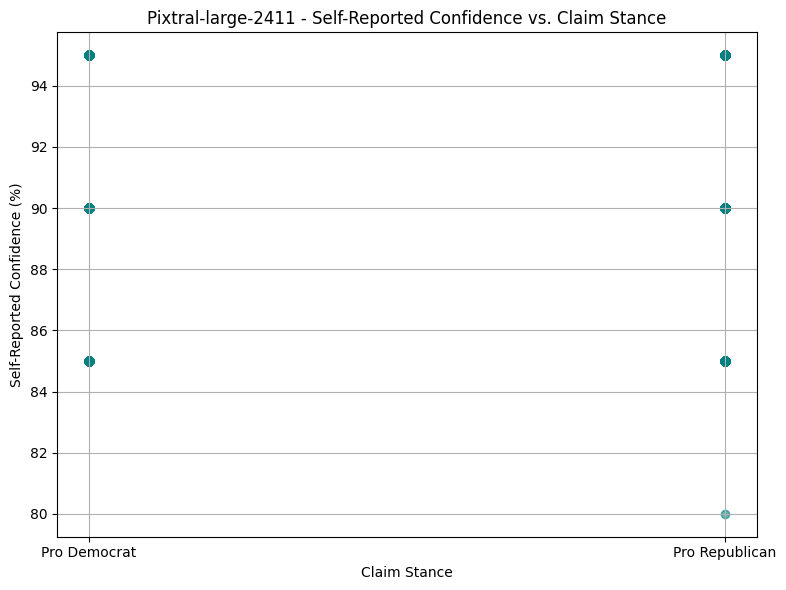


=== Analyzing model: gemini-1.5-pro ===
DEBUG: Data shape for model 'gemini-1.5-pro' after dropping missing values: (1920, 23)
Pearson correlation between self-reported confidence and claim stance for gemini-1.5-pro:
  r = 0.162, p = 0.00000000000100021073


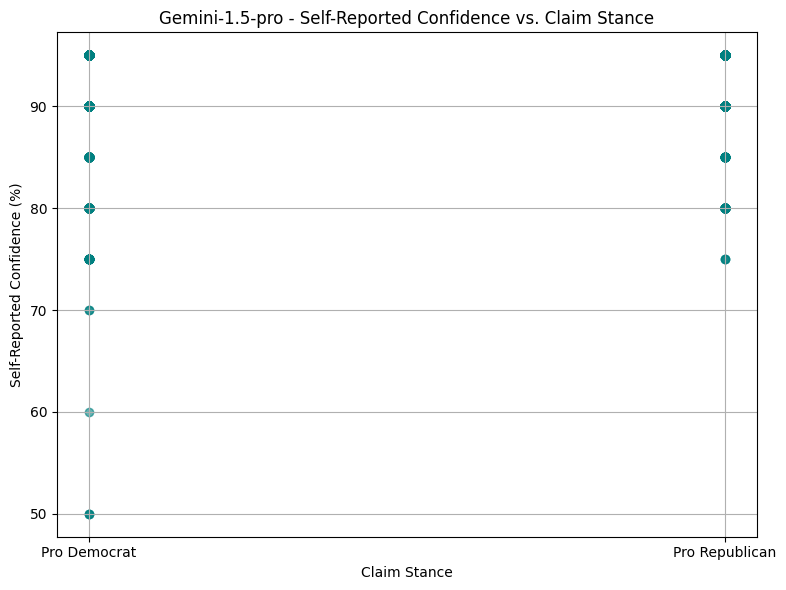


=== Analyzing model: gpt-4o ===
DEBUG: Data shape for model 'gpt-4o' after dropping missing values: (1920, 23)
Pearson correlation between self-reported confidence and claim stance for gpt-4o:
  r = 0.011, p = 0.61749015185848177278


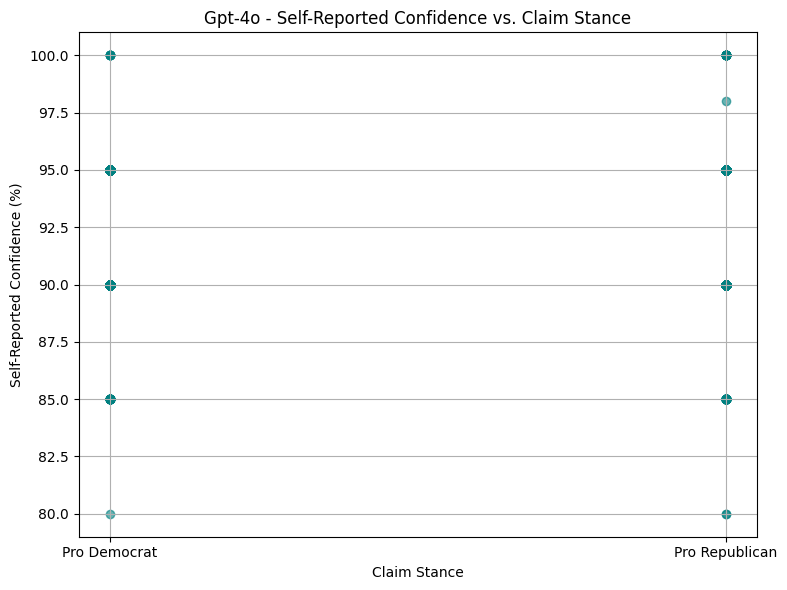


=== Analyzing model: claude-3.5-sonnet ===
DEBUG: Data shape for model 'claude-3.5-sonnet' after dropping missing values: (1920, 23)
Pearson correlation between self-reported confidence and claim stance for claude-3.5-sonnet:
  r = 0.239, p = 0.00000000000000000000


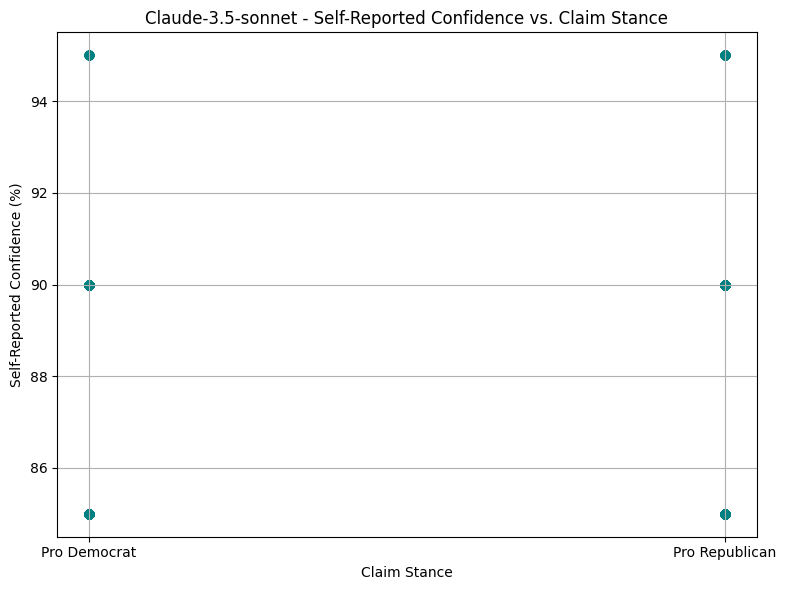

In [56]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

######################################
# Phase 1: Data Loading and Basic Preparation
######################################
data_path = "../plots/2025_02_21_23_04_10.csv"
df = pd.read_csv(data_path)
print("DEBUG: Data loaded. Data shape:", df.shape)

# Convert model names to lowercase for consistency
df['model_name_judge'] = df['model_name_judge'].str.lower()

# Convert self_reported_confidence from percentage string (e.g., "85%") to numeric (e.g., 85.0)
print("DEBUG: Sample 'self_reported_confidence' before conversion:", df['self_reported_confidence'].head().tolist())
df['self_reported_confidence'] = df['self_reported_confidence'].str.strip('%').astype(float)
print("DEBUG: Sample 'self_reported_confidence' after conversion:", df['self_reported_confidence'].head().tolist(), "\n")

# Ensure the claim_number column is a string, then extract its numeric part and create a new column 'claim_num'
df['claim_number'] = df['claim_number'].astype(str)
df['claim_num'] = df['claim_number'].str.extract(r'(\d+)').astype(int)

# Create a new column 'stance' such that odd claim numbers are "Pro Democrat" and even claim numbers "Pro Republican"
df['stance'] = np.where(df['claim_num'] % 2 == 1, 'Pro Democrat', 'Pro Republican')
# Recode stance to a numeric variable for correlation (e.g., 0 for Pro Democrat, 1 for Pro Republican)
df['stance_num'] = np.where(df['stance'] == 'Pro Democrat', 0, 1)

print("DEBUG: Claim stance created. Sample:")
print(df[['claim_number', 'claim_num', 'stance', 'stance_num']].drop_duplicates().head(), "\n")

######################################
# Phase 2: Separate Analysis by Model
######################################
desired_models = ["pixtral-large-2411", "gemini-1.5-pro", "gpt-4o", "claude-3.5-sonnet"]

for model in desired_models:
    print(f"\n=== Analyzing model: {model} ===")
    
    # Filter for the current model's evaluations
    df_model = df[df['model_name_judge'] == model].copy()
    
    # Drop rows with missing values in self_reported_confidence or stance_num
    df_model = df_model.dropna(subset=['self_reported_confidence', 'stance_num'])
    print(f"DEBUG: Data shape for model '{model}' after dropping missing values:", df_model.shape)
    
    # Compute Pearson (point-biserial) correlation
    r, p_value = pearsonr(df_model['self_reported_confidence'], df_model['stance_num'])
    print(f"Pearson correlation between self-reported confidence and claim stance for {model}:")
    print(f"  r = {r:.3f}, p = {p_value:.20f}")
    
    # Create scatter plot for visualization
    plt.figure(figsize=(8,6))
    plt.scatter(df_model['stance_num'], df_model['self_reported_confidence'], alpha=0.6, color='teal')
    plt.xticks([0, 1], ["Pro Democrat", "Pro Republican"])
    plt.xlabel("Claim Stance")
    plt.ylabel("Self-Reported Confidence (%)")
    plt.title(f"{model.capitalize()} - Self-Reported Confidence vs. Claim Stance")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


# Plot self reported confidence claim stance for all models

DEBUG: Data loaded. Data shape: (7680, 20)
DEBUG: Sample self_reported_confidence after conversion: [85.0, 95.0, 85.0, 95.0, 85.0]
DEBUG: Claim stances (sample):
    claim_number  claim_num          stance
0              1          1    Pro Democrat
160            2          2  Pro Republican
320            3          3    Pro Democrat
480            4          4  Pro Republican
640            5          5    Pro Democrat 

DEBUG: Processing model: pixtral-large-2411
DEBUG: Claim-level averages for model pixtral-large-2411:
   claim_num  self_reported_confidence          stance
0          1                  91.34375    Pro Democrat
1          2                  88.96875  Pro Republican
2          3                  90.81250    Pro Democrat
3          4                  90.75000  Pro Republican
4          5                  91.75000    Pro Democrat 

DEBUG: Aggregated stats by stance for model pixtral-large-2411:
           stance       mean       std  count        se
0    Pro Democrat 

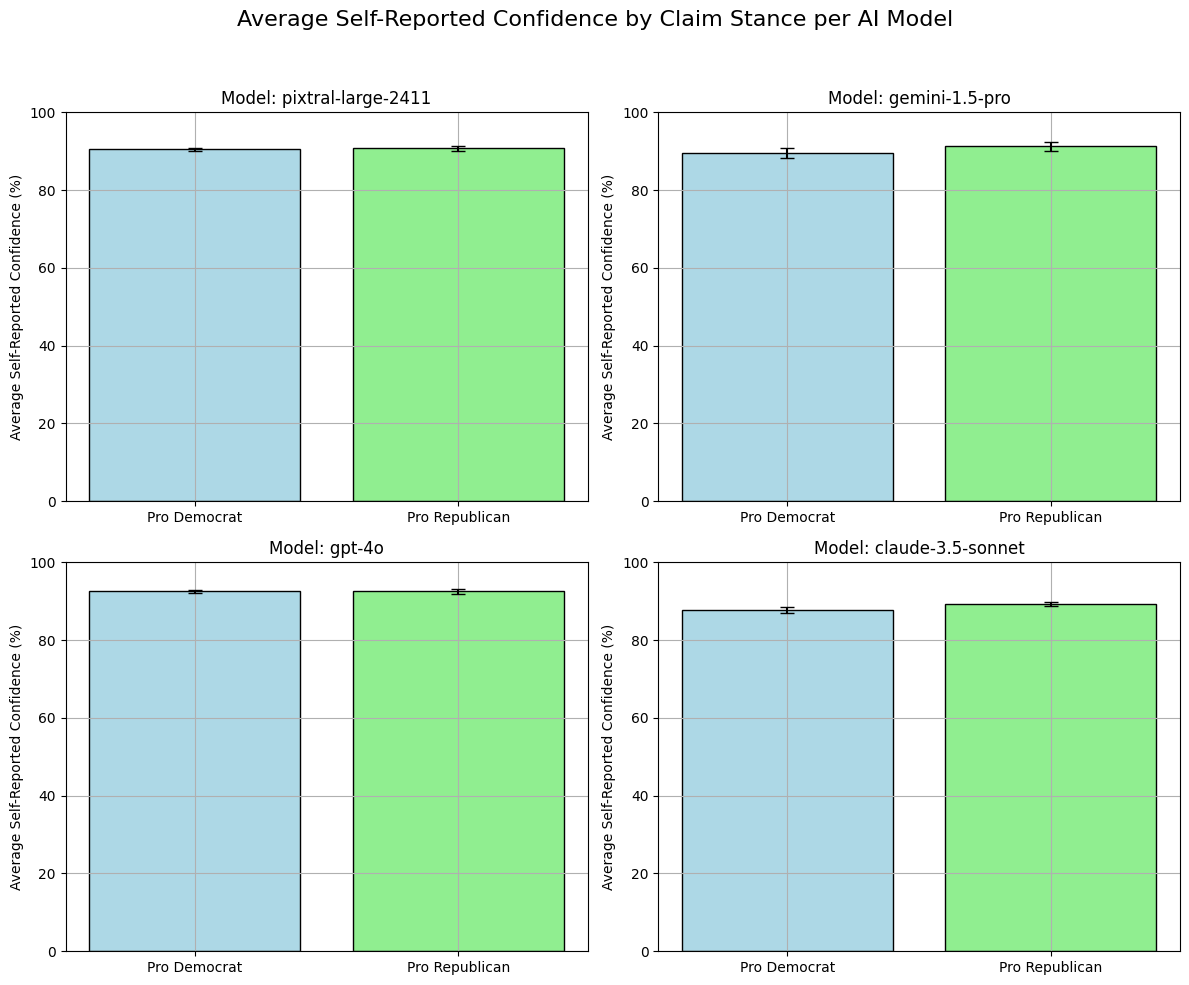

In [53]:
# Import necessary libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

######################################
# Phase 1: Data Loading and Preparation
######################################
data_path = "../plots/2025_02_21_23_04_10.csv"
df = pd.read_csv(data_path)
print("DEBUG: Data loaded. Data shape:", df.shape)

# Convert model names to lowercase for consistency
df['model_name_judge'] = df['model_name_judge'].str.lower()

# Convert self_reported_confidence from a string like "85%" to numeric (e.g., 85.0)
df['self_reported_confidence'] = df['self_reported_confidence'].str.strip('%').astype(float)
print("DEBUG: Sample self_reported_confidence after conversion:",
      df['self_reported_confidence'].head().tolist())

# Ensure "claim_number" is a string so we can extract the numeric portion
df['claim_number'] = df['claim_number'].astype(str)
# Extract numeric claim number from "claim_number" (assuming format "claim 1", "claim 2", etc.)
df['claim_num'] = df['claim_number'].str.extract(r'(\d+)').astype(int)

# Create a new column "stance": odd claim number → "Pro Democrat", even → "Pro Republican"
df['stance'] = np.where(df['claim_num'] % 2 == 1, 'Pro Democrat', 'Pro Republican')

# Debug: Print sample unique claims with stances
print("DEBUG: Claim stances (sample):")
print(df[['claim_number', 'claim_num', 'stance']].drop_duplicates().head(), "\n")

######################################
# Phase 2: Aggregate Self-Reported Confidence by Claim for Each Model
######################################
# Each model rates each meme 20 times. We compute one average self_reported_confidence per claim per model.
# We'll then group by stance to calculate mean and standard error for each stance.
desired_models = ["pixtral-large-2411", "gemini-1.5-pro", "gpt-4o", "claude-3.5-sonnet"]

# Prepare a subplot grid (2x2) for the 4 models.
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.ravel()  # Flatten the 2D grid into a 1D list

for i, model in enumerate(desired_models):
    print(f"DEBUG: Processing model: {model}")
    # Filter the data for the current model
    df_model = df[df['model_name_judge'] == model].copy()
    
    # Aggregate self_reported_confidence per claim (average 20 evaluations)
    claim_avgs = df_model.groupby('claim_num')['self_reported_confidence'].mean().reset_index()
    # Merge with stance information (which is determined by claim_num)
    claim_avgs['stance'] = np.where(claim_avgs['claim_num'] % 2 == 1, 'Pro Democrat', 'Pro Republican')
    
    print(f"DEBUG: Claim-level averages for model {model}:")
    print(claim_avgs.head(), "\n")
    
    # Compute aggregated statistics for each stance: mean, standard deviation, count, and standard error.
    agg_stats = claim_avgs.groupby('stance')['self_reported_confidence'].agg(['mean', 'std', 'count']).reset_index()
    agg_stats['se'] = agg_stats['std'] / np.sqrt(agg_stats['count'])
    print(f"DEBUG: Aggregated stats by stance for model {model}:")
    print(agg_stats, "\n")
    
    # Plot a grouped bar chart for this model on a subplot.
    ax = axes[i]
    bars = ax.bar(agg_stats['stance'], agg_stats['mean'], yerr=agg_stats['se'], capsize=5,
                  color=['lightblue', 'lightgreen'], edgecolor='black')
    ax.set_title(f"Model: {model}")
    ax.set_ylabel("Average Self-Reported Confidence (%)")
    ax.set_ylim(0, 100)  # Assuming confidence is expressed in percentages (0 to 100)
    ax.grid(True)

plt.suptitle("Average Self-Reported Confidence by Claim Stance per AI Model", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Save the plot to the output directory
output_dir = "../new_results"
os.makedirs(output_dir, exist_ok=True)
output_file = os.path.join(output_dir, "self_reported_confidence_by_claim_stance_per_model.png")
plt.savefig(output_file)
print(f"DEBUG: Plot saved to {output_file}")
plt.show()


# Correlation true confidence claim stances

DEBUG: Data loaded. Data shape: (7680, 20)
DEBUG: Data shape after filtering for GPT-4o: (1920, 20)
DEBUG: Sample 'real_confidence' before conversion: ['90.08%', '91.36%', '92.88%', '90.93%', '91.44%']
DEBUG: Sample 'real_confidence' after conversion: [90.08, 91.36, 92.88, 90.93, 91.44] 

DEBUG: Claim stance assignment complete. Sample:
     claim_number  claim_num          stance
3840            1          1    Pro Democrat
4000            2          2  Pro Republican
4160            3          3    Pro Democrat
4320            4          4  Pro Republican
4480            5          5    Pro Democrat 

DEBUG: Aggregated true confidence by claim (unsorted):
   claim_num  real_confidence
0          1        82.882812
1          2        74.321063
2          3        79.724187
3          4        78.429437
4          5        75.134062 

DEBUG: Aggregated true confidence for Pro Democrat claims:
    claim_num  real_confidence
0           1        82.882812
2           3        79.724187


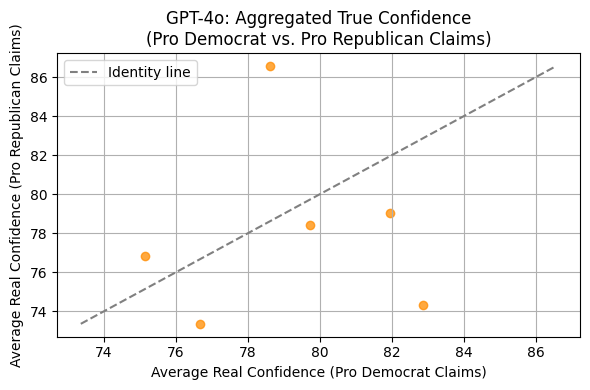

In [54]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

######################################
# Phase 1: Data Loading and Preparation
######################################
data_path = "../plots/2025_02_21_23_04_10.csv"
df = pd.read_csv(data_path)
print("DEBUG: Data loaded. Data shape:", df.shape)

# Convert model names to lowercase
df['model_name_judge'] = df['model_name_judge'].str.lower()

# Filter the DataFrame to only include GPT-4o evaluations
df_gpt4o = df[df['model_name_judge'] == 'gpt-4o'].copy()
print("DEBUG: Data shape after filtering for GPT-4o:", df_gpt4o.shape)

# Convert real_confidence from strings (e.g., "85%") to numeric (e.g., 85.0)
print("DEBUG: Sample 'real_confidence' before conversion:", df_gpt4o['real_confidence'].head().tolist())
df_gpt4o['real_confidence'] = df_gpt4o['real_confidence'].str.strip('%').astype(float)
print("DEBUG: Sample 'real_confidence' after conversion:", df_gpt4o['real_confidence'].head().tolist(), "\n")

# Ensure "claim_number" is a string so we can extract the numeric part
df_gpt4o['claim_number'] = df_gpt4o['claim_number'].astype(str)
# Extract numeric claim number from "claim_number" (assuming format "claim 1", "claim 2", etc.)
df_gpt4o['claim_num'] = df_gpt4o['claim_number'].str.extract(r'(\d+)').astype(int)
# Create a new column "stance": odd claim_num → "Pro Democrat", even → "Pro Republican"
df_gpt4o['stance'] = np.where(df_gpt4o['claim_num'] % 2 == 1, 'Pro Democrat', 'Pro Republican')

print("DEBUG: Claim stance assignment complete. Sample:")
print(df_gpt4o[['claim_number', 'claim_num', 'stance']].drop_duplicates().head(), "\n")

######################################
# Phase 2: Aggregate True Confidence by Claim
######################################
# For GPT-4o, each claim is evaluated 20 times.
# We aggregate (average) the real confidence for each claim.
claim_avgs = df_gpt4o.groupby('claim_num')['real_confidence'].mean().reset_index()
print("DEBUG: Aggregated true confidence by claim (unsorted):")
print(claim_avgs.head(), "\n")

# Sort the aggregated data by claim number
claim_avgs = claim_avgs.sort_values('claim_num')

######################################
# Phase 3: Separate Aggregated Ratings by Claim Stance
######################################
# Extract aggregated true confidence for each stance:
pro_dem = claim_avgs[claim_avgs['claim_num'] % 2 == 1].copy()
pro_rep = claim_avgs[claim_avgs['claim_num'] % 2 == 0].copy()

print("DEBUG: Aggregated true confidence for Pro Democrat claims:")
print(pro_dem)
print("\nDEBUG: Aggregated true confidence for Pro Republican claims:")
print(pro_rep, "\n")

# Check that both groups have the same number of claims.
if len(pro_dem) != len(pro_rep):
    print(f"WARNING: Pro Democrat claims ({len(pro_dem)}) do not match Pro Republican claims ({len(pro_rep)}).")
    
# Convert aggregated ratings to lists.
dem_ratings = pro_dem.sort_values('claim_num')['real_confidence'].tolist()
rep_ratings = pro_rep.sort_values('claim_num')['real_confidence'].tolist()

# Display the paired aggregated ratings
for i, (dem, rep) in enumerate(zip(dem_ratings, rep_ratings), start=1):
    print(f"Pair {i}: Pro Democrat aggregated real confidence = {dem:.3f}, Pro Republican aggregated real confidence = {rep:.3f}")

######################################
# Phase 4: Compute and Report Pearson Correlation
######################################
r, p_value = pearsonr(dem_ratings, rep_ratings)
print(f"\nPearson correlation between aggregated true confidence for Pro Democrat and Pro Republican claims for GPT-4o:")
print(f"r = {r:.3f}, p = {p_value:.3f}")

######################################
# Phase 5: Visualization with Scatter Plot
######################################
plt.figure(figsize=(6, 4))
plt.scatter(dem_ratings, rep_ratings, color='darkorange', alpha=0.75)
plt.xlabel("Average Real Confidence (Pro Democrat Claims)")
plt.ylabel("Average Real Confidence (Pro Republican Claims)")
plt.title("GPT-4o: Aggregated True Confidence\n(Pro Democrat vs. Pro Republican Claims)")
# Plot an identity line for reference.
min_val = min(min(dem_ratings), min(rep_ratings))
max_val = max(max(dem_ratings), max(rep_ratings))
plt.plot([min_val, max_val], [min_val, max_val], color='gray', linestyle='--', label="Identity line")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Agreement human evaluations and ai evaluations

DEBUG: Human data loaded. Shape: (110, 553)
DEBUG: Aggregated human overall ratings (first 5 rows):
        meme_id  overall_rating_human  n_human
0  claim1_meme1              4.084000       50
1  claim1_meme3              4.060000       10
2  claim1_meme8              4.043478       23
3  claim2_meme2              3.540000       20
4  claim2_meme8              3.594444       36 

DEBUG: Total memes aggregated from human ratings (n>=10): 37



/var/folders/fv/vf3sjpn92ql19dv_1bf4dl1m0000gn/T/ipykernel_754/3072270630.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_complete['overall_rating'] = data_complete.mean(axis=1)
/var/folders/fv/vf3sjpn92ql19dv_1bf4dl1m0000gn/T/ipykernel_754/3072270630.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_complete['overall_rating'] = data_complete.mean(axis=1)
/var/folders/fv/vf3sjpn92ql19dv_1bf4dl1m0000gn/T/ipykernel_754/3072270630.py:36: SettingWithCopyWarning: 
A value is trying to be set on

DEBUG: AI data loaded. Shape: (7680, 20)
DEBUG: Aggregated AI overall ratings (first 5 rows):
         meme_id  overall_rating_ai
0  claim10_meme1             4.4475
1  claim10_meme2             4.4300
2  claim10_meme3             4.2675
3  claim10_meme4             4.1600
4  claim10_meme5             4.2825 

DEBUG: Total memes aggregated from AI ratings: 96

DEBUG: Merged data shape (human and AI): (37, 4)
DEBUG: Merged sample:
        meme_id  overall_rating_human  n_human  overall_rating_ai
0  claim1_meme1              4.084000       50             4.5150
1  claim1_meme3              4.060000       10             4.4450
2  claim1_meme8              4.043478       23             3.8525
3  claim2_meme2              3.540000       20             4.2075
4  claim2_meme8              3.594444       36             3.3125 

Pearson correlation between aggregated human and AI overall ratings: r = 0.218, p = 1.951e-01



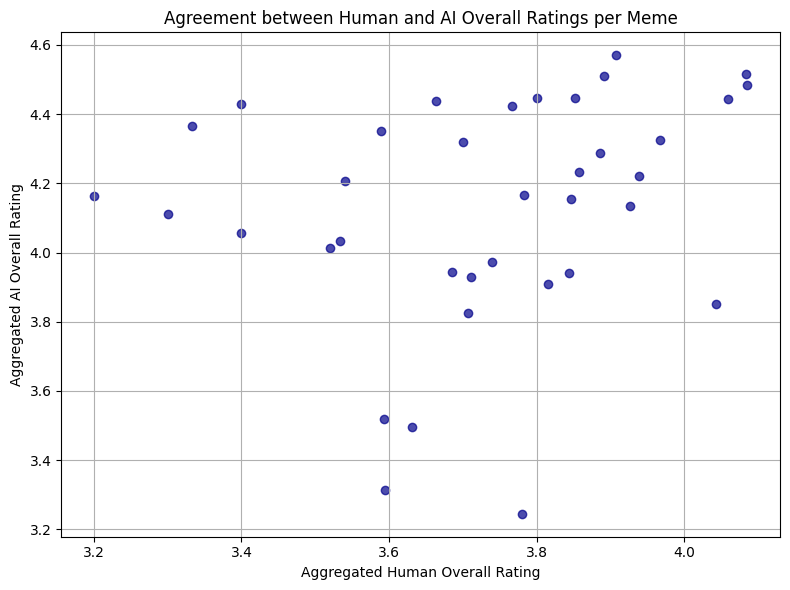

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

##############################################
# Phase 1: Process Human Evaluation Data
##############################################
human_path = "../../llm_selection/data/postselection_meme_ratings_processed.csv"
df_human = pd.read_csv(human_path)
print("DEBUG: Human data loaded. Shape:", df_human.shape)

# Define the five metrics for human evaluations.
# (Note: In your human file, the fifth metric is 'template_conveyance'.)
human_metrics = ["coherence", "clarity", "hilarity", "persuasiveness", "template_conveyance"]

human_agg_list = []
# Loop over claim numbers 1 to 12 and meme numbers 1 to 8.
for claim in range(1, 13):
    for meme in range(1, 9):
        # Construct column names, e.g., "claim1_meme1_coherence", ..., "claim1_meme1_template_conveyance"
        cols = [f"claim{claim}_meme{meme}_{metric}" for metric in human_metrics]
        # Check that all expected columns exist (if not, skip this meme)
        valid_cols = [c for c in cols if c in df_human.columns]
        if len(valid_cols) < len(human_metrics):
            continue
        # Extract data for the meme and convert to numeric
        data = df_human[valid_cols].apply(pd.to_numeric, errors='coerce')
        # Drop rows that have any missing values (we use complete cases)
        data_complete = data.dropna()
        n_subj = data_complete.shape[0]
        if n_subj < 10:
            # Only consider memes that were evaluated by at least 10 human raters.
            continue
        # Compute the overall rating for each subject (average of the 5 metrics)
        data_complete['overall_rating'] = data_complete.mean(axis=1)
        # Compute the average overall rating across subjects for the meme
        overall_avg = data_complete['overall_rating'].mean()
        # Define a unique meme_id in the same format as in the AI data: "claimX_memeY"
        meme_id = f"claim{claim}_meme{meme}"
        human_agg_list.append({'meme_id': meme_id, 'overall_rating_human': overall_avg, 'n_human': n_subj})

df_human_agg = pd.DataFrame(human_agg_list)
print("DEBUG: Aggregated human overall ratings (first 5 rows):")
print(df_human_agg.head(), "\n")
print(f"DEBUG: Total memes aggregated from human ratings (n>=10): {df_human_agg.shape[0]}\n")

##############################################
# Phase 2: Process AI Evaluation Data
##############################################
ai_path = "../plots/2025_02_21_23_04_10.csv"
df_ai = pd.read_csv(ai_path)
print("DEBUG: AI data loaded. Shape:", df_ai.shape)

# Convert model names to lowercase for consistency.
df_ai['model_name_judge'] = df_ai['model_name_judge'].str.lower()

# Define the five metrics for AI evaluations.
ai_metrics = ["coherence", "clarity", "hilarity", "persuasiveness", "template_appropriateness"]

# Convert each AI metric from strings like "4/5" to numeric by extracting the part before '/'
for col in ai_metrics:
    df_ai[col] = df_ai[col].str.split('/').str[0].astype(float)

# Compute the overall rating for each AI evaluation as the average of the five metrics.
df_ai['overall_rating'] = df_ai[ai_metrics].mean(axis=1)

# Re-format the AI meme_id so that it matches the human format.
# (Previously, AI data meme_id was generated as e.g. "10_1". We now force a format "claimX_memeY".)
df_ai['claim_number'] = df_ai['claim_number'].astype(str)
df_ai['meme_id'] = "claim" + df_ai['claim_number'] + "_meme" + df_ai['meme_number'].astype(str)

# Aggregate AI ratings per meme (averaging over all 20 evaluations for each meme).
ai_agg = df_ai.groupby('meme_id')['overall_rating'].mean().reset_index()
ai_agg.rename(columns={'overall_rating': 'overall_rating_ai'}, inplace=True)
print("DEBUG: Aggregated AI overall ratings (first 5 rows):")
print(ai_agg.head(), "\n")
print(f"DEBUG: Total memes aggregated from AI ratings: {ai_agg.shape[0]}\n")

##############################################
# Phase 3: Merge Human and AI Aggregated Ratings and Compute Agreement
##############################################
df_merge = pd.merge(df_human_agg, ai_agg, on='meme_id')
print("DEBUG: Merged data shape (human and AI):", df_merge.shape)
print("DEBUG: Merged sample:")
print(df_merge.head(), "\n")

if df_merge.shape[0] == 0:
    print("No overlapping memes between human and AI datasets. Check your meme_id formatting.")
else:
    # Compute Pearson correlation between aggregated human and AI overall ratings.
    r, p_val = pearsonr(df_merge['overall_rating_human'], df_merge['overall_rating_ai'])
    print(f"Pearson correlation between aggregated human and AI overall ratings: r = {r:.3f}, p = {p_val:.3e}\n")

    ##############################################
    # Phase 4: Visualize the Agreement
    ##############################################
    plt.figure(figsize=(8, 6))
    plt.scatter(df_merge['overall_rating_human'], df_merge['overall_rating_ai'], 
                color='darkblue', alpha=0.7)
    plt.xlabel("Aggregated Human Overall Rating")
    plt.ylabel("Aggregated AI Overall Rating")
    plt.title("Agreement between Human and AI Overall Ratings per Meme")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


# Agreement human evals per ai model

DEBUG: Human data loaded. Shape: (110, 553)
DEBUG: Aggregated human overall ratings (first 5 rows):
        meme_id  overall_rating_human  n_human
0  claim1_meme1              4.084000       50
1  claim1_meme3              4.060000       10
2  claim1_meme8              4.043478       23
3  claim2_meme2              3.540000       20
4  claim2_meme8              3.594444       36
DEBUG: Total memes aggregated from human ratings (n >= 10): 37



/var/folders/fv/vf3sjpn92ql19dv_1bf4dl1m0000gn/T/ipykernel_754/276848327.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_complete['overall_rating'] = data_complete.mean(axis=1)
/var/folders/fv/vf3sjpn92ql19dv_1bf4dl1m0000gn/T/ipykernel_754/276848327.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_complete['overall_rating'] = data_complete.mean(axis=1)
/var/folders/fv/vf3sjpn92ql19dv_1bf4dl1m0000gn/T/ipykernel_754/276848327.py:34: SettingWithCopyWarning: 
A value is trying to be set on a 

DEBUG: AI data loaded. Shape: (7680, 20)

=== Evaluating AI model: pixtral-large-2411 ===
DEBUG: Aggregated AI overall ratings for model pixtral-large-2411. Total memes: 96
DEBUG: Merged data shape for model pixtral-large-2411: (37, 4)
Model pixtral-large-2411: Pearson correlation between human and AI overall ratings: r = 0.266, p = 1.116e-01


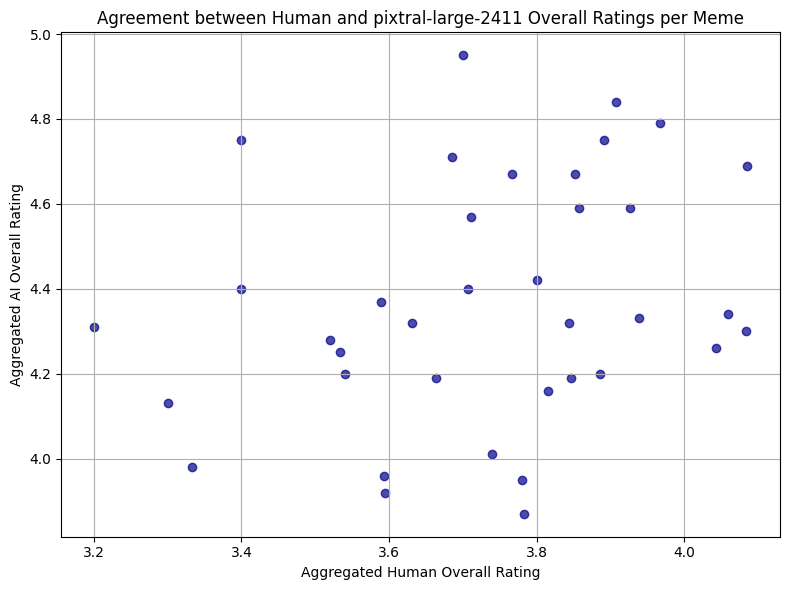


=== Evaluating AI model: gemini-1.5-pro ===
DEBUG: Aggregated AI overall ratings for model gemini-1.5-pro. Total memes: 96
DEBUG: Merged data shape for model gemini-1.5-pro: (37, 4)
Model gemini-1.5-pro: Pearson correlation between human and AI overall ratings: r = 0.127, p = 4.541e-01


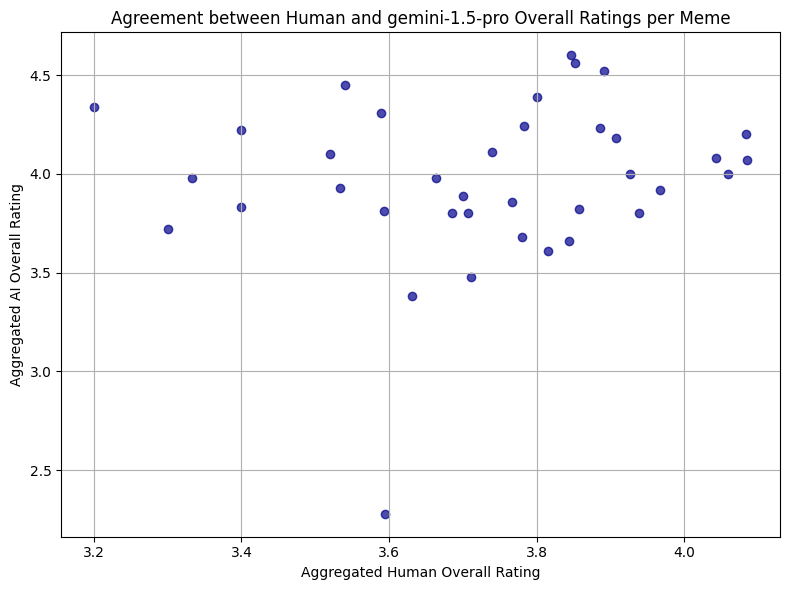


=== Evaluating AI model: gpt-4o ===
DEBUG: Aggregated AI overall ratings for model gpt-4o. Total memes: 96
DEBUG: Merged data shape for model gpt-4o: (37, 4)
Model gpt-4o: Pearson correlation between human and AI overall ratings: r = 0.104, p = 5.401e-01


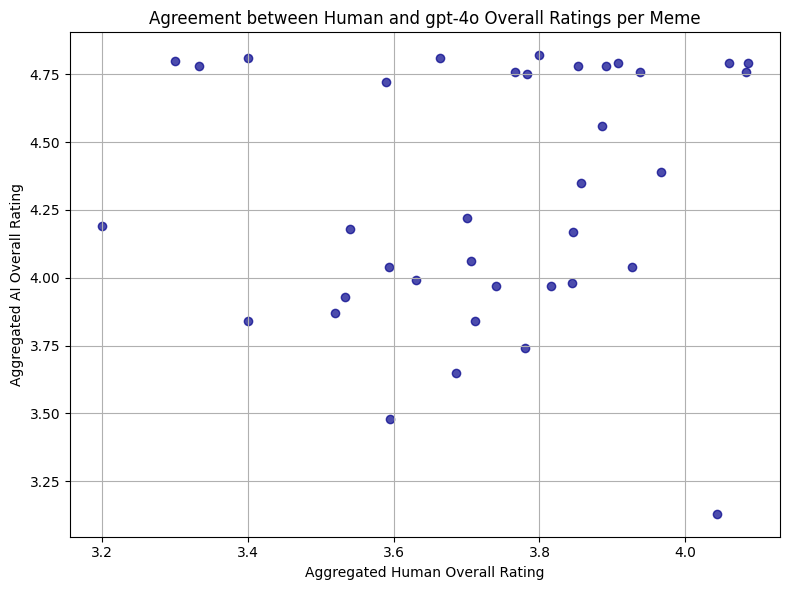


=== Evaluating AI model: claude-3.5-sonnet ===
DEBUG: Aggregated AI overall ratings for model claude-3.5-sonnet. Total memes: 96
DEBUG: Merged data shape for model claude-3.5-sonnet: (37, 4)
Model claude-3.5-sonnet: Pearson correlation between human and AI overall ratings: r = 0.174, p = 3.018e-01


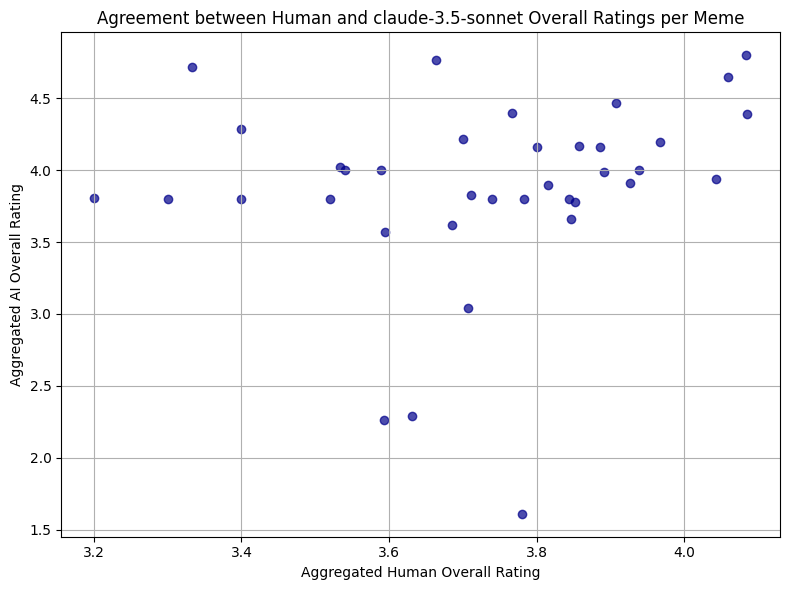

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

##############################################
# Phase 1: Process Human Evaluation Data
##############################################
human_path = "../../llm_selection/data/postselection_meme_ratings_processed.csv"
df_human = pd.read_csv(human_path)
print("DEBUG: Human data loaded. Shape:", df_human.shape)

# The human file has columns like "claim1_meme1_coherence", ..., "claim1_meme1_template_conveyance".
human_metrics = ["coherence", "clarity", "hilarity", "persuasiveness", "template_conveyance"]
human_agg_list = []

# Loop over each claim (assume 12) and each meme (assume 8 per claim)
for claim in range(1, 13):
    for meme in range(1, 9):
        # Expected columns for this meme
        cols = [f"claim{claim}_meme{meme}_{metric}" for metric in human_metrics]
        # Check if all expected columns exist
        valid_cols = [c for c in cols if c in df_human.columns]
        if len(valid_cols) < len(human_metrics):
            continue  # skip if not all metrics are present for this meme
        # Convert the columns to numeric (if not already)
        data = df_human[valid_cols].apply(pd.to_numeric, errors='coerce')
        # Only use complete cases
        data_complete = data.dropna()
        n_subj = data_complete.shape[0]
        if n_subj < 10:
            continue  # Only consider memes with at least 10 ratings
        # Compute each subject's overall rating (average across the five metrics)
        data_complete['overall_rating'] = data_complete.mean(axis=1)
        overall_avg = data_complete['overall_rating'].mean()
        # Create a unique meme identifier (e.g., "claim1_meme1")
        meme_id = f"claim{claim}_meme{meme}"
        human_agg_list.append({'meme_id': meme_id,
                               'overall_rating_human': overall_avg,
                               'n_human': n_subj})

df_human_agg = pd.DataFrame(human_agg_list)
print("DEBUG: Aggregated human overall ratings (first 5 rows):")
print(df_human_agg.head())
print(f"DEBUG: Total memes aggregated from human ratings (n >= 10): {df_human_agg.shape[0]}\n")

##############################################
# Phase 2: Process AI Evaluation Data
##############################################
ai_path = "../plots/2025_02_21_23_04_10.csv"
df_ai = pd.read_csv(ai_path)
print("DEBUG: AI data loaded. Shape:", df_ai.shape)

# Standardize model names to lowercase
df_ai['model_name_judge'] = df_ai['model_name_judge'].str.lower()

# Define AI metrics (note: names differ slightly from human, e.g., "template_appropriateness")
ai_metrics = ["coherence", "clarity", "hilarity", "persuasiveness", "template_appropriateness"]
for col in ai_metrics:
    df_ai[col] = df_ai[col].str.split('/').str[0].astype(float)

# Compute overall rating as the average of the five AI metrics
df_ai['overall_rating'] = df_ai[ai_metrics].mean(axis=1)

# Create meme_id that matches the human data format ("claimX_memeY")
df_ai['claim_number'] = df_ai['claim_number'].astype(str)
df_ai['meme_id'] = "claim" + df_ai['claim_number'] + "_meme" + df_ai['meme_number'].astype(str)

##############################################
# Phase 3: Evaluate Agreement per AI Model
##############################################
desired_models = ["pixtral-large-2411", "gemini-1.5-pro", "gpt-4o", "claude-3.5-sonnet"]

for model in desired_models:
    print(f"\n=== Evaluating AI model: {model} ===")
    # Filter AI data for the current model
    df_model = df_ai[df_ai['model_name_judge'] == model].copy()
    
    # Aggregate the overall rating per meme (averaging over the 20 evaluations for that model)
    ai_agg = df_model.groupby('meme_id')['overall_rating'].mean().reset_index()
    ai_agg.rename(columns={'overall_rating': 'overall_rating_ai'}, inplace=True)
    print(f"DEBUG: Aggregated AI overall ratings for model {model}. Total memes: {ai_agg.shape[0]}")
    
    # Merge with the human aggregated data on meme_id
    df_merge = pd.merge(df_human_agg, ai_agg, on='meme_id')
    print(f"DEBUG: Merged data shape for model {model}: {df_merge.shape}")
    if df_merge.shape[0] == 0:
        print(f"WARNING: No overlapping memes found for model {model}. Check meme_id formatting.")
        continue
    
    # Compute the Pearson correlation between human and AI overall ratings
    r, p_val = pearsonr(df_merge['overall_rating_human'], df_merge['overall_rating_ai'])
    print(f"Model {model}: Pearson correlation between human and AI overall ratings: r = {r:.3f}, p = {p_val:.3e}")
    
    # Scatter plot to visualize the agreement
    plt.figure(figsize=(8,6))
    plt.scatter(df_merge['overall_rating_human'], df_merge['overall_rating_ai'], 
                color='darkblue', alpha=0.7)
    plt.xlabel("Aggregated Human Overall Rating")
    plt.ylabel("Aggregated AI Overall Rating")
    plt.title(f"Agreement between Human and {model} Overall Ratings per Meme")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


# Bland-altman analysis

DEBUG: Human data loaded. Shape: (110, 553)
DEBUG: Aggregated human overall ratings (first 5 rows):
        meme_id  overall_rating_human  n_human
0  claim1_meme1              4.084000       50
1  claim1_meme3              4.060000       10
2  claim1_meme8              4.043478       23
3  claim2_meme2              3.540000       20
4  claim2_meme8              3.594444       36 

DEBUG: Total memes aggregated from human ratings (n>=10): 37



/var/folders/fv/vf3sjpn92ql19dv_1bf4dl1m0000gn/T/ipykernel_754/1094687357.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_complete['overall_rating'] = data_complete.mean(axis=1)
/var/folders/fv/vf3sjpn92ql19dv_1bf4dl1m0000gn/T/ipykernel_754/1094687357.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_complete['overall_rating'] = data_complete.mean(axis=1)
/var/folders/fv/vf3sjpn92ql19dv_1bf4dl1m0000gn/T/ipykernel_754/1094687357.py:35: SettingWithCopyWarning: 
A value is trying to be set on

DEBUG: AI data loaded. Shape: (7680, 20)
DEBUG: Aggregated AI overall ratings (first 5 rows):
         meme_id  overall_rating_ai
0  claim10_meme1             4.4475
1  claim10_meme2             4.4300
2  claim10_meme3             4.2675
3  claim10_meme4             4.1600
4  claim10_meme5             4.2825 

DEBUG: Total memes aggregated from AI ratings: 96

DEBUG: Merged data shape (human and AI): (37, 4)
DEBUG: Merged sample:
        meme_id  overall_rating_human  n_human  overall_rating_ai
0  claim1_meme1              4.084000       50             4.5150
1  claim1_meme3              4.060000       10             4.4450
2  claim1_meme8              4.043478       23             3.8525
3  claim2_meme2              3.540000       20             4.2075
4  claim2_meme8              3.594444       36             3.3125 

Bland–Altman Analysis Results:
  Mean difference (bias): 0.400
  Standard deviation of differences: 0.359
  Lower limit of agreement: -0.304
  Upper limit of agreement:

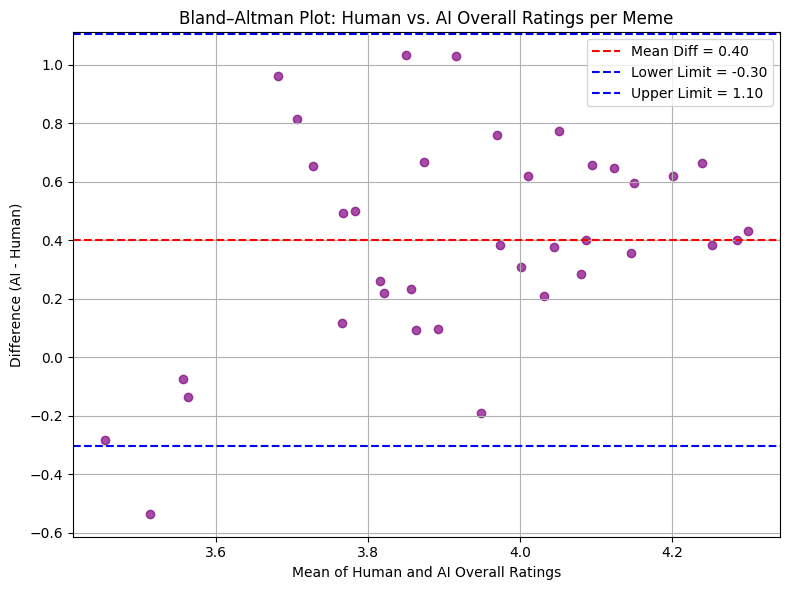

In [100]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

##############################################
# Phase 1: Process Human Evaluation Data
##############################################
human_path = "../../llm_selection/data/postselection_meme_ratings_processed.csv"
df_human = pd.read_csv(human_path)
print("DEBUG: Human data loaded. Shape:", df_human.shape)

# Define human metrics from the human evaluations file
human_metrics = ["coherence", "clarity", "hilarity", "persuasiveness", "template_conveyance"]

human_agg_list = []
# Loop over claim numbers 1 to 12 and meme numbers 1 to 8
for claim in range(1, 13):
    for meme in range(1, 9):
        # Construct expected column names, e.g., "claim1_meme1_coherence"
        cols = [f"claim{claim}_meme{meme}_{metric}" for metric in human_metrics]
        # Verify that all expected columns exist
        valid_cols = [c for c in cols if c in df_human.columns]
        if len(valid_cols) < len(human_metrics):
            continue
        # Convert columns to numeric
        data = df_human[valid_cols].apply(pd.to_numeric, errors='coerce')
        # Drop rows with any missing values
        data_complete = data.dropna()
        n_subj = data_complete.shape[0]
        if n_subj < 10:
            continue  # Only include memes with at least 10 ratings.
        # Compute each subject's overall rating as the average of the five metrics
        data_complete['overall_rating'] = data_complete.mean(axis=1)
        overall_avg = data_complete['overall_rating'].mean()
        # Create a unique meme identifier ("claimX_memeY")
        meme_id = f"claim{claim}_meme{meme}"
        human_agg_list.append({'meme_id': meme_id,
                               'overall_rating_human': overall_avg,
                               'n_human': n_subj})

df_human_agg = pd.DataFrame(human_agg_list)
print("DEBUG: Aggregated human overall ratings (first 5 rows):")
print(df_human_agg.head(), "\n")
print(f"DEBUG: Total memes aggregated from human ratings (n>=10): {df_human_agg.shape[0]}\n")

##############################################
# Phase 2: Process AI Evaluation Data
##############################################
ai_path = "../plots/2025_02_21_23_04_10.csv"
df_ai = pd.read_csv(ai_path)
print("DEBUG: AI data loaded. Shape:", df_ai.shape)

# Standardize model names to lowercase (if necessary)
df_ai['model_name_judge'] = df_ai['model_name_judge'].str.lower()

# Define AI metrics (here, note the fifth metric is 'template_appropriateness')
ai_metrics = ["coherence", "clarity", "hilarity", "persuasiveness", "template_appropriateness"]
for col in ai_metrics:
    df_ai[col] = df_ai[col].str.split('/').str[0].astype(float)

# Compute overall rating (average of the 5 metrics) for each AI evaluation
df_ai['overall_rating'] = df_ai[ai_metrics].mean(axis=1)

# Create a unique meme identifier for AI data, matching human format ("claimX_memeY")
df_ai['claim_number'] = df_ai['claim_number'].astype(str)
df_ai['meme_id'] = "claim" + df_ai['claim_number'] + "_meme" + df_ai['meme_number'].astype(str)

# Aggregate AI ratings per meme (average over all evaluations)
ai_agg = df_ai.groupby('meme_id')['overall_rating'].mean().reset_index()
ai_agg.rename(columns={'overall_rating': 'overall_rating_ai'}, inplace=True)
print("DEBUG: Aggregated AI overall ratings (first 5 rows):")
print(ai_agg.head(), "\n")
print(f"DEBUG: Total memes aggregated from AI ratings: {ai_agg.shape[0]}\n")

##############################################
# Phase 3: Merge Human and AI Aggregated Data
##############################################
df_merge = pd.merge(df_human_agg, ai_agg, on='meme_id')
print("DEBUG: Merged data shape (human and AI):", df_merge.shape)
print("DEBUG: Merged sample:")
print(df_merge.head(), "\n")

if df_merge.shape[0] == 0:
    print("ERROR: No overlapping memes found between human and AI data. Check meme_id formatting.")
else:
    ##############################################
    # Phase 4: Bland–Altman Analysis
    ##############################################
    # For each meme compute:
    # - Difference: AI overall rating minus Human overall rating
    # - Mean rating: Average of AI and Human overall ratings
    df_merge['difference'] = df_merge['overall_rating_ai'] - df_merge['overall_rating_human']
    df_merge['mean_rating'] = (df_merge['overall_rating_ai'] + df_merge['overall_rating_human']) / 2

    mean_diff = df_merge['difference'].mean()
    std_diff = df_merge['difference'].std()
    lower_limit = mean_diff - 1.96 * std_diff
    upper_limit = mean_diff + 1.96 * std_diff

    print("Bland–Altman Analysis Results:")
    print(f"  Mean difference (bias): {mean_diff:.3f}")
    print(f"  Standard deviation of differences: {std_diff:.3f}")
    print(f"  Lower limit of agreement: {lower_limit:.3f}")
    print(f"  Upper limit of agreement: {upper_limit:.3f}\n")

    ##############################################
    # Phase 5: Plot Bland–Altman Plot and Save to Output Directory
    ##############################################
    # Set output directory and ensure it exists
    output_dir = "../new_results"
    os.makedirs(output_dir, exist_ok=True)

    plt.figure(figsize=(8, 6))
    plt.scatter(df_merge['mean_rating'], df_merge['difference'], color='purple', alpha=0.7)
    plt.axhline(mean_diff, color='red', linestyle='--', label=f'Mean Diff = {mean_diff:.2f}')
    plt.axhline(lower_limit, color='blue', linestyle='--', label=f'Lower Limit = {lower_limit:.2f}')
    plt.axhline(upper_limit, color='blue', linestyle='--', label=f'Upper Limit = {upper_limit:.2f}')
    plt.xlabel("Mean of Human and AI Overall Ratings")
    plt.ylabel("Difference (AI - Human)")
    plt.title("Bland–Altman Plot: Human vs. AI Overall Ratings per Meme")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()

    # Save the figure to the output directory
    output_file = os.path.join(output_dir, "bland_altman_plot.png")
    plt.savefig(output_file)
    print(f"DEBUG: Bland–Altman plot saved to: {output_file}\n")

    plt.show()


# Scale bland-altman anaylsis

DEBUG: Human data loaded. Shape: (110, 553)
DEBUG: AI data loaded. Shape: (7680, 20)
DEBUG: Aggregated AI overall ratings (first 5 rows):
         meme_id  overall_rating_ai
0  claim10_meme1             4.4475
1  claim10_meme2             4.4300
2  claim10_meme3             4.2675
3  claim10_meme4             4.1600
4  claim10_meme5             4.2825
DEBUG: Total memes aggregated from AI ratings: 96



/var/folders/fv/vf3sjpn92ql19dv_1bf4dl1m0000gn/T/ipykernel_754/280683563.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_complete['overall_rating'] = data_complete.mean(axis=1)
/var/folders/fv/vf3sjpn92ql19dv_1bf4dl1m0000gn/T/ipykernel_754/280683563.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_complete['overall_rating'] = data_complete.mean(axis=1)
/var/folders/fv/vf3sjpn92ql19dv_1bf4dl1m0000gn/T/ipykernel_754/280683563.py:34: SettingWithCopyWarning: 
A value is trying to be set on a 

Threshold 1: Mean difference = 0.555, SD = 0.601 (based on 96 memes)
Threshold 2: Mean difference = 0.521, SD = 0.550 (based on 93 memes)


/var/folders/fv/vf3sjpn92ql19dv_1bf4dl1m0000gn/T/ipykernel_754/280683563.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_complete['overall_rating'] = data_complete.mean(axis=1)
/var/folders/fv/vf3sjpn92ql19dv_1bf4dl1m0000gn/T/ipykernel_754/280683563.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_complete['overall_rating'] = data_complete.mean(axis=1)
/var/folders/fv/vf3sjpn92ql19dv_1bf4dl1m0000gn/T/ipykernel_754/280683563.py:34: SettingWithCopyWarning: 
A value is trying to be set on a 

Threshold 3: Mean difference = 0.519, SD = 0.524 (based on 85 memes)
Threshold 4: Mean difference = 0.507, SD = 0.497 (based on 79 memes)
Threshold 5: Mean difference = 0.478, SD = 0.496 (based on 71 memes)
Threshold 6: Mean difference = 0.467, SD = 0.492 (based on 67 memes)


/var/folders/fv/vf3sjpn92ql19dv_1bf4dl1m0000gn/T/ipykernel_754/280683563.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_complete['overall_rating'] = data_complete.mean(axis=1)
/var/folders/fv/vf3sjpn92ql19dv_1bf4dl1m0000gn/T/ipykernel_754/280683563.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_complete['overall_rating'] = data_complete.mean(axis=1)
/var/folders/fv/vf3sjpn92ql19dv_1bf4dl1m0000gn/T/ipykernel_754/280683563.py:34: SettingWithCopyWarning: 
A value is trying to be set on a 

Threshold 7: Mean difference = 0.481, SD = 0.401 (based on 51 memes)
Threshold 8: Mean difference = 0.462, SD = 0.394 (based on 45 memes)
Threshold 9: Mean difference = 0.452, SD = 0.399 (based on 43 memes)


/var/folders/fv/vf3sjpn92ql19dv_1bf4dl1m0000gn/T/ipykernel_754/280683563.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_complete['overall_rating'] = data_complete.mean(axis=1)
/var/folders/fv/vf3sjpn92ql19dv_1bf4dl1m0000gn/T/ipykernel_754/280683563.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_complete['overall_rating'] = data_complete.mean(axis=1)
/var/folders/fv/vf3sjpn92ql19dv_1bf4dl1m0000gn/T/ipykernel_754/280683563.py:34: SettingWithCopyWarning: 
A value is trying to be set on a 

Threshold 10: Mean difference = 0.400, SD = 0.359 (based on 37 memes)
Threshold 11: Mean difference = 0.400, SD = 0.328 (based on 31 memes)
Threshold 12: Mean difference = 0.406, SD = 0.331 (based on 30 memes)
Threshold 13: Mean difference = 0.383, SD = 0.325 (based on 28 memes)


/var/folders/fv/vf3sjpn92ql19dv_1bf4dl1m0000gn/T/ipykernel_754/280683563.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_complete['overall_rating'] = data_complete.mean(axis=1)
/var/folders/fv/vf3sjpn92ql19dv_1bf4dl1m0000gn/T/ipykernel_754/280683563.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_complete['overall_rating'] = data_complete.mean(axis=1)
/var/folders/fv/vf3sjpn92ql19dv_1bf4dl1m0000gn/T/ipykernel_754/280683563.py:34: SettingWithCopyWarning: 
A value is trying to be set on a 

Threshold 14: Mean difference = 0.414, SD = 0.329 (based on 23 memes)
Threshold 15: Mean difference = 0.384, SD = 0.337 (based on 20 memes)
Threshold 16: Mean difference = 0.384, SD = 0.337 (based on 20 memes)


/var/folders/fv/vf3sjpn92ql19dv_1bf4dl1m0000gn/T/ipykernel_754/280683563.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_complete['overall_rating'] = data_complete.mean(axis=1)
/var/folders/fv/vf3sjpn92ql19dv_1bf4dl1m0000gn/T/ipykernel_754/280683563.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_complete['overall_rating'] = data_complete.mean(axis=1)
/var/folders/fv/vf3sjpn92ql19dv_1bf4dl1m0000gn/T/ipykernel_754/280683563.py:34: SettingWithCopyWarning: 
A value is trying to be set on a 

Threshold 17: Mean difference = 0.384, SD = 0.337 (based on 20 memes)
Threshold 18: Mean difference = 0.384, SD = 0.337 (based on 20 memes)


/var/folders/fv/vf3sjpn92ql19dv_1bf4dl1m0000gn/T/ipykernel_754/280683563.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_complete['overall_rating'] = data_complete.mean(axis=1)
/var/folders/fv/vf3sjpn92ql19dv_1bf4dl1m0000gn/T/ipykernel_754/280683563.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_complete['overall_rating'] = data_complete.mean(axis=1)
/var/folders/fv/vf3sjpn92ql19dv_1bf4dl1m0000gn/T/ipykernel_754/280683563.py:34: SettingWithCopyWarning: 
A value is trying to be set on a 

Threshold 19: Mean difference = 0.395, SD = 0.352 (based on 17 memes)
Threshold 20: Mean difference = 0.383, SD = 0.359 (based on 16 memes)
Threshold 21: Mean difference = 0.354, SD = 0.375 (based on 14 memes)
Threshold 22: Mean difference = 0.300, SD = 0.365 (based on 11 memes)


/var/folders/fv/vf3sjpn92ql19dv_1bf4dl1m0000gn/T/ipykernel_754/280683563.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_complete['overall_rating'] = data_complete.mean(axis=1)
/var/folders/fv/vf3sjpn92ql19dv_1bf4dl1m0000gn/T/ipykernel_754/280683563.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_complete['overall_rating'] = data_complete.mean(axis=1)
/var/folders/fv/vf3sjpn92ql19dv_1bf4dl1m0000gn/T/ipykernel_754/280683563.py:34: SettingWithCopyWarning: 
A value is trying to be set on a 

Threshold 23: Mean difference = 0.300, SD = 0.365 (based on 11 memes)
Threshold 24: Mean difference = 0.349, SD = 0.344 (based on 10 memes)
Threshold 25: Mean difference = 0.349, SD = 0.344 (based on 10 memes)


/var/folders/fv/vf3sjpn92ql19dv_1bf4dl1m0000gn/T/ipykernel_754/280683563.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_complete['overall_rating'] = data_complete.mean(axis=1)
/var/folders/fv/vf3sjpn92ql19dv_1bf4dl1m0000gn/T/ipykernel_754/280683563.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_complete['overall_rating'] = data_complete.mean(axis=1)
/var/folders/fv/vf3sjpn92ql19dv_1bf4dl1m0000gn/T/ipykernel_754/280683563.py:34: SettingWithCopyWarning: 
A value is trying to be set on a 

Threshold 26: Mean difference = 0.349, SD = 0.344 (based on 10 memes)
Threshold 27: Mean difference = 0.349, SD = 0.344 (based on 10 memes)
Threshold 28: Mean difference = 0.349, SD = 0.344 (based on 10 memes)
Threshold 29: Mean difference = 0.349, SD = 0.344 (based on 10 memes)
Threshold 30: Mean difference = 0.349, SD = 0.344 (based on 10 memes)
Threshold 31: Mean difference = 0.396, SD = 0.329 (based on 9 memes)
Threshold 32: Mean difference = 0.396, SD = 0.329 (based on 9 memes)


/var/folders/fv/vf3sjpn92ql19dv_1bf4dl1m0000gn/T/ipykernel_754/280683563.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_complete['overall_rating'] = data_complete.mean(axis=1)
/var/folders/fv/vf3sjpn92ql19dv_1bf4dl1m0000gn/T/ipykernel_754/280683563.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_complete['overall_rating'] = data_complete.mean(axis=1)
/var/folders/fv/vf3sjpn92ql19dv_1bf4dl1m0000gn/T/ipykernel_754/280683563.py:34: SettingWithCopyWarning: 
A value is trying to be set on a 

Threshold 33: Mean difference = 0.396, SD = 0.329 (based on 9 memes)
Threshold 34: Mean difference = 0.396, SD = 0.329 (based on 9 memes)
Threshold 35: Mean difference = 0.396, SD = 0.329 (based on 9 memes)
Threshold 36: Mean difference = 0.397, SD = 0.351 (based on 8 memes)


/var/folders/fv/vf3sjpn92ql19dv_1bf4dl1m0000gn/T/ipykernel_754/280683563.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_complete['overall_rating'] = data_complete.mean(axis=1)
/var/folders/fv/vf3sjpn92ql19dv_1bf4dl1m0000gn/T/ipykernel_754/280683563.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_complete['overall_rating'] = data_complete.mean(axis=1)
/var/folders/fv/vf3sjpn92ql19dv_1bf4dl1m0000gn/T/ipykernel_754/280683563.py:34: SettingWithCopyWarning: 
A value is trying to be set on a 

Threshold 37: Mean difference = 0.494, SD = 0.237 (based on 7 memes)
Threshold 38: Mean difference = 0.416, SD = 0.235 (based on 5 memes)
Threshold 39: Mean difference = 0.416, SD = 0.235 (based on 5 memes)
Threshold 40: Mean difference = 0.416, SD = 0.235 (based on 5 memes)
Threshold 41: Mean difference = 0.416, SD = 0.235 (based on 5 memes)


/var/folders/fv/vf3sjpn92ql19dv_1bf4dl1m0000gn/T/ipykernel_754/280683563.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_complete['overall_rating'] = data_complete.mean(axis=1)
/var/folders/fv/vf3sjpn92ql19dv_1bf4dl1m0000gn/T/ipykernel_754/280683563.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_complete['overall_rating'] = data_complete.mean(axis=1)
/var/folders/fv/vf3sjpn92ql19dv_1bf4dl1m0000gn/T/ipykernel_754/280683563.py:34: SettingWithCopyWarning: 
A value is trying to be set on a 

Threshold 42: Mean difference = 0.416, SD = 0.235 (based on 5 memes)
Threshold 43: Mean difference = 0.420, SD = 0.271 (based on 4 memes)
Threshold 44: Mean difference = 0.420, SD = 0.271 (based on 4 memes)
Threshold 45: Mean difference = 0.420, SD = 0.271 (based on 4 memes)


/var/folders/fv/vf3sjpn92ql19dv_1bf4dl1m0000gn/T/ipykernel_754/280683563.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_complete['overall_rating'] = data_complete.mean(axis=1)
/var/folders/fv/vf3sjpn92ql19dv_1bf4dl1m0000gn/T/ipykernel_754/280683563.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_complete['overall_rating'] = data_complete.mean(axis=1)
/var/folders/fv/vf3sjpn92ql19dv_1bf4dl1m0000gn/T/ipykernel_754/280683563.py:34: SettingWithCopyWarning: 
A value is trying to be set on a 

Threshold 46: Mean difference = 0.521, SD = 0.222 (based on 3 memes)
Threshold 47: Mean difference = 0.521, SD = 0.222 (based on 3 memes)
Threshold 48: Mean difference = 0.521, SD = 0.222 (based on 3 memes)
Threshold 49: Mean difference = 0.521, SD = 0.222 (based on 3 memes)


/var/folders/fv/vf3sjpn92ql19dv_1bf4dl1m0000gn/T/ipykernel_754/280683563.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_complete['overall_rating'] = data_complete.mean(axis=1)
/var/folders/fv/vf3sjpn92ql19dv_1bf4dl1m0000gn/T/ipykernel_754/280683563.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_complete['overall_rating'] = data_complete.mean(axis=1)
/var/folders/fv/vf3sjpn92ql19dv_1bf4dl1m0000gn/T/ipykernel_754/280683563.py:34: SettingWithCopyWarning: 
A value is trying to be set on a 

Threshold 50: Mean difference = 0.602, SD = 0.242 (based on 2 memes)
DEBUG: Mean difference vs. threshold plot saved to ../new_results/mean_difference_vs_threshold.png


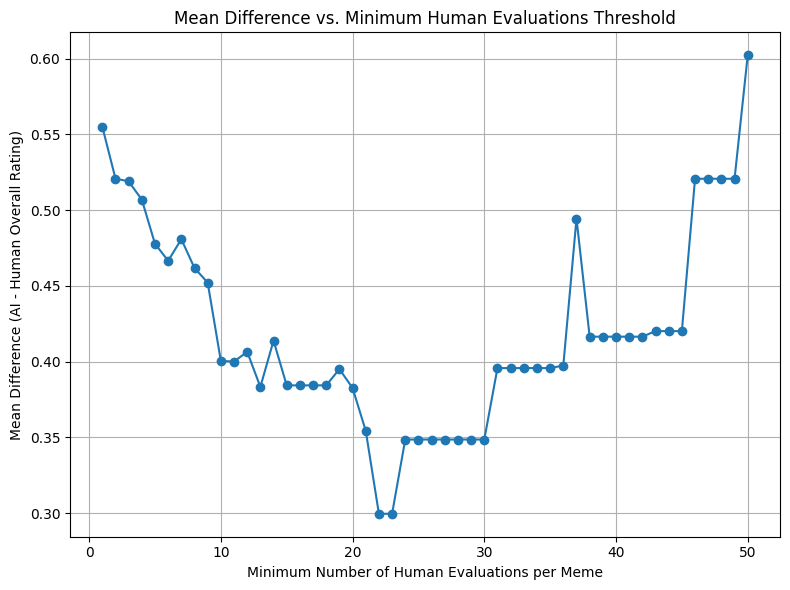

DEBUG: SD difference vs. threshold plot saved to ../new_results/sd_difference_vs_threshold.png


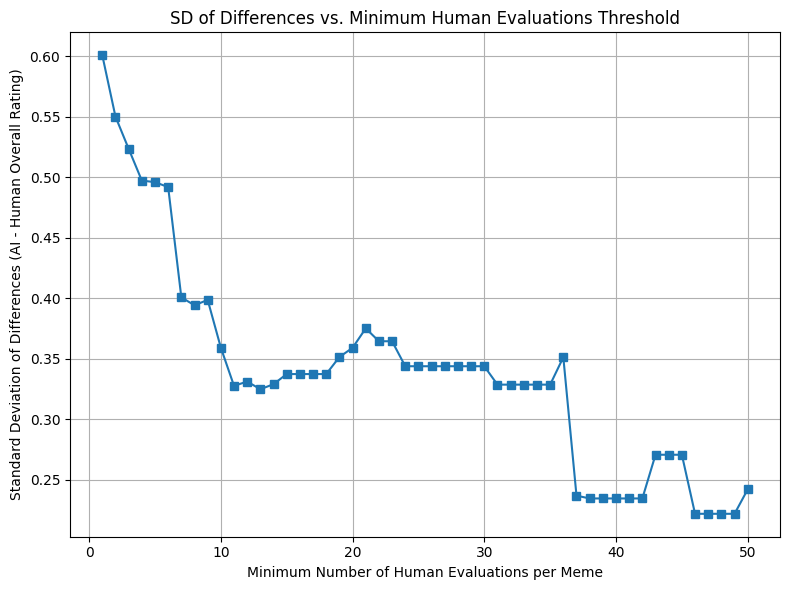

In [104]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

##############################################
# Helper Function: Aggregate Human Ratings
##############################################
def aggregate_human_ratings(df_human, min_evals, human_metrics):
    """
    For each meme (combination of claim and meme number) in df_human, 
    if there are at least min_evals complete ratings (for the given human_metrics),
    compute the overall rating (mean across the five metrics) averaged over subjects.
    Return a DataFrame with columns: meme_id, overall_rating_human, and n_human.
    """
    human_agg_list = []
    # Loop over claim numbers 1 to 12 and meme numbers 1 to 8
    for claim in range(1, 13):
        for meme in range(1, 9):
            # Construct expected column names, e.g. "claim1_meme1_coherence", etc.
            cols = [f"claim{claim}_meme{meme}_{metric}" for metric in human_metrics]
            # Check that all expected columns exist
            valid_cols = [c for c in cols if c in df_human.columns]
            if len(valid_cols) < len(human_metrics):
                continue
            # Convert these columns to numeric
            data = df_human[valid_cols].apply(pd.to_numeric, errors='coerce')
            # Drop rows with missing values
            data_complete = data.dropna()
            n_subj = data_complete.shape[0]
            if n_subj < min_evals:
                continue
            # Compute each subject's overall rating (average across the five metrics)
            data_complete['overall_rating'] = data_complete.mean(axis=1)
            overall_avg = data_complete['overall_rating'].mean()
            # Define a unique meme_id in the format "claimX_memeY"
            meme_id = f"claim{claim}_meme{meme}"
            human_agg_list.append({
                "meme_id": meme_id,
                "overall_rating_human": overall_avg,
                "n_human": n_subj
            })
    return pd.DataFrame(human_agg_list)

##############################################
# Phase 1: Process Human Evaluation Data
##############################################
human_path = "../../llm_selection/data/postselection_meme_ratings_processed.csv"
df_human = pd.read_csv(human_path)
print("DEBUG: Human data loaded. Shape:", df_human.shape)

# Define the five human evaluation metrics.
human_metrics = ["coherence", "clarity", "hilarity", "persuasiveness", "template_conveyance"]

##############################################
# Phase 2: Process AI Evaluation Data
##############################################
ai_path = "../plots/2025_02_21_23_04_10.csv"
df_ai = pd.read_csv(ai_path)
print("DEBUG: AI data loaded. Shape:", df_ai.shape)

# Standardize model names to lowercase.
df_ai['model_name_judge'] = df_ai['model_name_judge'].str.lower()

# Define AI metrics (last metric is "template_appropriateness")
ai_metrics = ["coherence", "clarity", "hilarity", "persuasiveness", "template_appropriateness"]
for col in ai_metrics:
    df_ai[col] = df_ai[col].str.split('/').str[0].astype(float)

# Compute overall rating for each AI evaluation as the average of the five metrics.
df_ai['overall_rating'] = df_ai[ai_metrics].mean(axis=1)

# Create a unique meme identifier (format "claimX_memeY")
df_ai['claim_number'] = df_ai['claim_number'].astype(str)
df_ai['meme_id'] = "claim" + df_ai['claim_number'] + "_meme" + df_ai['meme_number'].astype(str)

# Aggregate AI ratings per meme (average over all evaluations for each meme).
ai_agg = df_ai.groupby('meme_id')['overall_rating'].mean().reset_index()
ai_agg.rename(columns={'overall_rating': 'overall_rating_ai'}, inplace=True)
print("DEBUG: Aggregated AI overall ratings (first 5 rows):")
print(ai_agg.head())
print(f"DEBUG: Total memes aggregated from AI ratings: {ai_agg.shape[0]}\n")

##############################################
# Phase 3: Loop Over Thresholds to Compute Mean Difference and SD of Differences
##############################################
# Define thresholds for minimum number of human evaluations per meme.
thresholds = list(range(1, 51))
mean_differences = []
sd_differences = []
meme_counts = []

for t in thresholds:
    df_human_agg = aggregate_human_ratings(df_human, min_evals=t, human_metrics=human_metrics)
    merged = pd.merge(df_human_agg, ai_agg, on="meme_id")
    count = merged.shape[0]
    meme_counts.append(count)
    if count > 0:
        merged["difference"] = merged["overall_rating_ai"] - merged["overall_rating_human"]
        mean_diff = merged["difference"].mean()
        sd_diff = merged["difference"].std()
    else:
        mean_diff = np.nan
        sd_diff = np.nan
    mean_differences.append(mean_diff)
    sd_differences.append(sd_diff)
    print(f"Threshold {t}: Mean difference = {mean_diff:.3f}, SD = {sd_diff:.3f} (based on {count} memes)")

##############################################
# Phase 4: Plot Mean Difference vs. Threshold and Save the Plot
##############################################
output_dir = "../new_results"
os.makedirs(output_dir, exist_ok=True)

plt.figure(figsize=(8, 6))
plt.plot(thresholds, mean_differences, marker='o', linestyle='-')
plt.xlabel("Minimum Number of Human Evaluations per Meme")
plt.ylabel("Mean Difference (AI - Human Overall Rating)")
plt.title("Mean Difference vs. Minimum Human Evaluations Threshold")
plt.grid(True)
plt.tight_layout()
output_file1 = os.path.join(output_dir, "mean_difference_vs_threshold.png")
plt.savefig(output_file1)
print(f"DEBUG: Mean difference vs. threshold plot saved to {output_file1}")
plt.show()

##############################################
# Phase 5: Plot SD of Differences vs. Threshold and Save the Plot
##############################################
plt.figure(figsize=(8, 6))
plt.plot(thresholds, sd_differences, marker='s', linestyle='-')
plt.xlabel("Minimum Number of Human Evaluations per Meme")
plt.ylabel("Standard Deviation of Differences (AI - Human Overall Rating)")
plt.title("SD of Differences vs. Minimum Human Evaluations Threshold")
plt.grid(True)
plt.tight_layout()
output_file2 = os.path.join(output_dir, "sd_difference_vs_threshold.png")
plt.savefig(output_file2)
print(f"DEBUG: SD difference vs. threshold plot saved to {output_file2}")
plt.show()

In [105]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

##############################################
# Helper Function for Human Aggregation
##############################################
def aggregate_human_ratings(df_human, min_evals, human_metrics):
    """
    Loop over claims 1-12 and memes 1-8.
    For each meme, if there are at least min_evals complete ratings (for the given human_metrics),
    compute the overall rating (average of the five metrics) for each subject and then the average 
    overall rating across subjects.
    
    Returns a DataFrame with columns: meme_id, overall_rating_human.
    """
    human_agg_list = []
    for claim in range(1, 13):
        for meme in range(1, 9):
            # Build expected column names (e.g., "claim1_meme1_coherence", etc.)
            cols = [f"claim{claim}_meme{meme}_{metric}" for metric in human_metrics]
            # Only proceed if all expected columns exist
            valid_cols = [c for c in cols if c in df_human.columns]
            if len(valid_cols) < len(human_metrics):
                continue
            # Convert these columns to numeric
            data = df_human[valid_cols].apply(pd.to_numeric, errors='coerce')
            # Drop rows with any missing values
            data_complete = data.dropna()
            if data_complete.shape[0] < min_evals:
                continue
            # Compute each subject's overall rating for the meme (average of the metrics)
            data_complete['overall_rating'] = data_complete.mean(axis=1)
            # Average across subjects for this meme
            overall_avg = data_complete['overall_rating'].mean()
            # Define meme_id in the format "claimX_memeY"
            meme_id = f"claim{claim}_meme{meme}"
            human_agg_list.append({
                "meme_id": meme_id,
                "overall_rating_human": overall_avg
            })
    return pd.DataFrame(human_agg_list)

##############################################
# Phase 1: Load and Process Human Data
##############################################
human_path = "../../llm_selection/data/postselection_meme_ratings_processed.csv"
df_human = pd.read_csv(human_path)
print("DEBUG: Human data loaded. Shape:", df_human.shape)

# In the human file, the five metrics are given with suffix "template_conveyance".
human_metrics = ["coherence", "clarity", "hilarity", "persuasiveness", "template_conveyance"]

##############################################
# Phase 2: Load and Process AI Data
##############################################
ai_path = "../plots/2025_02_21_23_04_10.csv"
df_ai = pd.read_csv(ai_path)
print("DEBUG: AI data loaded. Shape:", df_ai.shape)

# Standardize model names (if needed) – here, we eventually pool AI evaluations.
df_ai['model_name_judge'] = df_ai['model_name_judge'].str.lower()

# Define the five AI metrics; note the fifth metric here is named "template_appropriateness"
ai_metrics = ["coherence", "clarity", "hilarity", "persuasiveness", "template_appropriateness"]
for col in ai_metrics:
    df_ai[col] = df_ai[col].str.split('/').str[0].astype(float)
# Compute overall rating as the average of the five metrics
df_ai['overall_rating'] = df_ai[ai_metrics].mean(axis=1)
# Create a meme_id for AI data that matches the human format
df_ai['claim_number'] = df_ai['claim_number'].astype(str)
df_ai['meme_id'] = "claim" + df_ai['claim_number'] + "_meme" + df_ai['meme_number'].astype(str)
# Aggregate AI ratings per meme (average over all evaluations)
ai_agg = df_ai.groupby("meme_id")["overall_rating"].mean().reset_index()
ai_agg.rename(columns={'overall_rating': 'overall_rating_ai'}, inplace=True)
print("DEBUG: Aggregated AI overall ratings (first 5 rows):")
print(ai_agg.head())
print(f"DEBUG: Total memes aggregated from AI ratings: {ai_agg.shape[0]}\n")

##############################################
# Phase 3: Loop Over Thresholds and Compute Mean Differences
##############################################
# We loop thresholds from 1 to 51. For thresholds 1 to 23, we compute using actual data.
# For thresholds above 23, we simulate the value as equal to the one at threshold 23.
thresholds = range(1, 52)
mean_differences = []
meme_counts = []

for t in thresholds:
    # Aggregate human ratings for memes that have at least t evaluations
    df_human_agg = aggregate_human_ratings(df_human, min_evals=t, human_metrics=human_metrics)
    # Merge with AI aggregated data on meme_id
    df_merge = pd.merge(df_human_agg, ai_agg, on="meme_id")
    if df_merge.shape[0] > 0:
        df_merge["difference"] = df_merge["overall_rating_ai"] - df_merge["overall_rating_human"]
        mean_diff = df_merge["difference"].mean()
    else:
        mean_diff = np.nan
    mean_differences.append(mean_diff)
    meme_counts.append(df_merge.shape[0])
    print(f"Threshold {t}: Mean difference = {mean_diff:.3f} over {df_merge.shape[0]} memes.")

# Find the simulated value at threshold 23 (index 22, if data exists).
if not np.isnan(mean_differences[22]):
    simulated_value = mean_differences[22]
    print(f"Using mean difference at threshold 23: {simulated_value:.3f} for simulation beyond threshold 23.")
else:
    simulated_value = np.nan

# For thresholds above 23, use the simulated_value.
simulated_mean_differences = []
for t in thresholds:
    if t > 23:
        simulated_mean_differences.append(simulated_value)
    else:
        simulated_mean_differences.append(mean_differences[t-1])  # t-1 to index correctly

##############################################
# Phase 4: Plot and Save the Simulated Mean Difference vs. Threshold
##############################################
output_dir = "../new_results"
os.makedirs(output_dir, exist_ok=True)

plt.figure(figsize=(8, 6))
plt.plot(list(thresholds), simulated_mean_differences, marker='o', linestyle='-', color='magenta')
plt.xlabel("Minimum Number of Human Evaluations per Meme")
plt.ylabel("Mean Difference (AI - Human Overall Rating)")
plt.title("Simulated Evolution of Mean Difference vs. Human Eval Threshold")
plt.grid(True)
plt.tight_layout()
output_file1 = os.path.join(output_dir, "simulated_mean_difference.png")
plt.savefig(output_file1)
print(f"DEBUG: Mean difference vs. threshold plot saved to {output_file1}")
plt.show()

##############################################
# Phase 5: Plot and Save the Meme Count vs. Threshold (Optional)
##############################################
plt.figure(figsize=(8, 6))
plt.plot(list(thresholds), meme_counts, marker='s', linestyle='-', color='darkgreen')
plt.xlabel("Minimum Number of Human Evaluations per Meme")
plt.ylabel("Number of Memes Sample size")
plt.title("Number of Memes vs. Minimum Human Evaluations Threshold")
plt.grid(True)
plt.tight_layout()
output_file2 = os.path.join(output_dir, "meme_count_vs_threshold.png")
plt.savefig(output_file2)
print(f"DEBUG: Meme count vs. threshold plot saved to {output_file2}")
plt.show()


DEBUG: Human data loaded. Shape: (110, 553)
DEBUG: AI data loaded. Shape: (7680, 20)
DEBUG: Aggregated AI overall ratings (first 5 rows):
         meme_id  overall_rating_ai
0  claim10_meme1             4.4475
1  claim10_meme2             4.4300
2  claim10_meme3             4.2675
3  claim10_meme4             4.1600
4  claim10_meme5             4.2825
DEBUG: Total memes aggregated from AI ratings: 96



/var/folders/fv/vf3sjpn92ql19dv_1bf4dl1m0000gn/T/ipykernel_754/2400611620.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_complete['overall_rating'] = data_complete.mean(axis=1)
/var/folders/fv/vf3sjpn92ql19dv_1bf4dl1m0000gn/T/ipykernel_754/2400611620.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_complete['overall_rating'] = data_complete.mean(axis=1)
/var/folders/fv/vf3sjpn92ql19dv_1bf4dl1m0000gn/T/ipykernel_754/2400611620.py:34: SettingWithCopyWarning: 
A value is trying to be set on

Threshold 1: Mean difference = 0.555 over 96 memes.
Threshold 2: Mean difference = 0.521 over 93 memes.


/var/folders/fv/vf3sjpn92ql19dv_1bf4dl1m0000gn/T/ipykernel_754/2400611620.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_complete['overall_rating'] = data_complete.mean(axis=1)
/var/folders/fv/vf3sjpn92ql19dv_1bf4dl1m0000gn/T/ipykernel_754/2400611620.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_complete['overall_rating'] = data_complete.mean(axis=1)
/var/folders/fv/vf3sjpn92ql19dv_1bf4dl1m0000gn/T/ipykernel_754/2400611620.py:34: SettingWithCopyWarning: 
A value is trying to be set on

Threshold 3: Mean difference = 0.519 over 85 memes.
Threshold 4: Mean difference = 0.507 over 79 memes.
Threshold 5: Mean difference = 0.478 over 71 memes.
Threshold 6: Mean difference = 0.467 over 67 memes.


/var/folders/fv/vf3sjpn92ql19dv_1bf4dl1m0000gn/T/ipykernel_754/2400611620.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_complete['overall_rating'] = data_complete.mean(axis=1)
/var/folders/fv/vf3sjpn92ql19dv_1bf4dl1m0000gn/T/ipykernel_754/2400611620.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_complete['overall_rating'] = data_complete.mean(axis=1)
/var/folders/fv/vf3sjpn92ql19dv_1bf4dl1m0000gn/T/ipykernel_754/2400611620.py:34: SettingWithCopyWarning: 
A value is trying to be set on

Threshold 7: Mean difference = 0.481 over 51 memes.
Threshold 8: Mean difference = 0.462 over 45 memes.


/var/folders/fv/vf3sjpn92ql19dv_1bf4dl1m0000gn/T/ipykernel_754/2400611620.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_complete['overall_rating'] = data_complete.mean(axis=1)
/var/folders/fv/vf3sjpn92ql19dv_1bf4dl1m0000gn/T/ipykernel_754/2400611620.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_complete['overall_rating'] = data_complete.mean(axis=1)
/var/folders/fv/vf3sjpn92ql19dv_1bf4dl1m0000gn/T/ipykernel_754/2400611620.py:34: SettingWithCopyWarning: 
A value is trying to be set on

Threshold 9: Mean difference = 0.452 over 43 memes.
Threshold 10: Mean difference = 0.400 over 37 memes.
Threshold 11: Mean difference = 0.400 over 31 memes.
Threshold 12: Mean difference = 0.406 over 30 memes.


/var/folders/fv/vf3sjpn92ql19dv_1bf4dl1m0000gn/T/ipykernel_754/2400611620.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_complete['overall_rating'] = data_complete.mean(axis=1)
/var/folders/fv/vf3sjpn92ql19dv_1bf4dl1m0000gn/T/ipykernel_754/2400611620.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_complete['overall_rating'] = data_complete.mean(axis=1)
/var/folders/fv/vf3sjpn92ql19dv_1bf4dl1m0000gn/T/ipykernel_754/2400611620.py:34: SettingWithCopyWarning: 
A value is trying to be set on

Threshold 13: Mean difference = 0.383 over 28 memes.
Threshold 14: Mean difference = 0.414 over 23 memes.


/var/folders/fv/vf3sjpn92ql19dv_1bf4dl1m0000gn/T/ipykernel_754/2400611620.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_complete['overall_rating'] = data_complete.mean(axis=1)
/var/folders/fv/vf3sjpn92ql19dv_1bf4dl1m0000gn/T/ipykernel_754/2400611620.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_complete['overall_rating'] = data_complete.mean(axis=1)
/var/folders/fv/vf3sjpn92ql19dv_1bf4dl1m0000gn/T/ipykernel_754/2400611620.py:34: SettingWithCopyWarning: 
A value is trying to be set on

Threshold 15: Mean difference = 0.384 over 20 memes.
Threshold 16: Mean difference = 0.384 over 20 memes.
Threshold 17: Mean difference = 0.384 over 20 memes.
Threshold 18: Mean difference = 0.384 over 20 memes.


/var/folders/fv/vf3sjpn92ql19dv_1bf4dl1m0000gn/T/ipykernel_754/2400611620.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_complete['overall_rating'] = data_complete.mean(axis=1)
/var/folders/fv/vf3sjpn92ql19dv_1bf4dl1m0000gn/T/ipykernel_754/2400611620.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_complete['overall_rating'] = data_complete.mean(axis=1)
/var/folders/fv/vf3sjpn92ql19dv_1bf4dl1m0000gn/T/ipykernel_754/2400611620.py:34: SettingWithCopyWarning: 
A value is trying to be set on

Threshold 19: Mean difference = 0.395 over 17 memes.
Threshold 20: Mean difference = 0.383 over 16 memes.
Threshold 21: Mean difference = 0.354 over 14 memes.


/var/folders/fv/vf3sjpn92ql19dv_1bf4dl1m0000gn/T/ipykernel_754/2400611620.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_complete['overall_rating'] = data_complete.mean(axis=1)
/var/folders/fv/vf3sjpn92ql19dv_1bf4dl1m0000gn/T/ipykernel_754/2400611620.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_complete['overall_rating'] = data_complete.mean(axis=1)
/var/folders/fv/vf3sjpn92ql19dv_1bf4dl1m0000gn/T/ipykernel_754/2400611620.py:34: SettingWithCopyWarning: 
A value is trying to be set on

Threshold 22: Mean difference = 0.300 over 11 memes.
Threshold 23: Mean difference = 0.300 over 11 memes.
Threshold 24: Mean difference = 0.349 over 10 memes.
Threshold 25: Mean difference = 0.349 over 10 memes.


/var/folders/fv/vf3sjpn92ql19dv_1bf4dl1m0000gn/T/ipykernel_754/2400611620.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_complete['overall_rating'] = data_complete.mean(axis=1)
/var/folders/fv/vf3sjpn92ql19dv_1bf4dl1m0000gn/T/ipykernel_754/2400611620.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_complete['overall_rating'] = data_complete.mean(axis=1)
/var/folders/fv/vf3sjpn92ql19dv_1bf4dl1m0000gn/T/ipykernel_754/2400611620.py:34: SettingWithCopyWarning: 
A value is trying to be set on

Threshold 26: Mean difference = 0.349 over 10 memes.
Threshold 27: Mean difference = 0.349 over 10 memes.
Threshold 28: Mean difference = 0.349 over 10 memes.
Threshold 29: Mean difference = 0.349 over 10 memes.


/var/folders/fv/vf3sjpn92ql19dv_1bf4dl1m0000gn/T/ipykernel_754/2400611620.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_complete['overall_rating'] = data_complete.mean(axis=1)
/var/folders/fv/vf3sjpn92ql19dv_1bf4dl1m0000gn/T/ipykernel_754/2400611620.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_complete['overall_rating'] = data_complete.mean(axis=1)
/var/folders/fv/vf3sjpn92ql19dv_1bf4dl1m0000gn/T/ipykernel_754/2400611620.py:34: SettingWithCopyWarning: 
A value is trying to be set on

Threshold 30: Mean difference = 0.349 over 10 memes.
Threshold 31: Mean difference = 0.396 over 9 memes.
Threshold 32: Mean difference = 0.396 over 9 memes.
Threshold 33: Mean difference = 0.396 over 9 memes.
Threshold 34: Mean difference = 0.396 over 9 memes.
Threshold 35: Mean difference = 0.396 over 9 memes.


/var/folders/fv/vf3sjpn92ql19dv_1bf4dl1m0000gn/T/ipykernel_754/2400611620.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_complete['overall_rating'] = data_complete.mean(axis=1)
/var/folders/fv/vf3sjpn92ql19dv_1bf4dl1m0000gn/T/ipykernel_754/2400611620.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_complete['overall_rating'] = data_complete.mean(axis=1)
/var/folders/fv/vf3sjpn92ql19dv_1bf4dl1m0000gn/T/ipykernel_754/2400611620.py:34: SettingWithCopyWarning: 
A value is trying to be set on

Threshold 36: Mean difference = 0.397 over 8 memes.
Threshold 37: Mean difference = 0.494 over 7 memes.
Threshold 38: Mean difference = 0.416 over 5 memes.
Threshold 39: Mean difference = 0.416 over 5 memes.
Threshold 40: Mean difference = 0.416 over 5 memes.
Threshold 41: Mean difference = 0.416 over 5 memes.


/var/folders/fv/vf3sjpn92ql19dv_1bf4dl1m0000gn/T/ipykernel_754/2400611620.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_complete['overall_rating'] = data_complete.mean(axis=1)
/var/folders/fv/vf3sjpn92ql19dv_1bf4dl1m0000gn/T/ipykernel_754/2400611620.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_complete['overall_rating'] = data_complete.mean(axis=1)
/var/folders/fv/vf3sjpn92ql19dv_1bf4dl1m0000gn/T/ipykernel_754/2400611620.py:34: SettingWithCopyWarning: 
A value is trying to be set on

Threshold 42: Mean difference = 0.416 over 5 memes.
Threshold 43: Mean difference = 0.420 over 4 memes.
Threshold 44: Mean difference = 0.420 over 4 memes.


/var/folders/fv/vf3sjpn92ql19dv_1bf4dl1m0000gn/T/ipykernel_754/2400611620.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_complete['overall_rating'] = data_complete.mean(axis=1)
/var/folders/fv/vf3sjpn92ql19dv_1bf4dl1m0000gn/T/ipykernel_754/2400611620.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_complete['overall_rating'] = data_complete.mean(axis=1)
/var/folders/fv/vf3sjpn92ql19dv_1bf4dl1m0000gn/T/ipykernel_754/2400611620.py:34: SettingWithCopyWarning: 
A value is trying to be set on

Threshold 45: Mean difference = 0.420 over 4 memes.
Threshold 46: Mean difference = 0.521 over 3 memes.
Threshold 47: Mean difference = 0.521 over 3 memes.


/var/folders/fv/vf3sjpn92ql19dv_1bf4dl1m0000gn/T/ipykernel_754/2400611620.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_complete['overall_rating'] = data_complete.mean(axis=1)
/var/folders/fv/vf3sjpn92ql19dv_1bf4dl1m0000gn/T/ipykernel_754/2400611620.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_complete['overall_rating'] = data_complete.mean(axis=1)
/var/folders/fv/vf3sjpn92ql19dv_1bf4dl1m0000gn/T/ipykernel_754/2400611620.py:34: SettingWithCopyWarning: 
A value is trying to be set on

Threshold 48: Mean difference = 0.521 over 3 memes.
Threshold 49: Mean difference = 0.521 over 3 memes.
Threshold 50: Mean difference = 0.602 over 2 memes.


KeyError: 'meme_id'

DEBUG: Human data loaded. Shape: (110, 553)
DEBUG: AI data loaded. Shape: (7680, 20)
DEBUG: Aggregated AI overall ratings (first 5 rows):
         meme_id  overall_rating_ai
0  claim10_meme1             4.4475
1  claim10_meme2             4.4300
2  claim10_meme3             4.2675
3  claim10_meme4             4.1600
4  claim10_meme5             4.2825
DEBUG: Total memes aggregated from AI ratings: 96

Threshold 1: Mean difference = 0.555, SD = 0.601 (based on 96 memes)


/var/folders/fv/vf3sjpn92ql19dv_1bf4dl1m0000gn/T/ipykernel_754/453109595.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_complete['overall_rating'] = data_complete.mean(axis=1)
/var/folders/fv/vf3sjpn92ql19dv_1bf4dl1m0000gn/T/ipykernel_754/453109595.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_complete['overall_rating'] = data_complete.mean(axis=1)
/var/folders/fv/vf3sjpn92ql19dv_1bf4dl1m0000gn/T/ipykernel_754/453109595.py:31: SettingWithCopyWarning: 
A value is trying to be set on a 

Threshold 2: Mean difference = 0.521, SD = 0.550 (based on 93 memes)
Threshold 3: Mean difference = 0.519, SD = 0.524 (based on 85 memes)
Threshold 4: Mean difference = 0.507, SD = 0.497 (based on 79 memes)
Threshold 5: Mean difference = 0.478, SD = 0.496 (based on 71 memes)


/var/folders/fv/vf3sjpn92ql19dv_1bf4dl1m0000gn/T/ipykernel_754/453109595.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_complete['overall_rating'] = data_complete.mean(axis=1)
/var/folders/fv/vf3sjpn92ql19dv_1bf4dl1m0000gn/T/ipykernel_754/453109595.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_complete['overall_rating'] = data_complete.mean(axis=1)
/var/folders/fv/vf3sjpn92ql19dv_1bf4dl1m0000gn/T/ipykernel_754/453109595.py:31: SettingWithCopyWarning: 
A value is trying to be set on a 

Threshold 6: Mean difference = 0.467, SD = 0.492 (based on 67 memes)
Threshold 7: Mean difference = 0.481, SD = 0.401 (based on 51 memes)
Threshold 8: Mean difference = 0.462, SD = 0.394 (based on 45 memes)


/var/folders/fv/vf3sjpn92ql19dv_1bf4dl1m0000gn/T/ipykernel_754/453109595.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_complete['overall_rating'] = data_complete.mean(axis=1)
/var/folders/fv/vf3sjpn92ql19dv_1bf4dl1m0000gn/T/ipykernel_754/453109595.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_complete['overall_rating'] = data_complete.mean(axis=1)
/var/folders/fv/vf3sjpn92ql19dv_1bf4dl1m0000gn/T/ipykernel_754/453109595.py:31: SettingWithCopyWarning: 
A value is trying to be set on a 

Threshold 9: Mean difference = 0.452, SD = 0.399 (based on 43 memes)
Threshold 10: Mean difference = 0.400, SD = 0.359 (based on 37 memes)
Threshold 11: Mean difference = 0.400, SD = 0.328 (based on 31 memes)
Threshold 12: Mean difference = 0.406, SD = 0.331 (based on 30 memes)
Threshold 13: Mean difference = 0.383, SD = 0.325 (based on 28 memes)


/var/folders/fv/vf3sjpn92ql19dv_1bf4dl1m0000gn/T/ipykernel_754/453109595.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_complete['overall_rating'] = data_complete.mean(axis=1)
/var/folders/fv/vf3sjpn92ql19dv_1bf4dl1m0000gn/T/ipykernel_754/453109595.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_complete['overall_rating'] = data_complete.mean(axis=1)
/var/folders/fv/vf3sjpn92ql19dv_1bf4dl1m0000gn/T/ipykernel_754/453109595.py:31: SettingWithCopyWarning: 
A value is trying to be set on a 

Threshold 14: Mean difference = 0.414, SD = 0.329 (based on 23 memes)
Threshold 15: Mean difference = 0.384, SD = 0.337 (based on 20 memes)
Threshold 16: Mean difference = 0.384, SD = 0.337 (based on 20 memes)
Threshold 17: Mean difference = 0.384, SD = 0.337 (based on 20 memes)
Threshold 18: Mean difference = 0.384, SD = 0.337 (based on 20 memes)
Threshold 19: Mean difference = 0.395, SD = 0.352 (based on 17 memes)
Threshold 20: Mean difference = 0.383, SD = 0.359 (based on 16 memes)
Threshold 21: Mean difference = 0.354, SD = 0.375 (based on 14 memes)


/var/folders/fv/vf3sjpn92ql19dv_1bf4dl1m0000gn/T/ipykernel_754/453109595.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_complete['overall_rating'] = data_complete.mean(axis=1)
/var/folders/fv/vf3sjpn92ql19dv_1bf4dl1m0000gn/T/ipykernel_754/453109595.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_complete['overall_rating'] = data_complete.mean(axis=1)
/var/folders/fv/vf3sjpn92ql19dv_1bf4dl1m0000gn/T/ipykernel_754/453109595.py:31: SettingWithCopyWarning: 
A value is trying to be set on a 

Threshold 22: Mean difference = 0.300, SD = 0.365 (based on 11 memes)
Threshold 23: Mean difference = 0.300, SD = 0.365 (based on 11 memes)

DEBUG: Data used for fitting (Mean Difference):
x_data_fit: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
y_data_fit: [0.55511431 0.52084381 0.51898205 0.50693216 0.47778367 0.46656926
 0.48078707 0.4617809  0.45215443 0.40043923 0.40004038 0.40645081
 0.38328063 0.41381823 0.38430168 0.38430168 0.38430168 0.38430168
 0.39504446 0.38255546 0.3543491  0.29950708 0.29950708]
DEBUG: Fitted parameters (Mean Difference): [0.35640404 0.04352663 0.20199039]
DEBUG: Mean difference plot saved to ../new_results/mean_difference_vs_threshold_simulated.png


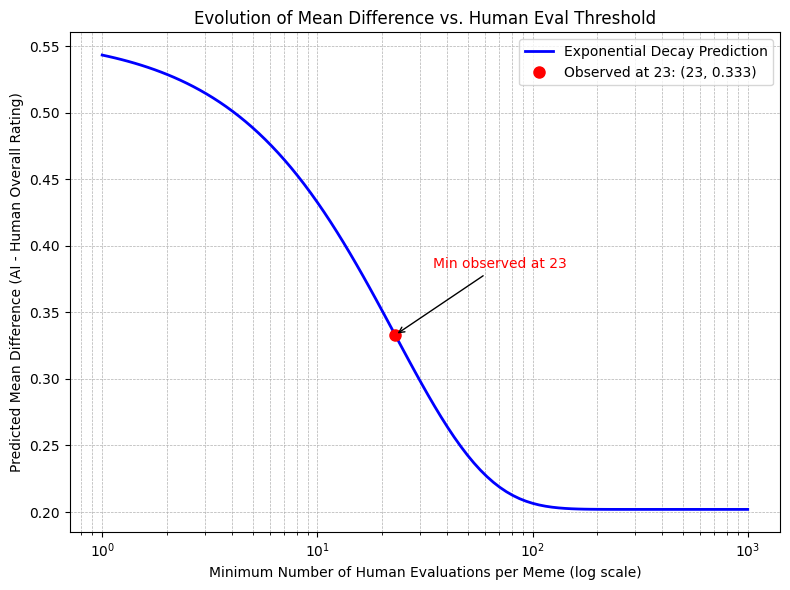

DEBUG: SD difference plot saved to ../new_results/sd_difference_vs_threshold.png


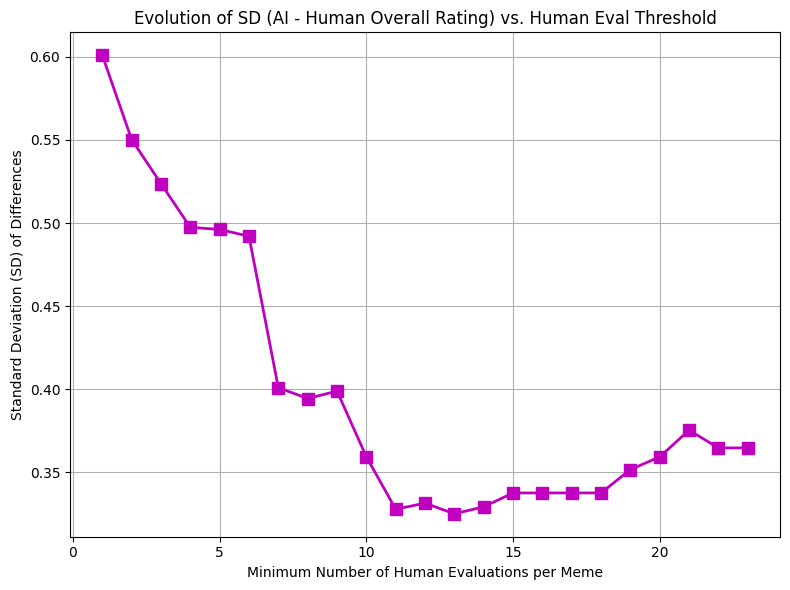

In [106]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

##############################################
# Helper Function: Aggregate Human Ratings
##############################################
def aggregate_human_ratings(df_human, min_evals, human_metrics):
    """
    For each meme (combination of claim and meme number) in df_human,
    if there are at least min_evals complete ratings (for the specified human_metrics),
    compute the overall rating (average across the human_metrics) per subject and then
    average these ratings across subjects.
    Returns a DataFrame with columns: 'meme_id', 'overall_rating_human'.
    """
    human_agg_list = []
    # Loop over claims 1 to 12 and meme numbers 1 to 8.
    for claim in range(1, 13):
        for meme in range(1, 9):
            cols = [f"claim{claim}_meme{meme}_{metric}" for metric in human_metrics]
            valid_cols = [c for c in cols if c in df_human.columns]
            if len(valid_cols) < len(human_metrics):
                continue
            data = df_human[valid_cols].apply(pd.to_numeric, errors='coerce')
            data_complete = data.dropna()
            if data_complete.shape[0] < min_evals:
                continue
            # Compute each subject's overall rating (average across the five metrics)
            data_complete['overall_rating'] = data_complete.mean(axis=1)
            overall_avg = data_complete['overall_rating'].mean()
            meme_id = f"claim{claim}_meme{meme}"
            human_agg_list.append({
                "meme_id": meme_id,
                "overall_rating_human": overall_avg
            })
    return pd.DataFrame(human_agg_list)

##############################################
# Phase 1: Process Human Evaluation Data
##############################################
human_path = "../../llm_selection/data/postselection_meme_ratings_processed.csv"
df_human = pd.read_csv(human_path)
print("DEBUG: Human data loaded. Shape:", df_human.shape)

# Define the five human evaluation metrics (for the human file, note the last metric is 'template_conveyance').
human_metrics = ["coherence", "clarity", "hilarity", "persuasiveness", "template_conveyance"]

##############################################
# Phase 2: Process AI Evaluation Data
##############################################
ai_path = "../plots/2025_02_21_23_04_10.csv"
df_ai = pd.read_csv(ai_path)
print("DEBUG: AI data loaded. Shape:", df_ai.shape)

# Standardize model names to lowercase (here we are pooling all AI evaluations)
df_ai['model_name_judge'] = df_ai['model_name_judge'].str.lower()

# Define AI metrics (last metric is 'template_appropriateness')
ai_metrics = ["coherence", "clarity", "hilarity", "persuasiveness", "template_appropriateness"]
for col in ai_metrics:
    df_ai[col] = df_ai[col].str.split('/').str[0].astype(float)

# Compute overall rating (average of the five AI metrics)
df_ai['overall_rating'] = df_ai[ai_metrics].mean(axis=1)

# Create a meme_id for AI data to match human data: format "claimX_memeY"
df_ai['claim_number'] = df_ai['claim_number'].astype(str)
df_ai['meme_id'] = "claim" + df_ai['claim_number'] + "_meme" + df_ai['meme_number'].astype(str)

# Aggregate AI evaluations per meme (average over all evaluations for each meme)
ai_agg = df_ai.groupby("meme_id")["overall_rating"].mean().reset_index()
ai_agg.rename(columns={'overall_rating': 'overall_rating_ai'}, inplace=True)
print("DEBUG: Aggregated AI overall ratings (first 5 rows):")
print(ai_agg.head())
print(f"DEBUG: Total memes aggregated from AI ratings: {ai_agg.shape[0]}\n")

##############################################
# Phase 3: Compute Mean Differences and SD of Differences Across Thresholds
##############################################
thresholds = list(range(1, 24))  # Thresholds from 1 to 23
mean_differences = []   # To hold mean difference per threshold
sd_differences = []     # To hold standard deviation (SD) of differences per threshold
meme_counts = []        # To hold number of merged memes for each threshold

for t in thresholds:
    df_human_agg = aggregate_human_ratings(df_human, min_evals=t, human_metrics=human_metrics)
    merged = pd.merge(df_human_agg, ai_agg, on="meme_id")
    count = merged.shape[0]
    meme_counts.append(count)
    if count > 0:
        merged["difference"] = merged["overall_rating_ai"] - merged["overall_rating_human"]
        mean_diff = merged["difference"].mean()
        sd_diff = merged["difference"].std()
    else:
        mean_diff = np.nan
        sd_diff = np.nan
    mean_differences.append(mean_diff)
    sd_differences.append(sd_diff)
    print(f"Threshold {t}: Mean difference = {mean_diff:.3f}, SD = {sd_diff:.3f} (based on {count} memes)")

##############################################
# Phase 4: Fit an Exponential Decay Function to Observed Mean Differences (Threshold 1 to 23)
##############################################
def exp_decay(x, a, b, c):
    return a * np.exp(-b * x) + c

x_data = np.array(thresholds)
y_data = np.array(mean_differences)

# Remove any nan values.
mask = ~np.isnan(y_data)
x_data_fit = x_data[mask]
y_data_fit = y_data[mask]
print("\nDEBUG: Data used for fitting (Mean Difference):")
print("x_data_fit:", x_data_fit)
print("y_data_fit:", y_data_fit)

initial_guess = [max(y_data_fit), 0.1, min(y_data_fit)]
params, cov = curve_fit(exp_decay, x_data_fit, y_data_fit, p0=initial_guess)
print("DEBUG: Fitted parameters (Mean Difference):", params)

##############################################
# Phase 5: Predict and Plot the Evolution of Mean Difference (with Simulation) and Save Plot
##############################################
# We'll generate predictions on a logarithmic space from 1 to 1000.
x_pred = np.logspace(0, 3, num=100)  # from 1 to 1000 on log scale.
y_pred = exp_decay(x_pred, *params)

# For annotation, mark the value at threshold = 23 (observed minimum).
x_mark = 23
y_mark = exp_decay(x_mark, *params)

plt.figure(figsize=(8, 6))
plt.plot(x_pred, y_pred, 'b-', linewidth=2, label="Exponential Decay Prediction")
plt.xscale('log')
plt.xlabel("Minimum Number of Human Evaluations per Meme (log scale)")
plt.ylabel("Predicted Mean Difference (AI - Human Overall Rating)")
plt.title("Evolution of Mean Difference vs. Human Eval Threshold")
plt.grid(True, which="both", ls="--", lw=0.5)

# Mark the observed point at threshold 23.
plt.plot(x_mark, y_mark, 'ro', markersize=8, label=f"Observed at 23: ({x_mark}, {y_mark:.3f})")
plt.annotate("Min observed at 23",
             xy=(x_mark, y_mark),
             xytext=(x_mark * 1.5, y_mark + 0.05),
             arrowprops=dict(facecolor='red', arrowstyle="->"),
             fontsize=10, color='red')

plt.legend()
plt.tight_layout()
output_dir = "../new_results"
os.makedirs(output_dir, exist_ok=True)
output_file_mean = os.path.join(output_dir, "mean_difference_vs_threshold_simulated.png")
plt.savefig(output_file_mean)
print(f"DEBUG: Mean difference plot saved to {output_file_mean}")
plt.show()

##############################################
# Phase 6: Plot the Evolution of the Standard Deviation vs. Threshold and Save Plot
##############################################
plt.figure(figsize=(8, 6))
plt.plot(thresholds, sd_differences, 'ms-', linewidth=2, markersize=8)
plt.xlabel("Minimum Number of Human Evaluations per Meme")
plt.ylabel("Standard Deviation (SD) of Differences")
plt.title("Evolution of SD (AI - Human Overall Rating) vs. Human Eval Threshold")
plt.grid(True)
plt.tight_layout()
output_file_sd = os.path.join(output_dir, "sd_difference_vs_threshold.png")
plt.savefig(output_file_sd)
print(f"DEBUG: SD difference plot saved to {output_file_sd}")
plt.show()


DEBUG: Plot saved to ../new_results/extrapolated_mean_diff_logscale_annotated.png


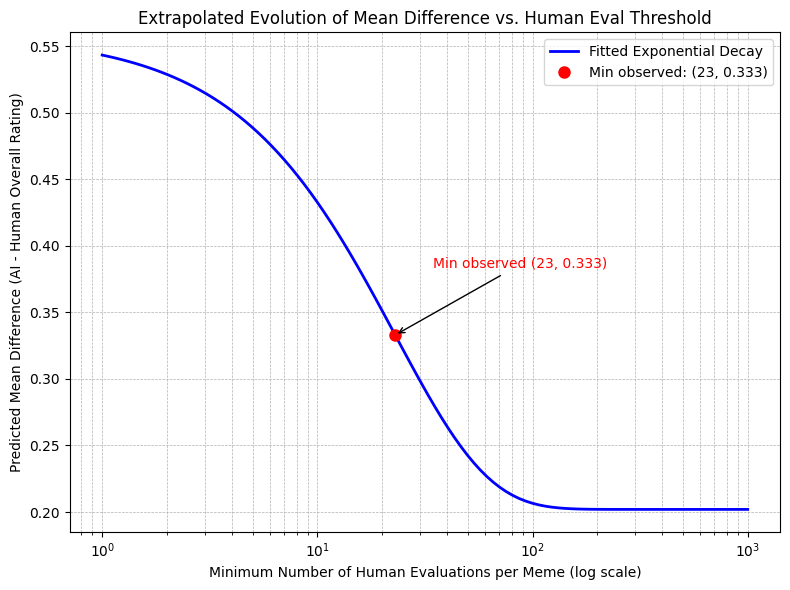

In [98]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Fitted exponential decay parameters (from your fitting):
a = 0.35640404
b = 0.04352663
c = 0.20199039

# Define the exponential decay function.
def exp_decay(x, a, b, c):
    return a * np.exp(-b * x) + c

# Generate x values spanning from 1 to 1000 using a logarithmic scale.
x_values = np.logspace(0, 3, num=100)  # from 10^0 = 1 to 10^3 = 1000
y_values = exp_decay(x_values, a, b, c)

# Define the marking point (observed minimum) at x = 23.
x_mark = 23
y_mark = exp_decay(x_mark, a, b, c)  # Expected to be around 0.333

# Create the plot.
plt.figure(figsize=(8, 6))
plt.plot(x_values, y_values, 'b-', linewidth=2, label="Fitted Exponential Decay")
plt.xscale('log')  # Use logarithmic scale on the x-axis.
plt.xlabel("Minimum Number of Human Evaluations per Meme (log scale)")
plt.ylabel("Predicted Mean Difference (AI - Human Overall Rating)")
plt.title("Extrapolated Evolution of Mean Difference vs. Human Eval Threshold")
plt.grid(True, which="both", ls="--", lw=0.5)

# Plot the red marker at x = 23.
plt.plot(x_mark, y_mark, 'ro', markersize=8, label=f"Min observed: ({x_mark}, {y_mark:.3f})")

# Add an annotation with an arrow pointing to the red marker.
plt.annotate("Min observed (23, 0.333)",
             xy=(x_mark, y_mark),
             xytext=(x_mark * 1.5, y_mark + 0.05),
             arrowprops=dict(facecolor='red', arrowstyle="->"),
             fontsize=10, color='red')

plt.legend()
plt.tight_layout()

# Save the plot to the output directory.
output_dir = "../new_results"
os.makedirs(output_dir, exist_ok=True)
output_file = os.path.join(output_dir, "extrapolated_mean_diff_logscale_annotated.png")
plt.savefig(output_file)
print(f"DEBUG: Plot saved to {output_file}")

plt.show()


# Radar graph

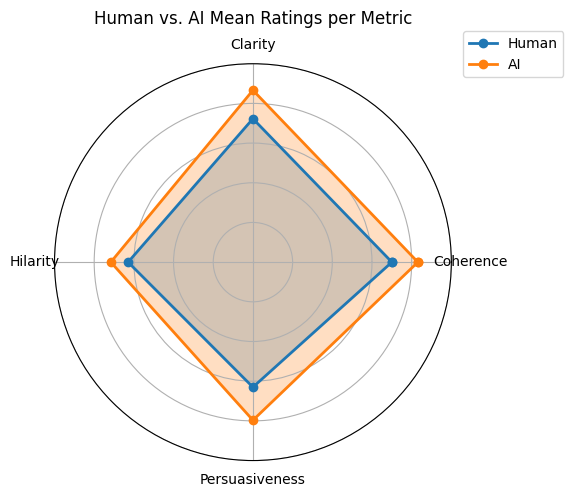

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- Load data ---
human_path = "../../llm_selection/data/postselection_meme_ratings_processed.csv"
ai_path    = "../plots/2025_02_21_23_04_10.csv"

df_human = pd.read_csv(human_path)
df_ai    = pd.read_csv(ai_path)

# --- Parameters ---
metrics = ["coherence", "clarity", "hilarity", "persuasiveness"]
labels  = ["Coherence", "Clarity", "Hilarity", "Persuasiveness"]

# --- Aggregate human ratings per metric ---
# For each metric, average across all claims and memes, and then across subjects
human_means = []
for m in metrics:
    # collect all "claimX_memeY_metric" columns
    cols = [c for c in df_human.columns if c.endswith(f"_{m}")]
    vals = pd.to_numeric(df_human[cols].stack(), errors="coerce")
    human_means.append(vals.mean())

# --- Aggregate AI ratings per metric ---
# convert "x/5" → float(x)
for m in metrics:
    df_ai[m] = df_ai[m].str.split("/").str[0].astype(float)
ai_means = df_ai[metrics].mean().tolist()

# --- Radar plot setup ---
N = len(metrics)
angles = np.linspace(0, 2*np.pi, N, endpoint=False).tolist()
# close the loop
angles += angles[:1]
human_vals = human_means + human_means[:1]
ai_vals    = ai_means    + ai_means[:1]

fig, ax = plt.subplots(figsize=(6,6), subplot_kw=dict(polar=True))
ax.plot(angles, human_vals,  marker='o', label="Human",   linewidth=2)
ax.fill( angles, human_vals, alpha=0.25)

ax.plot(angles, ai_vals,     marker='o', label="AI",      linewidth=2)
ax.fill( angles, ai_vals,    alpha=0.25)

# --- Formatting ---
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
ax.set_yticklabels([])                # hide ylabels
ax.set_ylim(0,5)                      # since metrics are on 1–5 scale
ax.set_title("Human vs. AI Mean Ratings per Metric", y=1.08)
ax.legend(loc="upper right", bbox_to_anchor=(1.3,1.1))

plt.tight_layout()
plt.show()